IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME 5 : Validation croisée (fin), astuce du noyau, réduction de dimensionnalité: visualisation & débruitage. 

<font size="+1" color="RED"><b>[Q]</b></font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

ZHANG Yuxiang $ LECOMTE Antoine

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-05</tt> et rajouter à la suite de <tt>tme-05</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-05-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [1]:
# - - - - - - - - - - - - - - - - - -
# imports utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline  

import math
import time
import sys

# Les instructions suivantes sont utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - -
# Information sur l'environnent utilisé ici:
print("Version python et des librairies:")
print("\tPython ",sys.version)
print("\tpandas: ",pd.__version__)
print("\tnumpy: ",np.__version__)
print("\tmatplotlib: ",mtpl.__version__)

Version python et des librairies:
	Python  3.9.6 (default, Nov 11 2024, 03:15:38) 
[Clang 16.0.0 (clang-1600.0.26.6)]
	pandas:  2.2.3
	numpy:  2.0.2
	matplotlib:  3.9.4


In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev



# Bilan des séances précédentes

<div class="alert alert-block alert-warning">
Avant de commencer ce sujet, vous devez avoir terminé les TME précédents:

1. les fonctions pour générer des datasets uniformes, gaussiens et XOR.
2. les classifieurs: ClassifierKNN, ClassifierLineaireRandom, ClassifierPerceptron, ClassifierPerceptronBiais
3. le classifieur multiclasses ClassifierMultiOOA    
4. les fonctions de validation croisée: crossval, crossval_strat et analyse_perfs
5. toutes les fonctions et classes doivent avoir été testées et validées, et recopiées dans les fichiers correspondants:
    - utils.py pour les fonctions 1) 
    - Classifiers.py pour les fonctions 2) et 3) 
    - evaluations.py pour les fonctions 4)

Si vous n'avez pas terminé un de ces points, consacrez le début de ce TME 5 à vous mettre à jour.
</div>    

## Une fonction pour la validation croisée

Reprendre le code écrit dans le TME 4 pour évaluer par validation croisée le perceptron biais.

**Remarque**: penser à créer un lien symbolique vers le sous-répertoire `data` (qui contient `usps.pkl`) dans le répertoire de ce TME 4 (cf. séances précédentes).

In [3]:
# test sur les données USPS
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)

# Création d'un sous groupe de données
c1 = 2  # ---> sera associée au label +1  
c2 = 6  # ---> sera associée au label -1
X12 = Xu[(Yu==c1) | (Yu==c2)]
Y12 = np.where(Yu[(Yu==c1) | (Yu==c2)]==c1, 1, -1)

np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10
# Liste pour stocker les taux de bonne classification à chaque itération
perf = []

print("Performances avec les classes ", c1," et ", c2)
# ######################## A COMPLETER CI-DESSOUS
# 1) mélanger des exemples 
index = np.random.permutation(len(X12)) # mélange des index
Xm = X12[index]
Ym = Y12[index]

# 2) réaliser une validation croisée complète avec le perceptron biais
for i in range(nb_iter):
    # Utiliser la validation croisée (stratifiée ou normale selon le besoin)
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(Xm, Ym, nb_iter, i)

    # Initialiser et entraîner le perceptron biais
    perceptron = classif.ClassifierPerceptronBiais(dim, eps, poids_0)
    perceptron.train(Xapp, Yapp)

    # Évaluation sur l'ensemble de test (Utilisation de la méthode correcte)
    Y_pred = np.array([perceptron.predict(x) for x in Xtest])
    
    taux_bonne_classification = np.mean(Y_pred == Ytest)
    perf.append(taux_bonne_classification)
    print(f'Itération {i}: taille base app.= {len(Xapp)}\ttaille base test={len(Xtest)}\tTaux de bonne classif: {taux_bonne_classification:.4f}')


# ######################## 
   
taux_moyen, taux_ecart = ev.analyse_perfs(perf)
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
Itération 0: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 1: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 2: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 3: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 4: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 5: taille base app.= 1073	taille base test=118	Taux de bonne classif: 1.0000
Itération 6: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9661
Itération 7: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 8: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 9: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Analyse perf: moyenne: 0.9831	ecart: 0.0107


<font color="RED" size="+1"><b>[Q]</b></font> À partir de maintenant, on évaluera souvent les classifieurs en utilisant une validation croisée, pour faciliter cela, écrire la fonction `validation_croisee` qui prend en argument un nom de classe de classifieur, un tuple composé d'un dataset et de son ensemble de labels, et un entier naturel donnant le nombre d'itérations à réaliser. Cette fonction rend un triplet contenant la liste des performances obtenues, la performance moyenne set l'écart type.

Cette fonction doit réaliser le traitement que vous avez implémenté dans la boîte précédente et qui débute **après le mélange des exemples**, c'est-à-dire que cette fonction implémente l'étape 2) de la boîte précédente.


<font color="RED"><b>Attention !</b></font>: lors de la validation croisée, vous devrez dupliquer le classifieur afin qu'il soit ré-entrainé complètement depuis son état initial à chaque tour. Pour cela, vous utiliserez la commande `copy.deepcopy` qui permet d'obtenir une copie complète de l'objet classifieur.

In [4]:
import copy  # pour deepcopy()

def validation_croisee(C, DS, nb_iter):
    """ Classifieur * tuple[array, array] * int -> tuple[ list[float], float, float]
    """
    # Extraire les données et labels
    X, Y = DS
    
    # Liste pour stocker les performances à chaque itération
    perf = []
    
    print("------ affichage validation croisée (optionnel)")
    # Réaliser la validation croisée
    for i in range(nb_iter):
        # Diviser les données en train et test via cross-validation (stratifiée ou classique)
        Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X, Y, nb_iter, i)
        
        # Créer une nouvelle instance du classifieur pour réinitialiser son état
        classifieur = copy.deepcopy(C)
        
        # Entraîner le classifieur avec les données d'entraînement
        classifieur.train(Xapp, Yapp)
        
        # Prédire les étiquettes sur le jeu de test
        Y_pred = np.array([classifieur.predict(x) for x in Xtest])
        
        # Calculer la performance sur le jeu de test
        taux_bonne_classification = np.mean(Y_pred == Ytest)
        
        # Ajouter la performance à la liste
        perf.append(taux_bonne_classification)

        print(f'Itération {i}: taille base app.= {len(Xapp)}\ttaille base test={len(Xtest)}\tTaux de bonne classif: {taux_bonne_classification:.4f}')
        
    # Calculer la performance moyenne et l'écart type
    taux_moyen = np.mean(perf)
    taux_ecart = np.std(perf)
    
    print("------ fin affichage validation croisée")
    # Retourner la liste des performances, la moyenne et l'écart type
    return perf, taux_moyen, taux_ecart
    


In [5]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

print("Performances avec les classes ",c1," et ", c2)

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = validation_croisee(cl, (X12, Y12), nb_iter)

# ######################## 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9661
Itération 1: taille base app.= 1073	taille base test=118	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 3: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9831
Itération 4: taille base app.= 1073	taille base test=118	Taux de bonne classif: 1.0000
Itération 5: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 6: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 7: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 8: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 9: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9831
------ fin affichage validation croisée
An

<div class="alert alert-block alert-success">

À partir d'ici, on considére que votre fonction  `validation_croisee` est opérationnelle et qu'elle a été ajoutée dans le fichier `evaluation.py` de la librairie `iads`.

</class>

Appel de la fonction `validation_croisee` une fois mise dans la librairie `iads`:

In [6]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

print("Performances avec les classes ",c1," et ", c2)

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (X12, Y12), nb_iter)

# ######################## 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9661
Itération 1: taille base app.= 1073	taille base test=118	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 3: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9831
Itération 4: taille base app.= 1073	taille base test=118	Taux de bonne classif: 1.0000
Itération 5: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 6: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 7: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9746
Itération 8: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9915
Itération 9: taille base app.= 1073	taille base test=118	Taux de bonne classif: 0.9831
------ fin affichage validation croisée
An

### Validation croisée sur un classifieur multi-classes


<font color="RED" size="+1"><b>[Q]</b></font> Tester le classifieur multiclasse du TME 4, basé sur un classifieur perceptron biais, avec l'ensemble des données usps.


In [7]:
import time # pour chronométrer...

np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = Xu.shape[1]   # la dimension est donnée par le nombre de colonnes de Xu
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("Performances avec toutes les classes (ATTENTION: cela peut être long !)")

# ######################## A COMPLETER CI-DESSOUS
# 1) Créer le classifieur de base (perceptron biais)
cl_bin = classif.ClassifierPerceptronBiais(dim, eps, poids_0)
# 2) Créer le classifieur multi-classes (One-Against-All)
cl = classif.ClassifierMultiOAA(cl_bin)


# ######################## 

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
tic = time.time()  # On lance le chrono
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (Xu, Yu), nb_iter)
toc = time.time()  # On arrête le chrono

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')



Performances avec toutes les classes (ATTENTION: cela peut être long !)
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 4154	taille base test=2075	Taux de bonne classif: 0.9292
Itération 1: taille base app.= 4154	taille base test=2075	Taux de bonne classif: 0.9325
Itération 2: taille base app.= 4154	taille base test=2075	Taux de bonne classif: 0.9219
------ fin affichage validation croisée
Temps passe: 8.0112 secondes.
Analyse perf: moyenne: 0.9279	ecart: 0.0044


# Retour sur le XOR

Dans le TME 3, vous avez implémenté la fonction `create_XOR` qui permet de générer des données avec une distribution des classes très difficile à apprendre avec nos classifieurs linéaires.

Par exemple, on peut générer 400 exemples répartis équitablement en 2 classes.

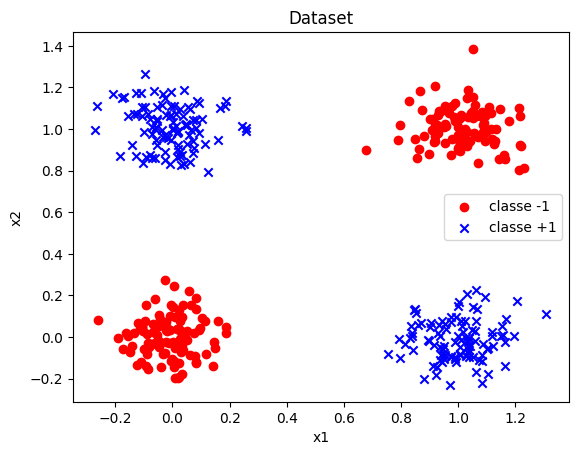

Nombre total d'exemples générés:  400
Nombre d'exemples de classe +1:  200
Nombre d'exemples de classe -1:  200


In [8]:
# Retour sur le XOR avec la fonction du TME 3 (mise dans votre librairie)

np.random.seed(42)   # on prend 42 comme graine

# Génération d'un dataset avec 400 exemples (100 par région du XOR):
data_xor, label_xor = ut.create_XOR(100,0.01)
ut.plot2DSet(data_xor, label_xor)

print("Nombre total d'exemples générés: ",data_xor.shape[0])
print("Nombre d'exemples de classe +1: ",data_xor[label_xor==+1].shape[0])
print("Nombre d'exemples de classe -1: ",data_xor[label_xor==-1].shape[0])

In [9]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptron(dim, eps, poids_0)

# Remarque: on ne mélange pas les exemples avant la validation croisée car ils sont déjà dans un ordre aléatoire

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (data_xor, label_xor), nb_iter)

# ######################## 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.1750
Itération 1: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.2250
Itération 2: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.7500
Itération 3: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.2250
Itération 4: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.7750
Itération 5: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.6000
Itération 6: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.5000
Itération 7: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.0000
Itération 8: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.0250
Itération 9: taille base app.= 360	taille base test=40	Taux de bonne classif: 0.5000
------ fin affichage validation croisée
Analyse perf: moyenne: 0.3775	ecart: 0.2703


Les résultats précédents ne sont vraiment pas très bons, le perceptron n'arrive pas à séparer correctement les 2 classes... (expliquer pourquoi)


## L'asture du noyau (*Kernel Trick*)

<div class="alert alert-block alert-info">

Comme vu en cours, l'**astuce du noyau ("kernel trick")** est un moyen pour améliorer ses performances.

Un **noyau** est une **fonction** (on parle de *fonction noyau*, *noyau* ou *kernel*) qui permet de représenter des données d'un espace donné dans un autre espace, souvent de dimension plus grande.

Par exemple, on considère une matrice en 2D d'observations:
$$X =\left[
    \begin{array}{cc}
    x_{11} & x_{12}\\
    \vdots & \vdots \\
    x_{N1} & x_{N2}\\
    \end{array}
    \right]\in \mathbb R^{N\times 2}$$

La fonction produite par un perceptron, $f(\mathbf x) = \mathbf w \cdot \mathbf x$, correspond à une frontière linéaire dans l'espace 2D... Qui passe par $(0,0)$.

Mais supposons que nous ajoutons des colonnes à $X$:
$$X^* =\left[
    \begin{array}{cccccc}
    x_{11} & x_{12} & x_{11}^2 & x_{12}^2 & x_{11} x_{12} & 1 \\
    \vdots & \ddots &&&&\vdots\\
    x_{N1} & x{N2} & x_{N1}^2 & x_{N2}^2 & x_{N1} x_{N2} & 1 \\
    \end{array}
    \right]\in \mathbb R^{N\times 6}$$

Les colonnes ajoutées sont obtenues à partir des colonnes initiales de $X$.

Maintenant, la fonction $f(\mathbf x^*) = \mathbf w \cdot \mathbf x^*$ correspond toujours à une frontière linéaire mais cette fois-ci dans un espace 6D... 
Mais sa projection dans l'espace 2D d'origine est une frontière non linéaire !


Un **noyau**  est donc une fonction de transformation
$$\begin{array}{cccc}
    K:& X & \rightarrow & X^*\\
      & \mathbf x & \mapsto &\mathbf x^*
\end{array}$$

</div>

**Note** Il faudra être très attentif, on fait tous les calculs avec des $\mathbf x^*$ mais on fait tous les affichages avec des $\mathbf x$...

Pour représenter des noyaux, on définit une classe abstraite `Kernel` qui sera étendue pour chaque noyau que l'on souhaitera créer.

In [10]:
# CLasse (abstraite) pour représenter des noyaux
class Kernel():
    """ Classe pour représenter des fonctions noyau
    """
    def __init__(self, dim_in, dim_out):
        """ Constructeur de Kernel
            Argument:
                - dim_in : dimension de l'espace de départ (entrée du noyau)
                - dim_out: dimension de l'espace de d'arrivée (sortie du noyau)
        """
        self.input_dim = dim_in
        self.output_dim = dim_out
        
    def get_input_dim(self):
        """ rend la dimension de l'espace de départ
        """
        return self.input_dim

    def get_output_dim(self):
        """ rend la dimension de l'espace d'arrivée
        """
        return self.output_dim
    
    def transform(self, V):
        """ ndarray -> ndarray
            fonction pour transformer V dans le nouvel espace de représentation
        """        
        raise NotImplementedError("Please Implement this method")


L'intérêt de définir une telle classe `Kernel` pour définir des noyaux est qu'elle permettra de définir des algorithmes de façon générique qui pourront alors prendre des noyaux quelconques en argument.

### Un premier noyau

Le premier noyau, très simple, que l'on définit permet de projeter (manuellement) des données 2D dans un espace de plus grande dimension. 

Voici un exemple de projection qui transforme le vecteur $(x_1,x_2)$ en vecteur $(x_1,x_2,1)$

In [11]:
class KernelBias(Kernel):
    """ Classe pour un noyau simple 2D -> 3D
    """
    def __init__(self):
        """ Constructeur de KernelBias
            pas d'argument, les dimensions sont figées
        """
        # Appel du constructeur de la classe mère
        super().__init__(2,3)
        
    def transform(self, V):
        """ ndarray de dim 2 -> ndarray de dim 3            
            rajoute une 3e dimension au vecteur donné
        """
        
        if (V.ndim == 1): # on regarde si c'est un vecteur ou une matrice
            W = np.array([V]) # conversion en matrice
            V_proj = np.append(W,np.ones((len(W),1)),axis=1)
            V_proj = V_proj[0]  # on rend quelque chose de la même dimension
        else:
            V_proj = np.append(V,np.ones((len(V),1)),axis=1)
            
        return V_proj
        

In [12]:
# Exemple d'utilisation : 
kb = KernelBias()

data_xor_bias= kb.transform(data_xor)

data_xor_bias

array([[ 0.04967142, -0.01382643,  1.        ],
       [ 0.06476885,  0.15230299,  1.        ],
       [-0.02341534, -0.0234137 ,  1.        ],
       ...,
       [-0.10810565,  1.10531529,  1.        ],
       [-0.00395552,  1.06815007,  1.        ],
       [ 0.00283184,  1.00297561,  1.        ]])

### Un noyau un peu plus compliqué

<font color="RED" size="+1">**[Q]**</font> Définir la classe `KernelPoly` permettant de représenter le noyau : $(x_1,x_2) \mapsto (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. 

In [13]:
# ------------------------ A COMPLETER :

class KernelPoly(Kernel):
    def __init__(self):
        """ Constructeur de KernelPoly
            Pas d'argument, les dimensions sont figées :
            - Espace d'entrée : 2D
            - Espace de sortie : 6D
        """
        # Appel du constructeur de la classe mère
        super().__init__(2,6)
        
    def transform(self, V):
        """ 
        ndarray (N, 2) -> ndarray (N, 6)
        Transformation des données depuis l'espace d'entrée (2D) vers l'espace de sortie (6D)
        
        Paramètre:
            V : np.ndarray de forme (N, 2)
                Représente N points dans un espace 2D
        Retourne:
            np.ndarray de forme (N, 6)
                Les points transformés dans l'espace 6D
        """
        x1 = V[:, 0]
        x2 = V[:, 1]
        
        # (1, x1, x2, x1^2, x2^2, x1*x2)
        transformed = np.column_stack([
            np.ones_like(x1),
            x1,
            x2,
            x1 ** 2,
            x2 ** 2,
            x1 * x2
        ])
        
        return transformed



In [14]:
# Exemple d'utilisation 

kp = KernelPoly()

data_xor_poly = kp.transform(data_xor[0:4])

data_xor_poly


array([[ 1.00000000e+00,  4.96714153e-02, -1.38264301e-02,
         2.46724950e-03,  1.91170170e-04, -6.86778352e-04],
       [ 1.00000000e+00,  6.47688538e-02,  1.52302986e-01,
         4.19500442e-03,  2.31961994e-02,  9.86448981e-03],
       [ 1.00000000e+00, -2.34153375e-02, -2.34136957e-02,
         5.48278029e-04,  5.48201146e-04,  5.48239586e-04],
       [ 1.00000000e+00,  1.57921282e-01,  7.67434729e-02,
         2.49391312e-02,  5.88956064e-03,  1.21194276e-02]])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe `ClassifierPerceptronKernel` qui étend la classe `Classifier`. 
Pour définir cette classe possède les mêmes fonctionnalités que celles de la classe `ClassifierPerceptron`, en plus, elle prend en argument, lors de sa construction, un noyau (instance de la classe `Kernel`).
Une différence majeure avec le perceptron normal, et que le dataset fourni pour les méthodes `train_step` et `train`, ainsi que l'exemple donnée pour une prédiction, doit être *kernélisé* avant d'appliquer le traitement.

*Remarques :*
- le données sont donc kernélisée dans l'objet `ClassifierPerceptronKernel`.
- toutes les méthodes de la classe `ClassifierPerceptronKernel` ne sont pas nécessairement à réécrire dans `ClassifierPerceptron`, seulement celles qui sont impactées par le changement apporté par l'utilisation du kernel..
 


In [15]:
# ------------------------ A COMPLETER :
class ClassifierPerceptronKernel(classif.ClassifierPerceptron):
    """ Perceptron de Rosenblatt kernelisé """
    
    def __init__(self, input_dimension, learning_rate, noyau, init=0):
        """ 
        Constructeur de ClassifierPerceptronKernel
        Arguments:
            - input_dimension (int) : dimension de l'espace original des exemples
            - learning_rate (float) : taux d'apprentissage (epsilon)
            - noyau (Kernel) : instance du noyau à utiliser pour la transformation des données
            - init (int, default=0) : mode d'initialisation des poids :
                - 0 : initialisation à 0
                - 1 : initialisation aléatoire (petites valeurs)
        """
        super().__init__(noyau.get_output_dim(), learning_rate, init)
        self.noyau = noyau
        
    def train_step(self, desc_set, label_set):
        """ 
        Réalise une unique itération sur tous les exemples du dataset
        avec transformation via le noyau.
        
        Arguments:
            - desc_set (ndarray): données d'entrée dans l'espace original
            - label_set (ndarray): labels correspondants aux données
        """
        desc_set_transformed = self.noyau.transform(desc_set)
        super().train_step(desc_set_transformed, label_set)
        
    def score(self, x):
        """ 
        Calcule le score de prédiction pour une description donnée.
        
        Arguments:
            - x (ndarray): une description dans l'espace original
        
        Retourne:
            - float: score de la prédiction (valeur réelle)
        """
        x_transformed = self.noyau.transform(np.array([x]))
        return super().score(x_transformed[0])

    


<font color="RED" size="+1">**[Q]**</font> Entraîner un perceptron kernelisé utilisant un `KernelPoly` sur un dataset correspondant au XOR. Que constate-t-on ? Expliquer.

Nb iterations:  78


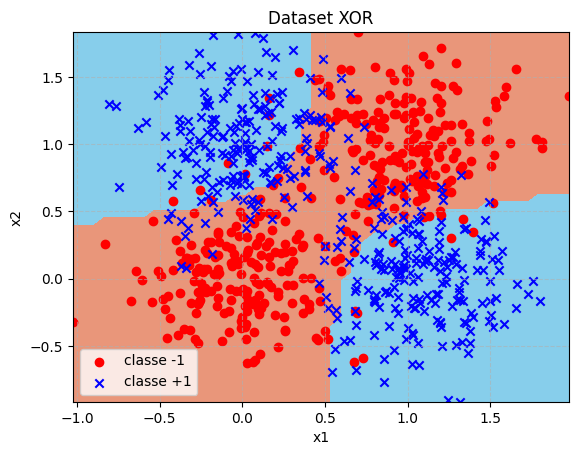

Accuracy finale :  0.86625


In [23]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Initialisation du noyau polynomial
kernel = KernelPoly()

# Création du perceptron kernelisé avec le noyau
perceptron_kernel = ClassifierPerceptronKernel(dim, eps, kernel, init=poids_0)

# Entraînement du perceptron kernelisé sur le dataset XOR
les_variations = perceptron_kernel.train(data_xor, label_xor)
print("Nb iterations: ", len(les_variations))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(data_xor, label_xor, perceptron_kernel, step=50)  # Passer l'instance du classifieur

# Affichage des données
ut.plot2DSet(data_xor, label_xor, "Dataset XOR", avec_grid=True)

# Calcul et affichage de la précision finale
print("Accuracy finale : ", perceptron_kernel.accuracy(data_xor, label_xor))


On peut évaluer les résultats d'une validation croisée avec ce kernel.

In [25]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

# Création du classifieur que l'on veut évaluer:
cl = ClassifierPerceptronKernel(dim,eps,kernel,poids_0)

# Remarque: on ne mélange pas les exemples avant la validation croisée car ils sont déjà dans un ordre aléatoire

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (data_xor, label_xor), nb_iter)

# ######################## 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.7875
Itération 1: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.8250
Itération 2: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.7500
Itération 3: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.8375
Itération 4: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.7875
Itération 5: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.7750
Itération 6: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.8875
Itération 7: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.8875
Itération 8: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.7750
Itération 9: taille base app.= 720	taille base test=80	Taux de bonne classif: 0.9000
------ fin affichage validation croisée
Analyse perf: moyenne: 0.8213	ecart: 0.0519


# Visualisation de données

Nous proposons une série d'expériences pour appréhender la visualisation de données et la réduction de la dimensionnalité:

1. Comprendre la signification des valeurs propres et vecteurs propres sur les données gaussiennes sur lesquelles nous avons travaillé jusqu'ici
1. Générer un jeu de données jouet en 3D puis réduire la dimensionnalité
1. Appliquer cette réduction de dimension sur les données USPS

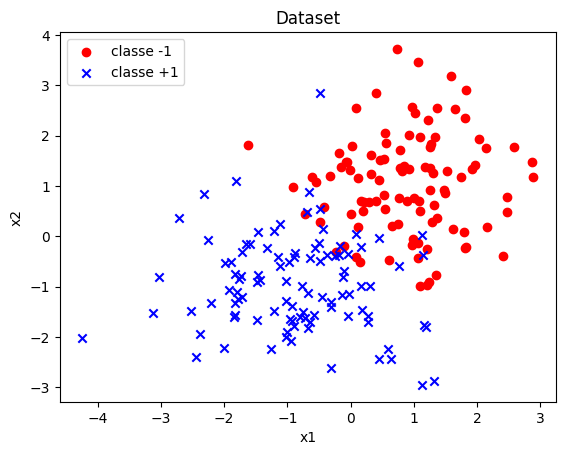

In [26]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-1,-1],[[1,0],[0,1]], [1, 1],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

<font color="RED" size="+1"><b>[Q]</b></font> Avant de poursuivre, répondez aux questions suivantes:
- Combien y a-t-il de vecteurs propres et de valeurs propres dans ce problème?
- Quel axe de plus forte variance est pressenti?

Réponses:

Q1: Pour un jeu de données en 2D généré à partir de deux distributions gaussiennes, il y a 2 vecteurs propres et 2 valeurs propres. Cela vient du fait que les données résident dans un espace bidimensionnel, donc il y a deux directions principales possibles pour lesquelles on peut avoir une variance, ce qui correspond à deux vecteurs propres.

Q2: En utilisant les vecteurs propres et leurs valeurs propres, l'axe de plus forte variance est celui qui correspond à la plus grande valeur propre. En d'autres termes, l'axe de plus forte variance est celui qui "explique" le plus la distribution des données.

Visuellement, cet axe peut être interprété comme la direction dans laquelle les points de données sont le plus dispersés.
Mathématiquement, c'est le vecteur propre associé à la plus grande valeur propre. Si l'on effectue une réduction de dimension, cet axe est souvent choisi pour être le premier axe principal dans une PCA, car il capture la majorité de la variance des données.



<font color="RED" size="+1"><b>[Q]</b></font> Refaire les calculs précédents à la main, sur une feuille !

In [37]:
# Donner les instructions pour récupérer les valeurs propres et vecteurs propres de la 
# matrice X générée précédeemment, puis les afficher:

# Calcul de la matrice de covariance
Cov_X = np.cov(X.T)  # Transposez X pour obtenir la matrice de covariance

# Calcul des valeurs propres et des vecteurs propres
lam, V = np.linalg.eig(Cov_X)  # lam contient les valeurs propres, V contient les vecteurs propres

# ###################################

print("1er valeur rendue:\n", lam)
print("2e valeur rendue :\n", V)

1er valeur rendue:
 [0.94124911 2.66272599]
2e valeur rendue :
 [[-0.75656539 -0.65391804]
 [ 0.65391804 -0.75656539]]


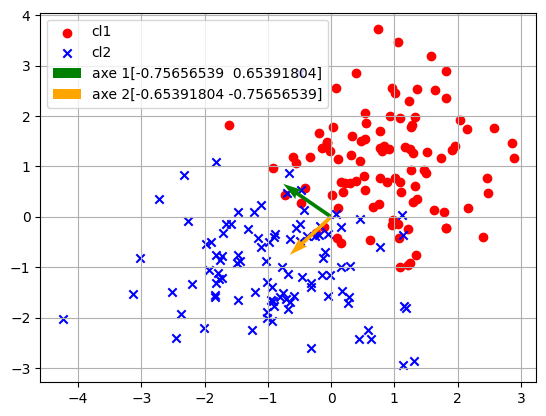

In [38]:
# tracer les vecteurs propres, à partir de (0,0) sur le scatter des points (X,Y)
# A l'aide de la commande plt.text, vous pouvez rajouter la "force" des axes si vous voulez

plt.figure()
plt.grid('on')
# Affichage de l'ensemble des exemples :
plt.scatter(X[Y==-1,0],X[Y==-1,1],marker='o', color="red") # 'o' rouge pour la classe -1
plt.scatter(X[Y==1,0],X[Y==1,1],marker='x', color="blue") # 'x' bleu pour la classe +1

# A COMPLETER 
plt.quiver(0, 0, V[0, 0], V[1, 0], angles='xy', scale_units='xy', scale=1, color='green', label="axe 1")
plt.quiver(0, 0, V[0, 1], V[1, 1], angles='xy', scale_units='xy', scale=1, color='orange', label="axe 2")

# Décommenter la ligne suivante pour avoir la légende :
plt.legend(["cl1", "cl2","axe 1"+str(V[:,0]),"axe 2"+str(V[:,1])])


# Si vous voulez sauvegarder l'image : 
#plt.savefig("out/acp.png",bbox_inches='tight', transparent=True,pad_inches=0)

plt.show()

On voit bien la principale direction de variance (associée à la plus grande valeur propre)

## Réduction de données 2D => 1D

Dans une logique de réduction de dimensionnalité, on souhaite:
1. extraire automatiquement le vecteur propre associé à la plus grande valeur propre
1. projeter les données sur cet axe
1. afficher le plot 1D des données suivant:
    - x = nouvelle coordonée (unique) du point
    - y = étiquette

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes données ci-dessus.


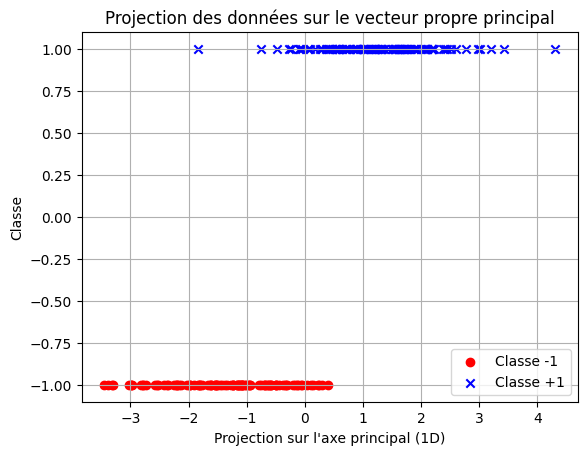

In [39]:
import math

# 1. Calcul de la matrice de covariance
Cov_X = np.cov(X.T)  # Transposez X pour obtenir la matrice de covariance

# 2. Calcul des valeurs propres et des vecteurs propres
lam, V = np.linalg.eig(Cov_X)

# 3. Extraire le vecteur propre associé à la plus grande valeur propre
index_max_lam = np.argmax(lam)  # Trouver l'index de la plus grande valeur propre
v_max = V[:, index_max_lam]  # Extraire le vecteur propre correspondant

# 4. Projeter les données sur cet axe
X_proj = X.dot(v_max)  # Projection des données sur le vecteur propre
plt.figure()
plt.scatter(X_proj[Y == -1], [-1] * sum(Y == -1), marker='o', color="red", label="Classe -1")
plt.scatter(X_proj[Y == 1], [1] * sum(Y == 1), marker='x', color="blue", label="Classe +1")

# Ajouter un titre et des étiquettes
plt.title("Projection des données sur le vecteur propre principal")
plt.xlabel("Projection sur l'axe principal (1D)")
plt.ylabel("Classe")

# Ajouter la grille et la légende
plt.grid(True)
plt.legend()

# Afficher le graphique
plt.show()

#plt.savefig("out/proj_1D.png",bbox_inches='tight', transparent=True,pad_inches=0)


Vous devez obtenir:

(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_1D.png`.

<table border="0">
 <tr>
    <td><img src="ressources/proj_1D.png" width=300px></td>
    <td>L'axe de plus forte variance semble bien intéressant pour distinguer les deux classes de données</td>
 </tr>
</table>

Pour mieux comprendre ce qui se passe, je vous propose la figure explicative suivante qui illustre ce que vous avez fait du point de vue géométrique:
<img src="ressources/proj_2D.png" width=300px>


(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_2D.png`.

**Note:** cette dernière figure est non-triviale à obtenir, il ne faut pas perdre du temps en TP à chercher comment faire :)

## Réduction de données d-D => 2D

Passons maintenant sur les données USPS pour essayer de reproduire les figures du cours 5.

In [ ]:
# Import de pickle pour récupérer les données
import pickle as pkl

# Chargement des données USPS :

# **** IMPORTANT ****
# faire un lien vers le fichier usps.pkl qui a été fournie dans les TME précédents (répertoire ressources)
# dans un sous-répertoire ressources du répertoire où se trouve ce notebook.
# Ou bien : modifier dans open() pour mettre le bon chemin d'accès vers usps.pkl sur votre compte.

data = pkl.load(open('data/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float) # conversion de type pour une meilleure compatibilité
YTu = np.array(data['Y_test'], dtype=float)


<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes suivantes:

1. Extraire automatiquement les 2 vecteurs propres associés aux 2 plus grandes valeurs propres sur les données USPS
1. Projeter les données sur ces axes
    - projeter toutes les données
    - projeter seulement les 200 premières images (pour mieux voir)
1. Afficher avec un code couleur correspondant aux classes

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

Valeurs propres :
 [2.21271730e+01 1.06508488e+01 8.33798110e+00 6.88875371e+00
 6.06363464e+00 4.62015349e+00 3.91814981e+00 3.71608226e+00
 3.19519512e+00 3.03020209e+00 2.65329104e+00 2.46686024e+00
 2.02018374e+00 1.78315157e+00 1.71274667e+00 1.55944162e+00
 1.48143132e+00 1.39191378e+00 1.29366769e+00 1.22434101e+00
 1.20408271e+00 1.13231597e+00 1.00009326e+00 9.20400954e-01
 8.89571181e-01 8.47462065e-01 7.86595050e-01 7.49920108e-01
 7.31291796e-01 7.01692713e-01 6.88252829e-01 6.62500636e-01
 6.37832287e-01 5.84464583e-01 5.75137571e-01 5.63394197e-01
 5.36095933e-01 5.12910428e-01 4.93509706e-01 4.76936463e-01
 4.72008431e-01 4.54854954e-01 4.44293345e-01 3.99495310e-01
 3.93421704e-01 3.88207783e-01 3.81995988e-01 3.63333642e-01
 3.40968789e-01 3.30472317e-01 3.22806650e-01 3.12867598e-01
 2.99487000e-01 2.93210622e-01 2.77480491e-01 2.73084570e-01
 2.64619956e-01 2.57749633e-01 2.52696249e-01 2.49071479e-01
 2.41706501e-01 2.21558713e-01 2.17457349e-01 2.12987936e-01
 2.06

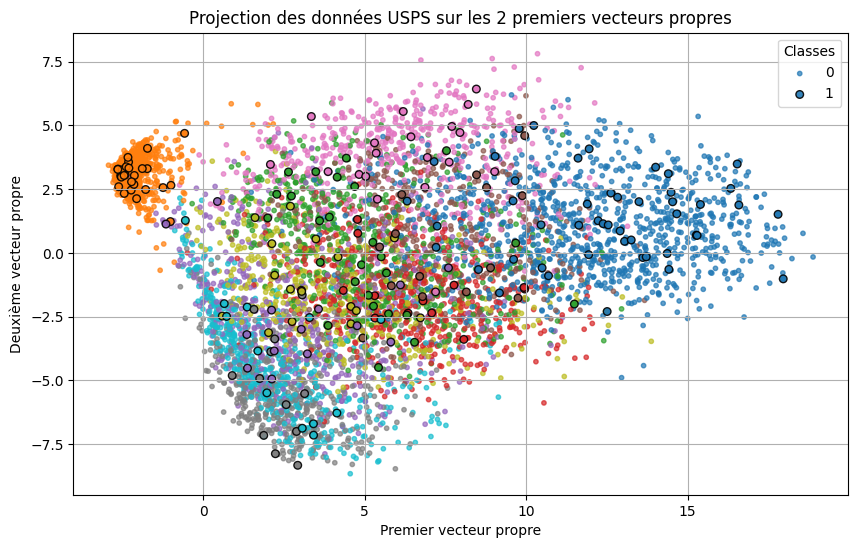

In [45]:
# Charger les données USPS
data = pkl.load(open('data/usps.pkl', 'rb'))  # Charger les données (mettre le bon chemin vers 'usps.pkl')
Xu = np.array(data['X_train'], dtype=float)
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float)
YTu = np.array(data['Y_test'], dtype=float)

# 1) Calcul des vecteurs propres et des valeurs propres
Cov_Xu = np.cov(Xu.T)  # Calculer la matrice de covariance des données d'entraînement
lam, V = np.linalg.eig(Cov_Xu)  # Calculer les valeurs propres et les vecteurs propres

# 2) Affichage des valeurs propres et des vecteurs propres
print("Valeurs propres :\n", lam)
print("Vecteurs propres :\n", V)

# 3) Tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres
# Trier les indices des valeurs propres par ordre décroissant
indices = np.argsort(lam)[::-1]
V_sorted = V[:, indices]  # Vecteurs propres triés
lam_sorted = lam[indices]  # Valeurs propres triées

# Sélectionner les deux premiers vecteurs propres
v1 = V_sorted[:, 0]
v2 = V_sorted[:, 1]

# 4) Projection des données sur ces deux axes (vecteurs propres)
# Projeter toutes les données sur les deux premiers vecteurs propres
X_proj_all = np.dot(Xu, V_sorted[:, :2])  # Projection des données d'entraînement sur les deux premiers vecteurs propres

# Projeter seulement les 200 premières images
X_proj_200 = X_proj_all[:200]

# 5) Affichage (plot) avec un code couleur pour les classes
plt.figure(figsize=(10, 6))

# Affichage des points projetés pour toutes les données avec un code couleur basé sur les classes
plt.scatter(X_proj_all[:, 0], X_proj_all[:, 1], c=Yu, cmap='tab10', s=10, alpha=0.7)  # 'tab10' est une palette de couleurs pour 10 classes
plt.scatter(X_proj_200[:, 0], X_proj_200[:, 1], c=Yu[:200], cmap='tab10', s=30, edgecolors='k', alpha=0.9)

# Ajouter un titre et des légendes
plt.title("Projection des données USPS sur les 2 premiers vecteurs propres")
plt.xlabel("Premier vecteur propre")
plt.ylabel("Deuxième vecteur propre")
plt.legend(np.arange(10), title="Classes", loc='upper right')

# Ajouter une grille
plt.grid(True)

# Afficher le plot
plt.show()

# Sauvegarder l'image si nécessaire
# plt.savefig("out/proj_usps_all.png", bbox_inches='tight', transparent=True, pad_inches=0)



Vous devez obtenir:
<table border="0">
 <tr>
    <td><img src="ressources/proj_usps_all.png"></td>
 </tr>
</table>

(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_usps_all.png`.

On a l'impression que les 0 et 1 sont bien séparés des autres classes... Le reste est un peu confus mais on voit que:
- les 8 et les 9 se ressemblent
- les 6 et les 3 dans une moindre mesure
- les 7 et les 4 un peu aussi
- les 2 sont en plein milieu

## Interprétation des vecteurs propres

Chacun de nos 2 axes contient beaucoup d'informations... Mais lesquelles?
Ces axes sont en 256 dimensions, il est possible de les tracer comme une image. L'idée est de distinguer les dimensions positives et les dimensions négatives.
On ne va pas reconstruire une échelle de couleur propre... Mais on peut a minima afficher l'échelle.

Le code est fourni ci-dessous.

<table border="0">
 <tr>
    <td><img src="ressources/vp_0.png"></td>
    <td><img src="ressources/vp_1.png"></td>
 </tr>
</table>

Le premier axe est sensible aux pixels allumés en haut et en bas: sur le premier axe de la figure de la boite précédente, on remarque que les chiffres les plus à droite sont le 0 et le 3... Ca colle.

Le second axe est sensible aux pixels à gauche et à droite (en positif) et aux pixels du centre (en négatif). On a bien les 0 en haut et les 1 en bas de ce second axe.

Valeurs propres :
 [2.21271730e+01 1.06508488e+01 8.33798110e+00 6.88875371e+00
 6.06363464e+00 4.62015349e+00 3.91814981e+00 3.71608226e+00
 3.19519512e+00 3.03020209e+00 2.65329104e+00 2.46686024e+00
 2.02018374e+00 1.78315157e+00 1.71274667e+00 1.55944162e+00
 1.48143132e+00 1.39191378e+00 1.29366769e+00 1.22434101e+00
 1.20408271e+00 1.13231597e+00 1.00009326e+00 9.20400954e-01
 8.89571181e-01 8.47462065e-01 7.86595050e-01 7.49920108e-01
 7.31291796e-01 7.01692713e-01 6.88252829e-01 6.62500636e-01
 6.37832287e-01 5.84464583e-01 5.75137571e-01 5.63394197e-01
 5.36095933e-01 5.12910428e-01 4.93509706e-01 4.76936463e-01
 4.72008431e-01 4.54854954e-01 4.44293345e-01 3.99495310e-01
 3.93421704e-01 3.88207783e-01 3.81995988e-01 3.63333642e-01
 3.40968789e-01 3.30472317e-01 3.22806650e-01 3.12867598e-01
 2.99487000e-01 2.93210622e-01 2.77480491e-01 2.73084570e-01
 2.64619956e-01 2.57749633e-01 2.52696249e-01 2.49071479e-01
 2.41706501e-01 2.21558713e-01 2.17457349e-01 2.12987936e-01
 2.06

/var/folders/x0/9jmwqqtj7s13pdfprxbhp6r00000gn/T/ipykernel_5511/411943671.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


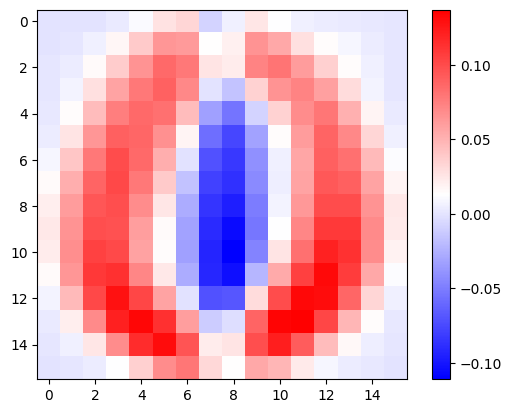

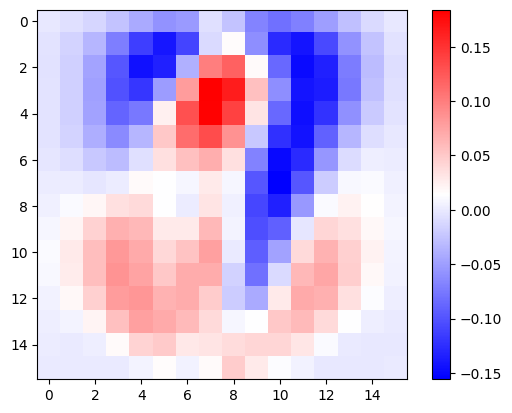

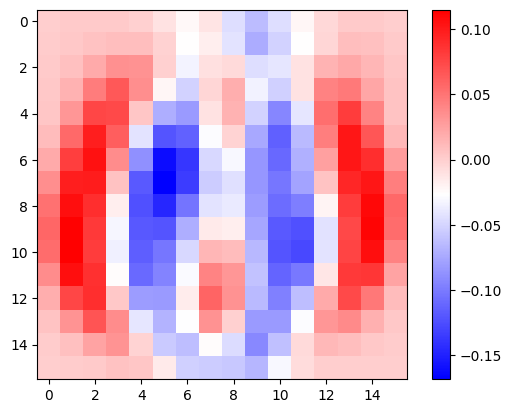

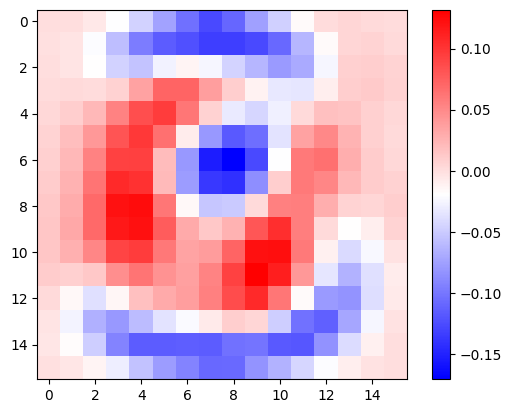

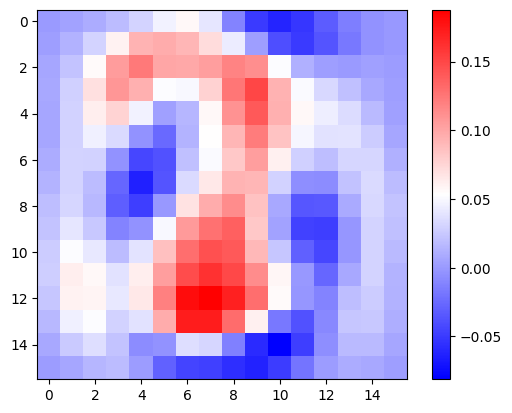

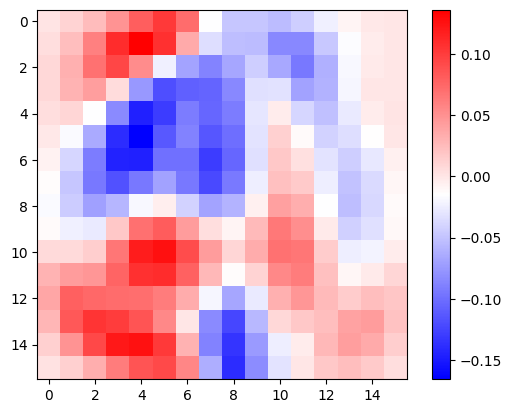

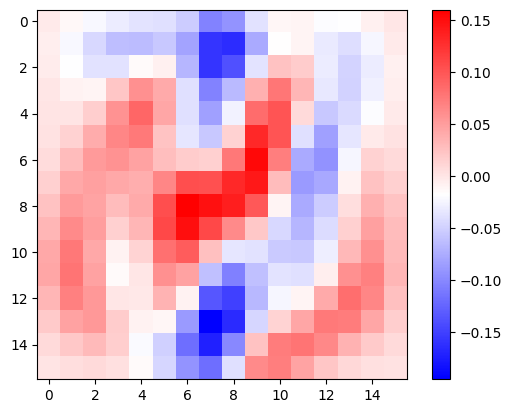

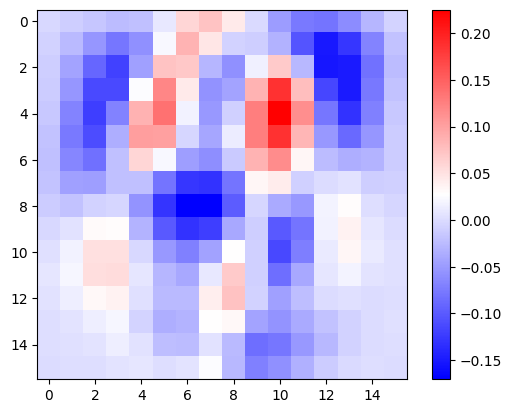

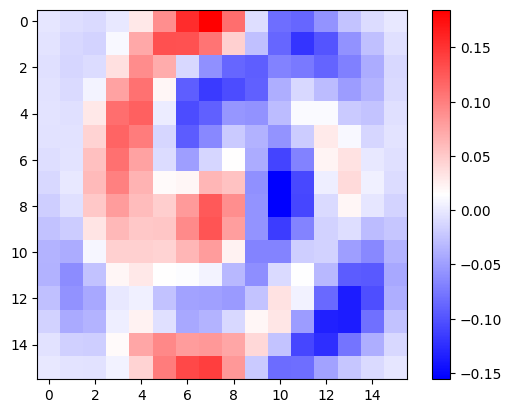

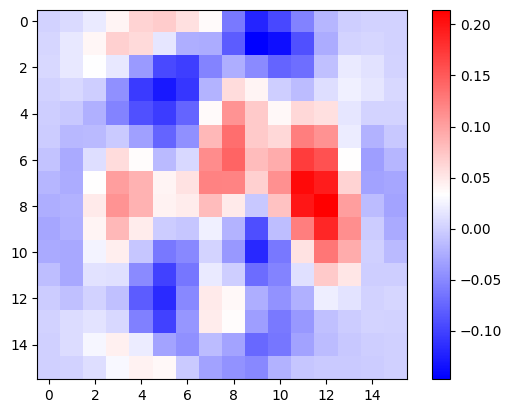

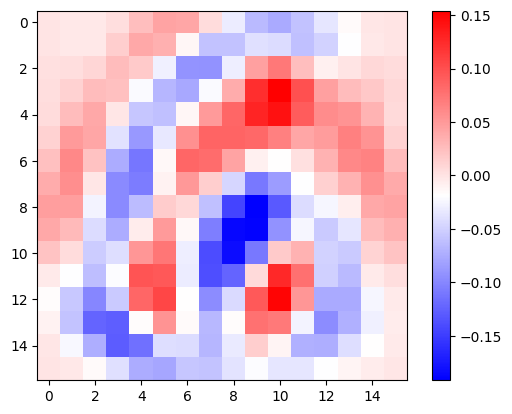

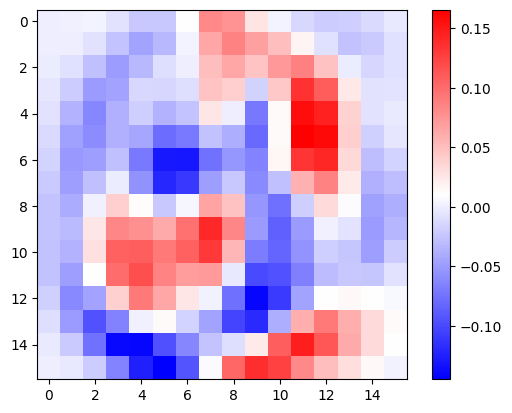

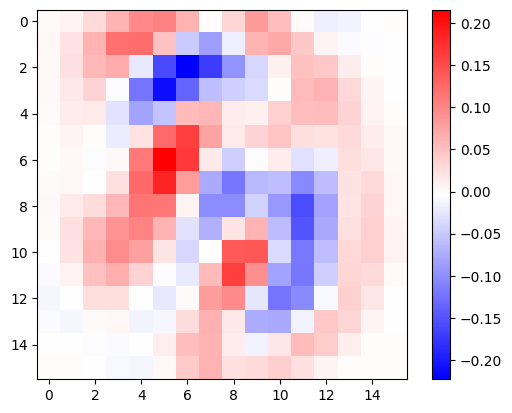

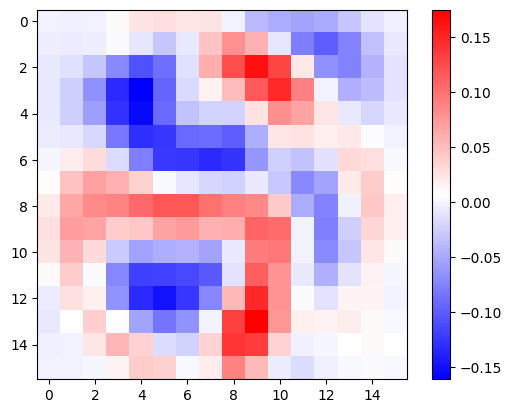

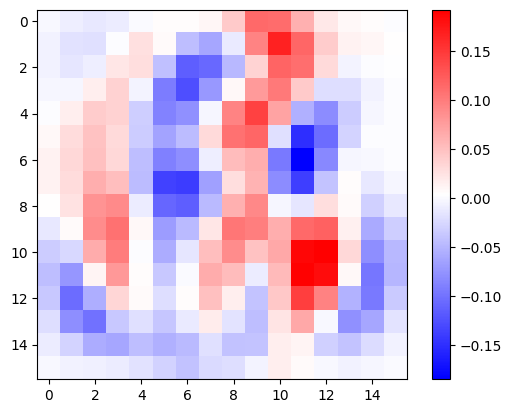

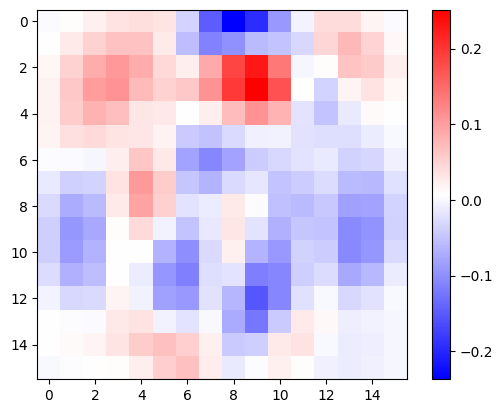

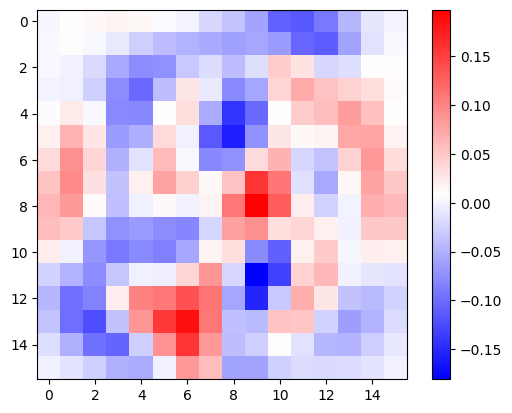

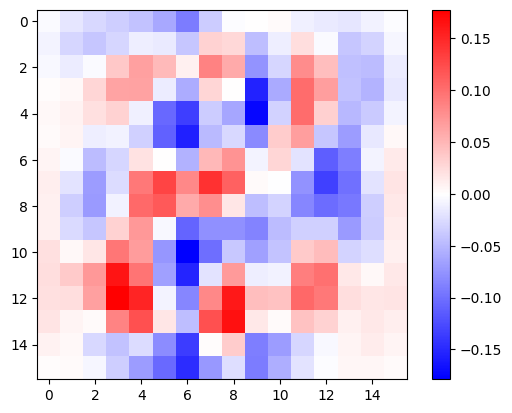

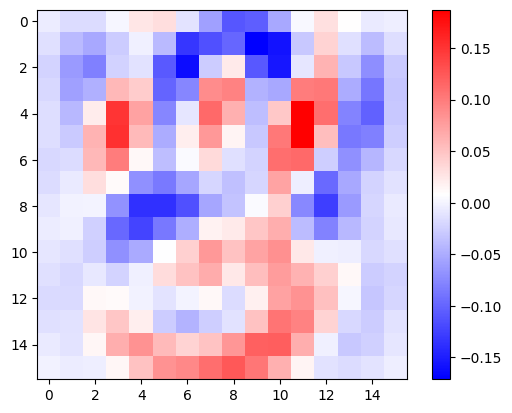

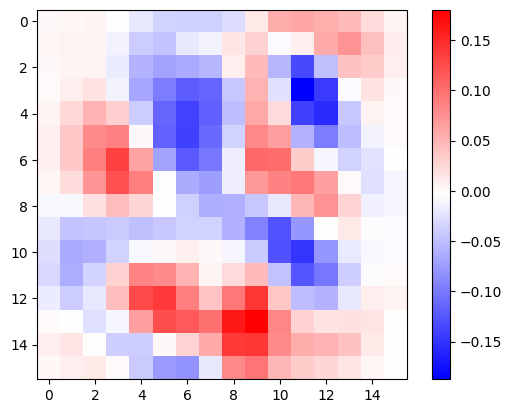

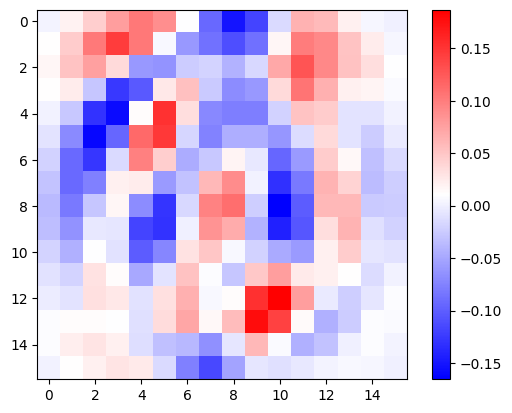

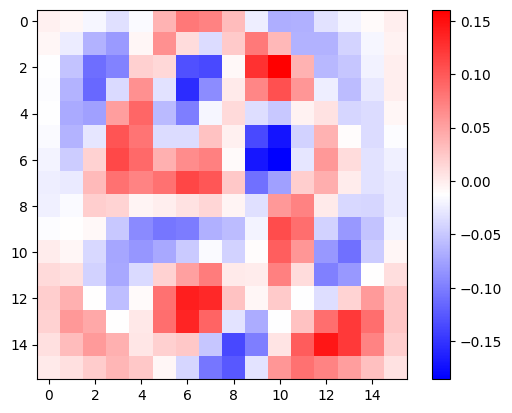

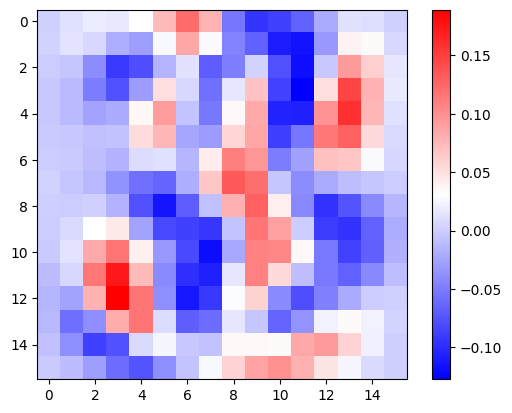

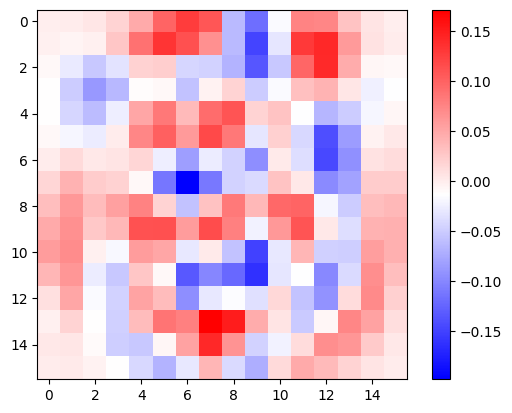

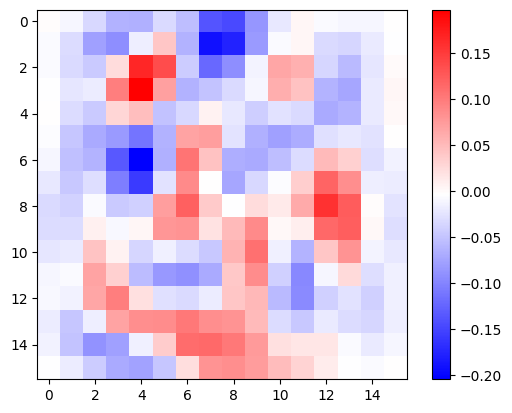

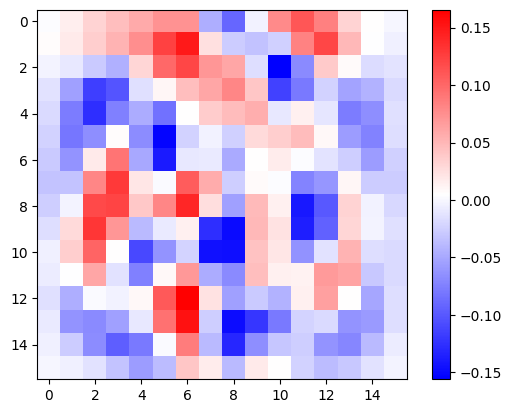

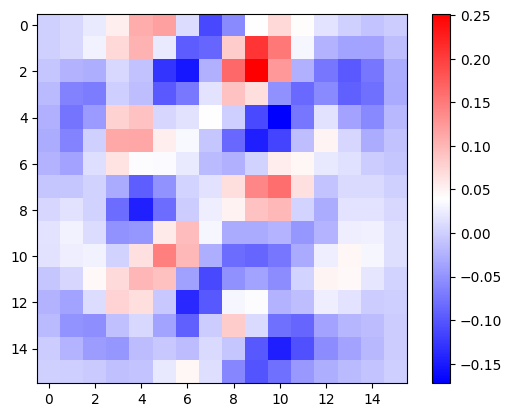

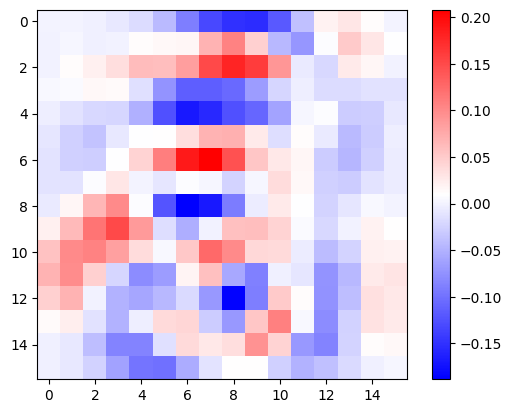

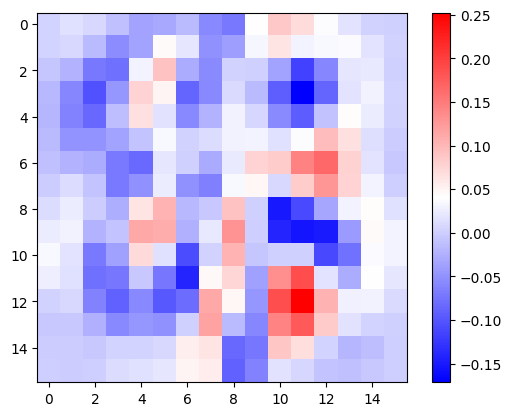

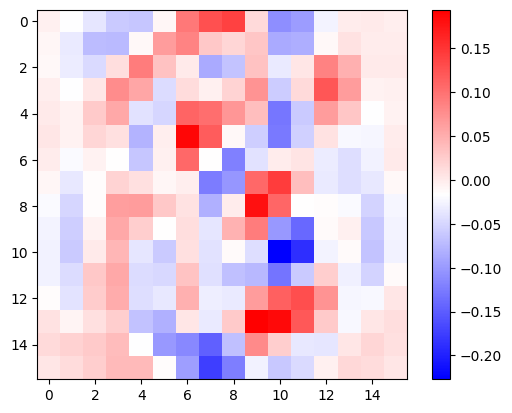

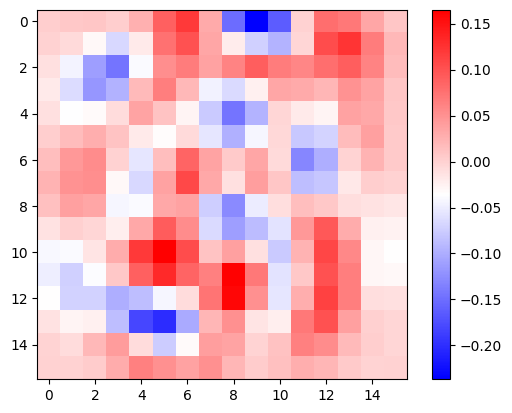

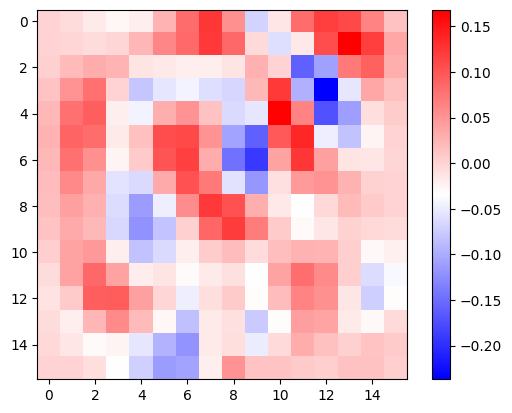

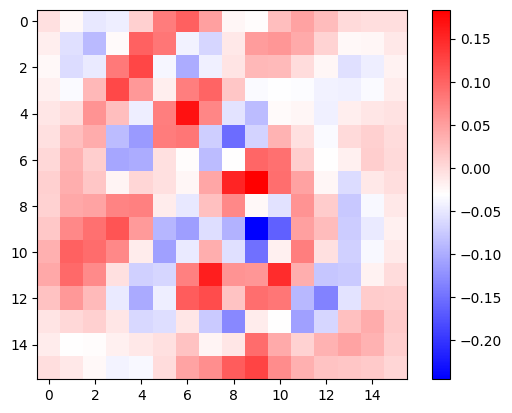

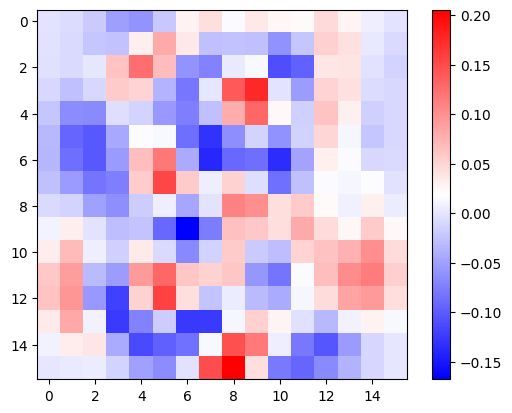

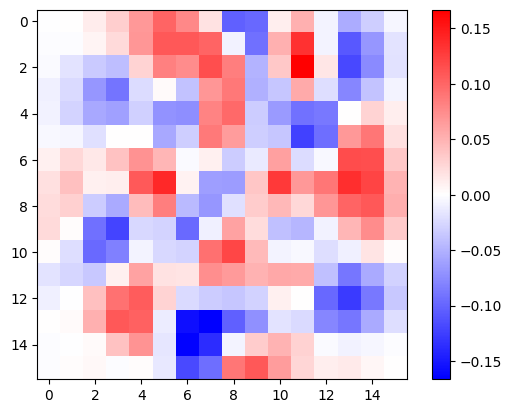

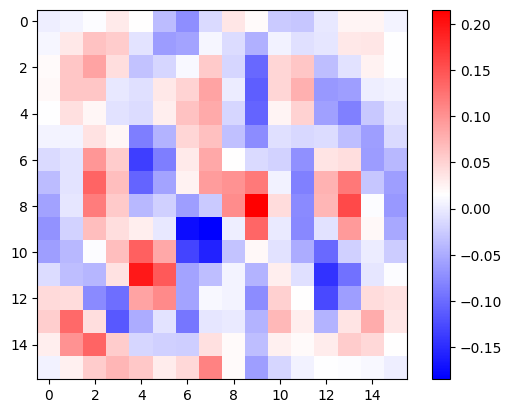

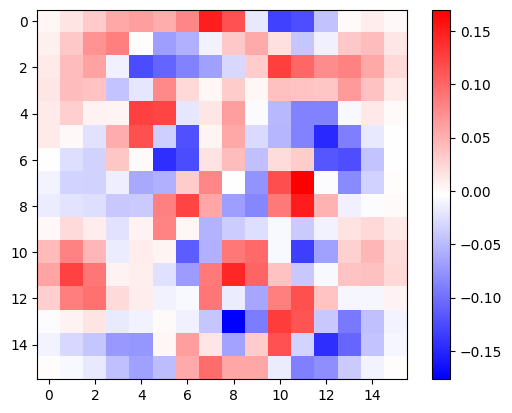

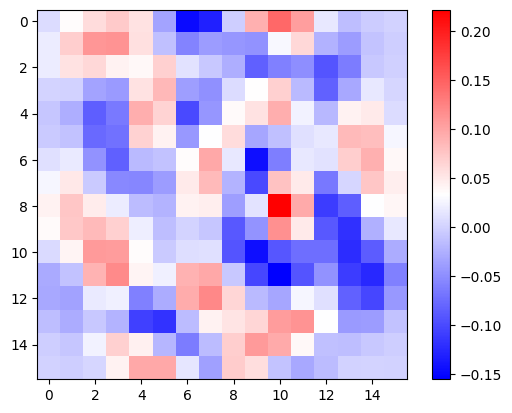

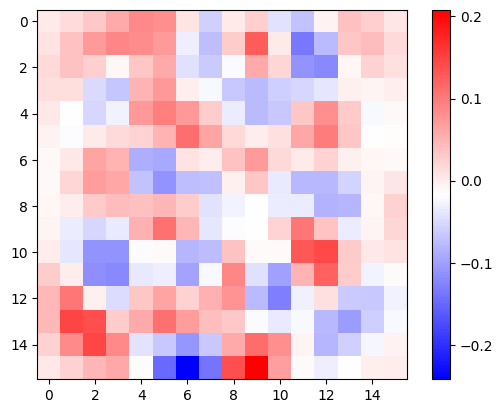

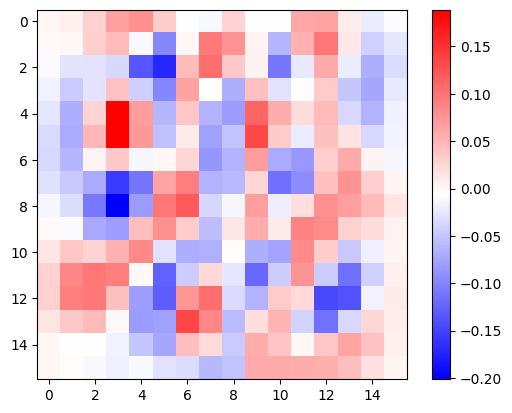

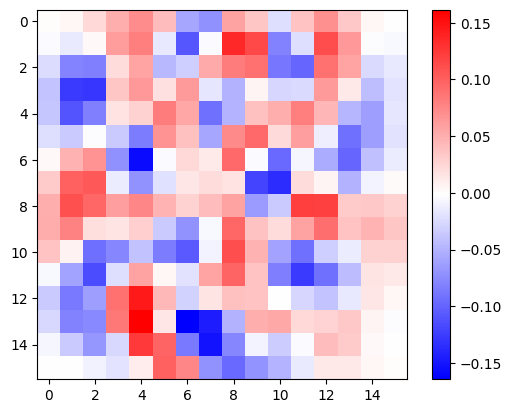

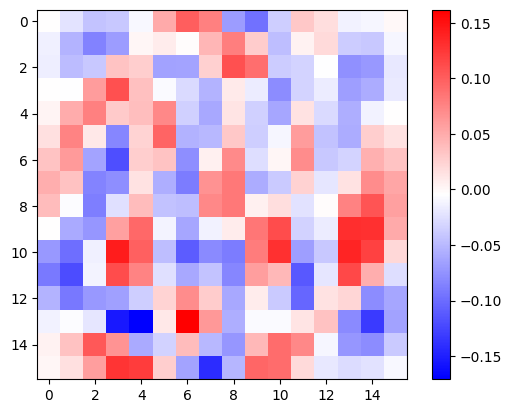

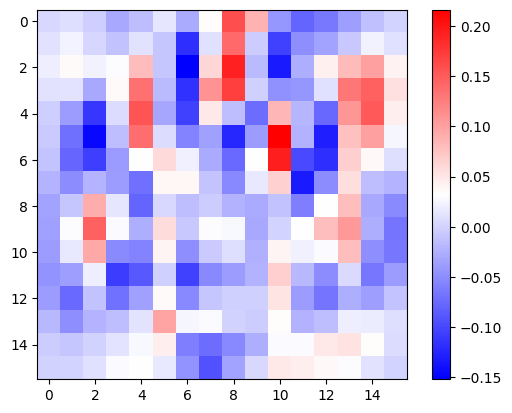

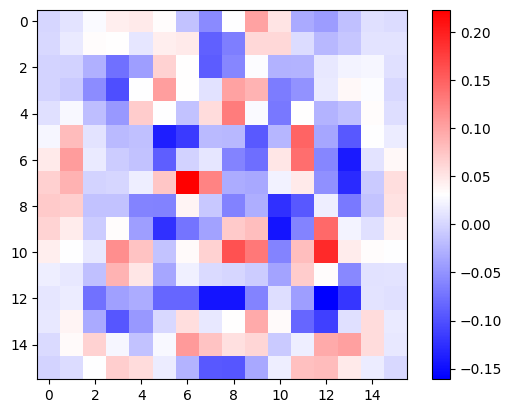

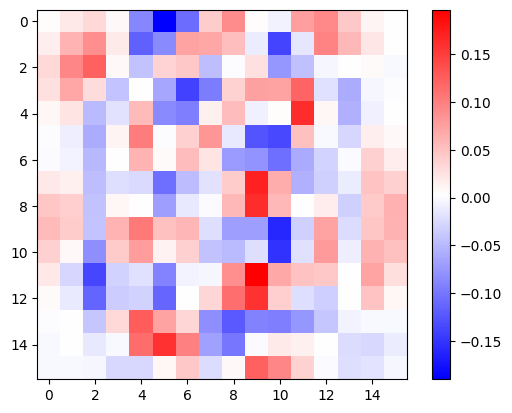

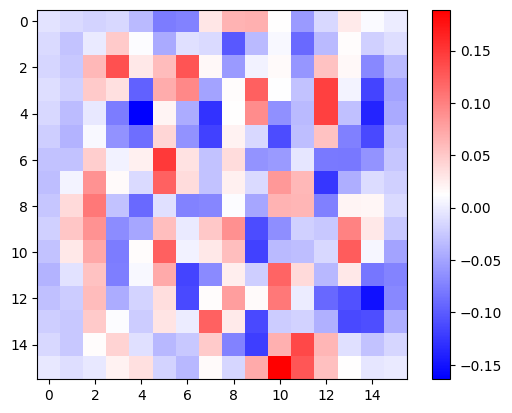

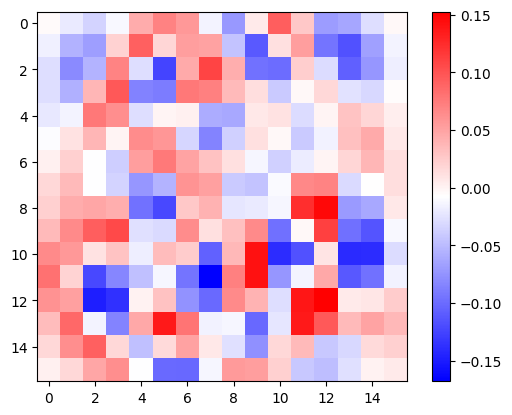

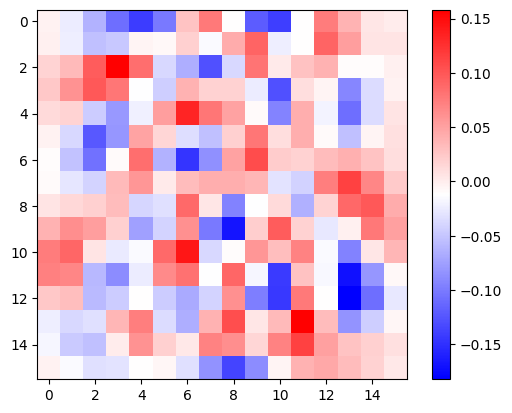

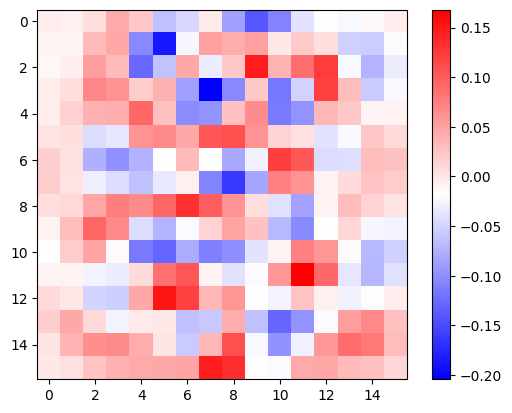

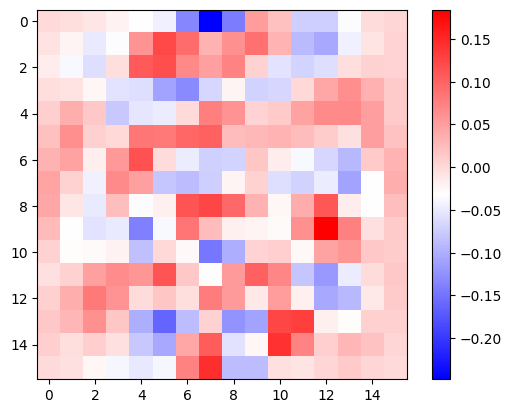

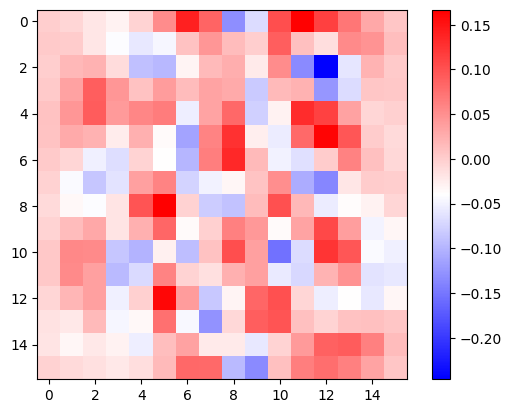

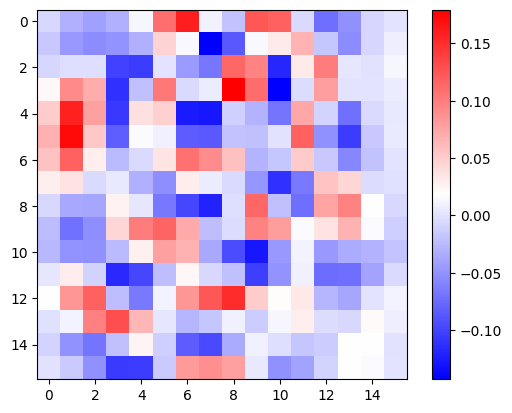

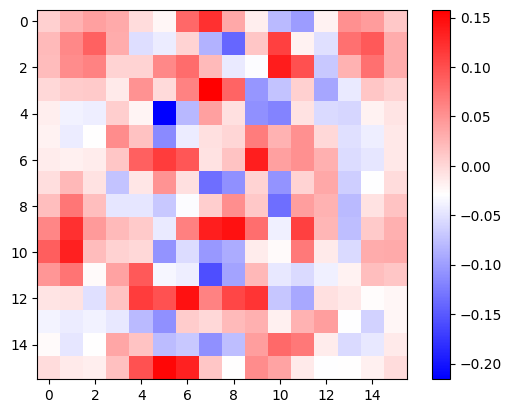

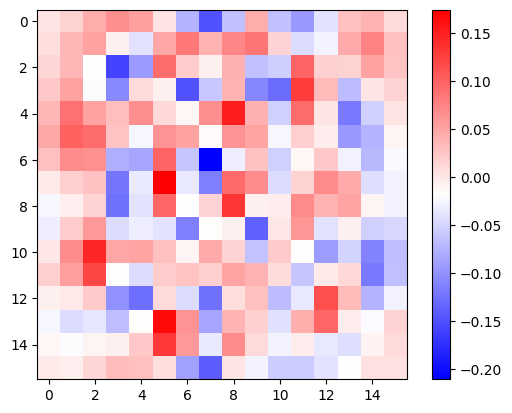

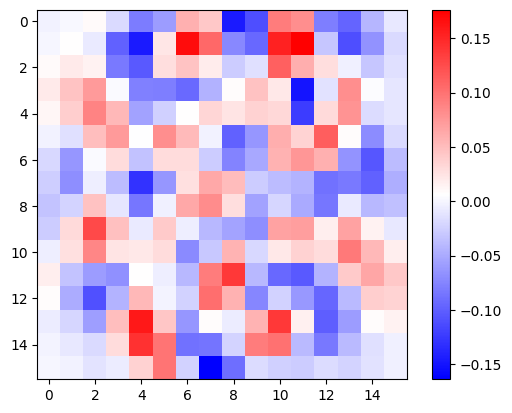

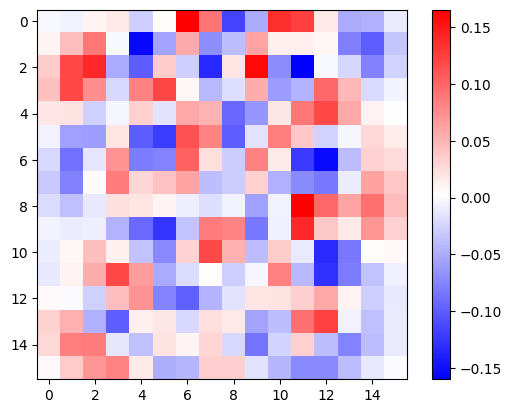

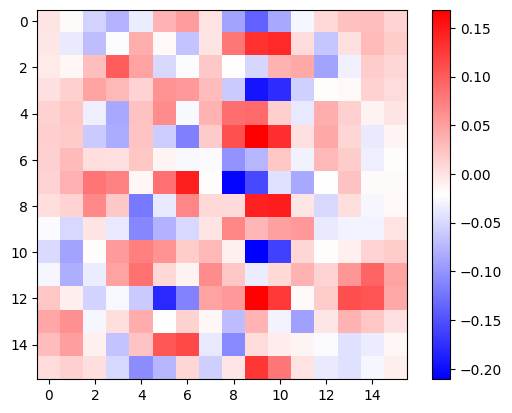

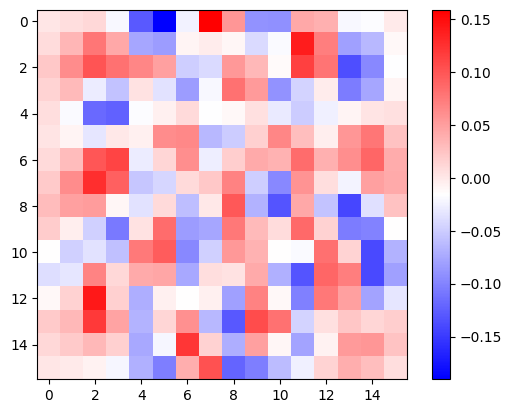

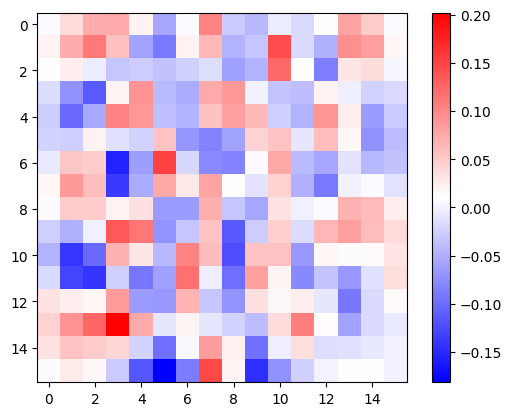

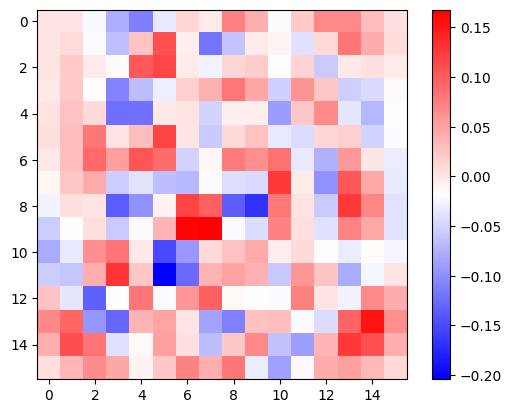

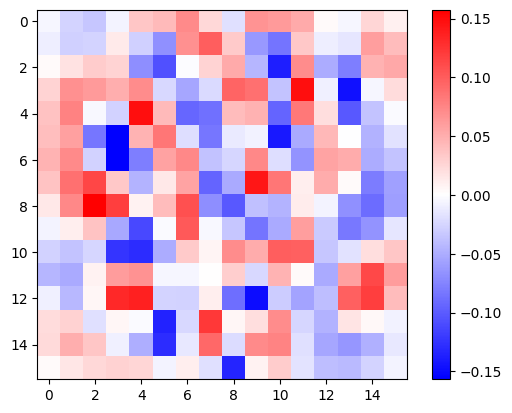

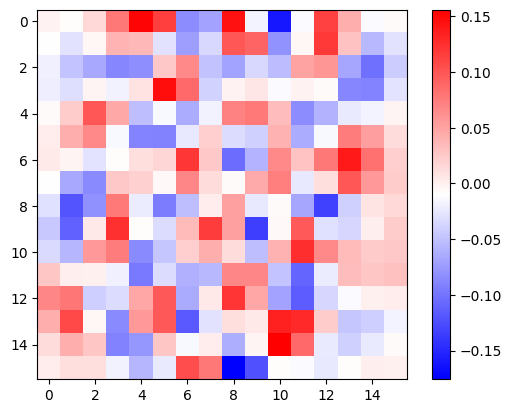

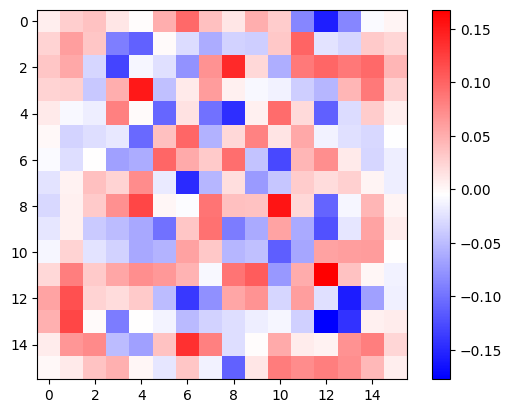

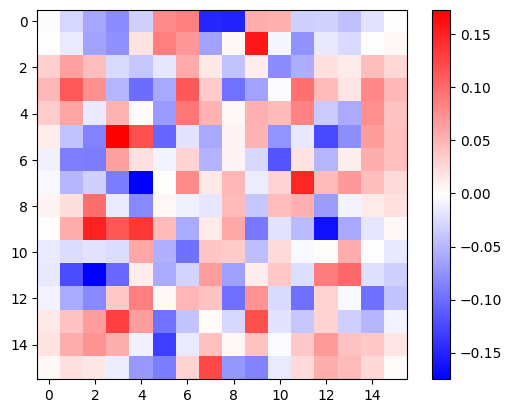

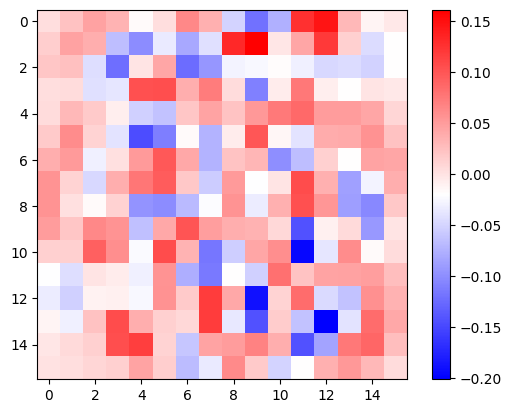

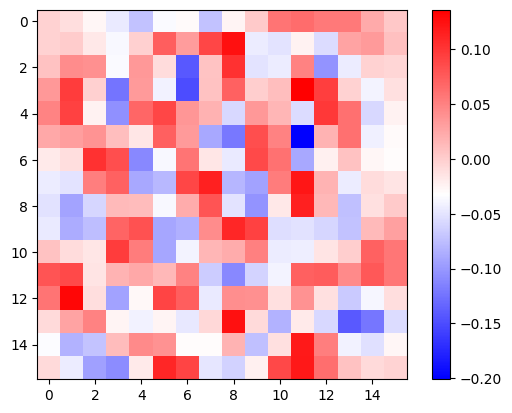

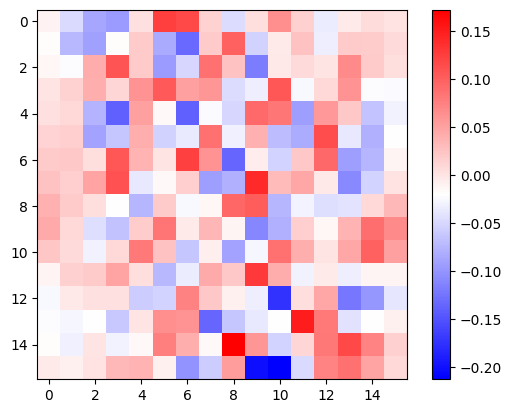

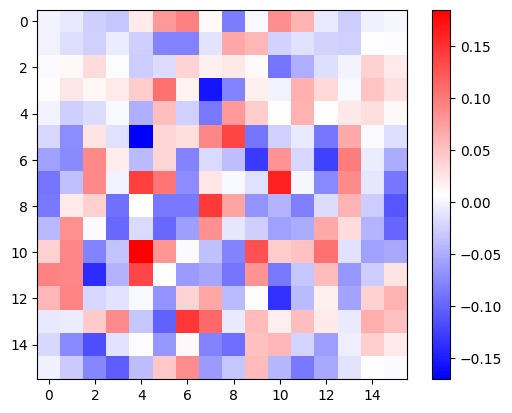

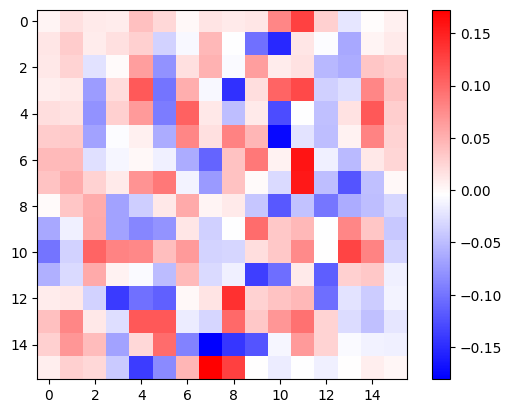

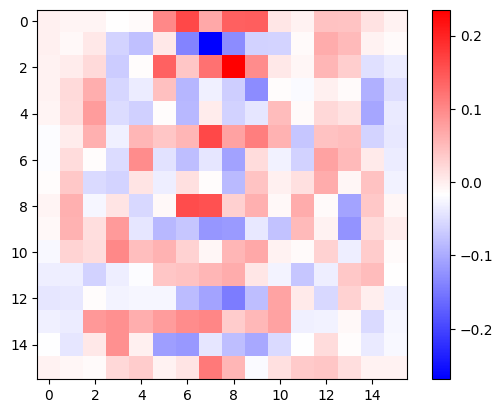

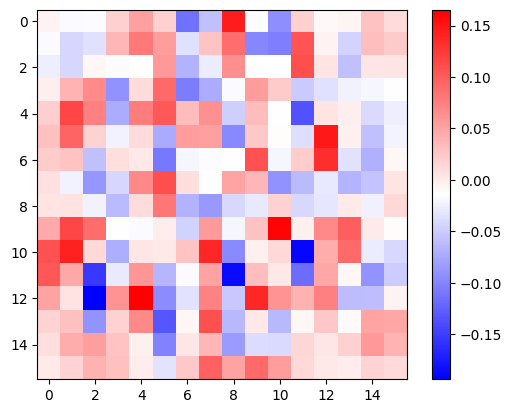

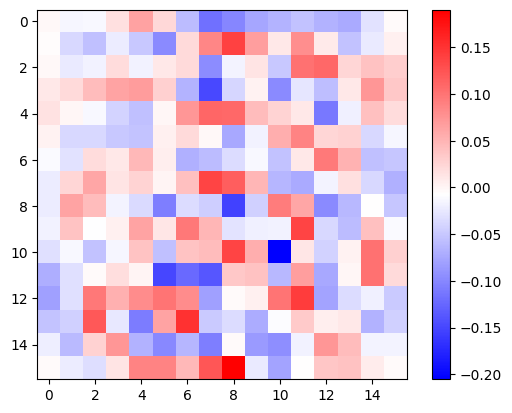

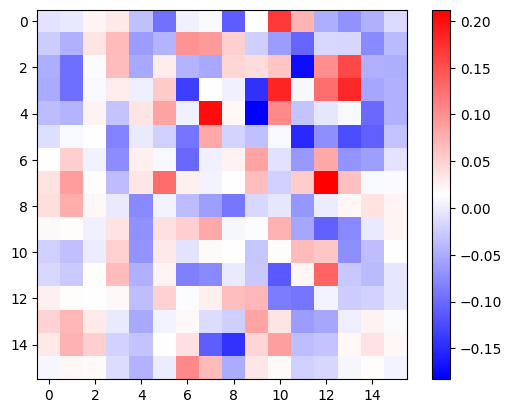

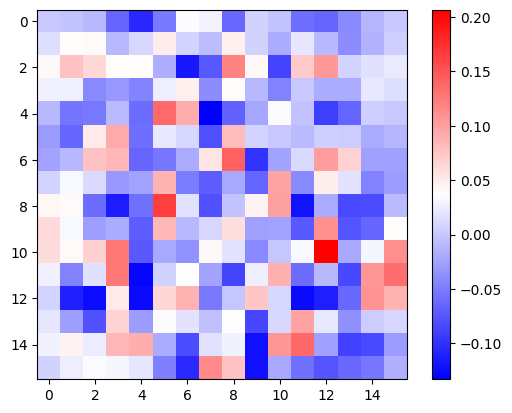

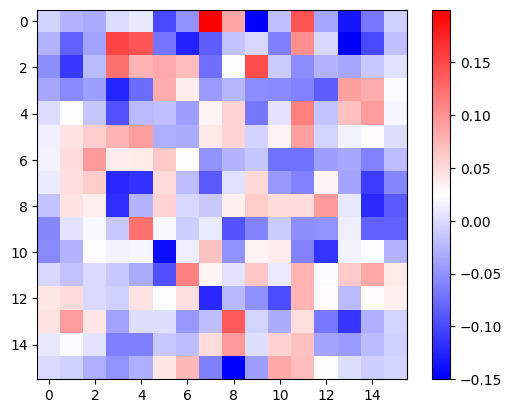

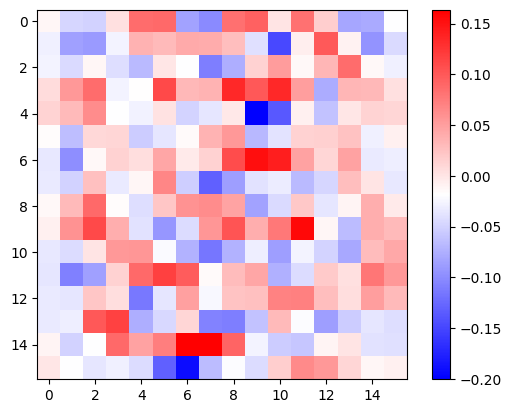

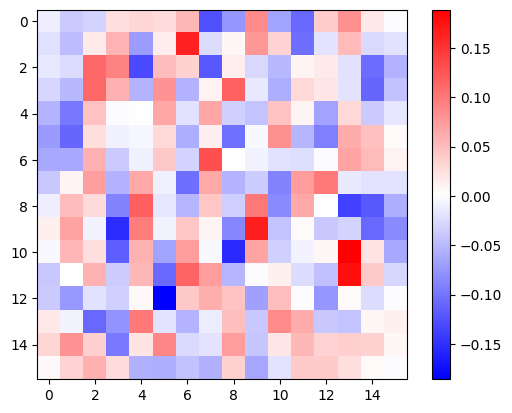

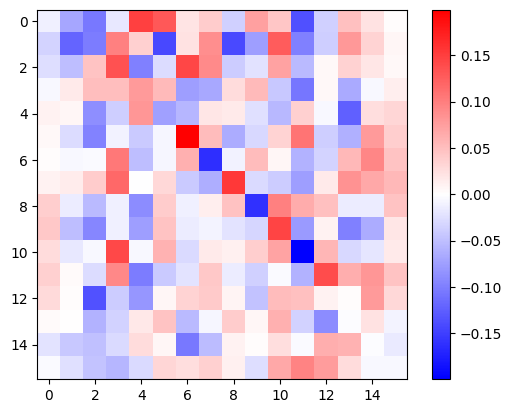

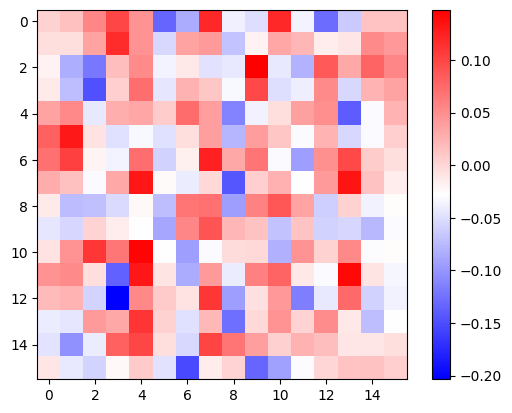

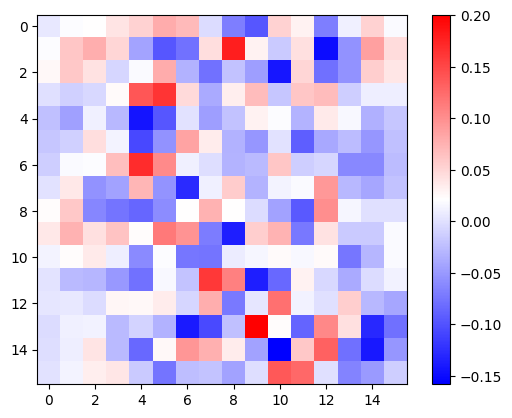

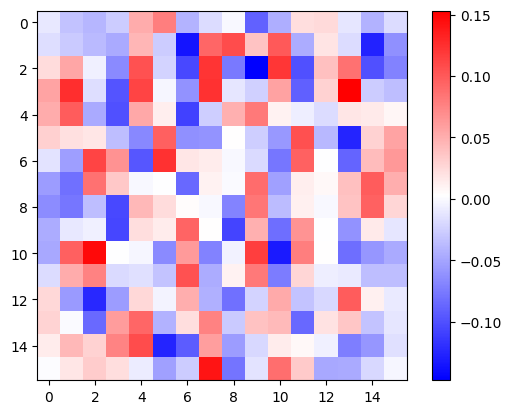

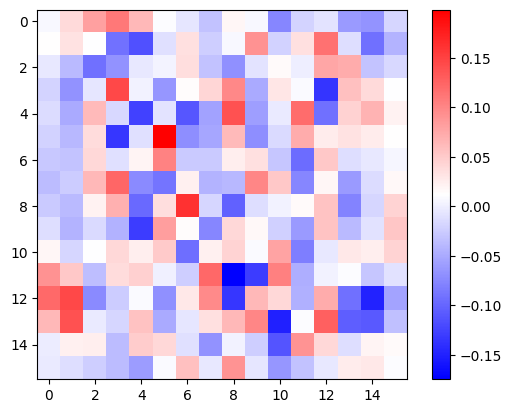

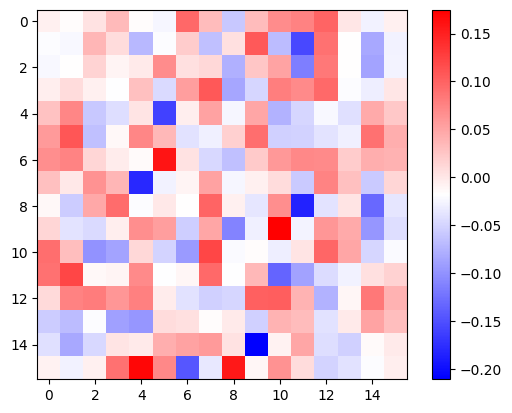

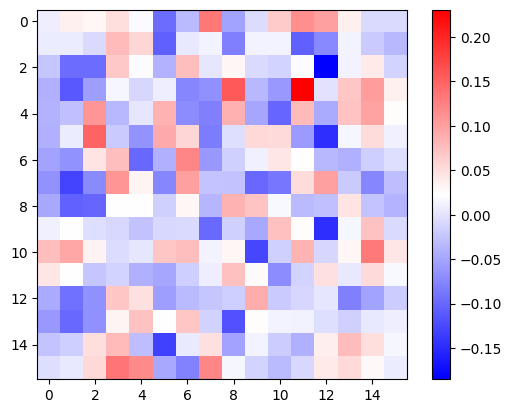

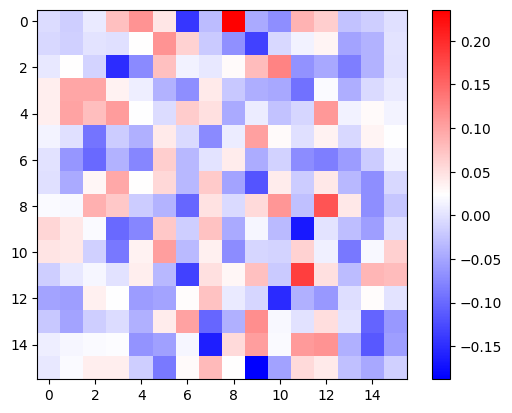

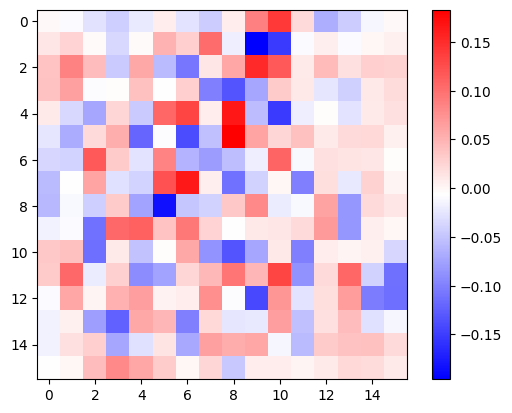

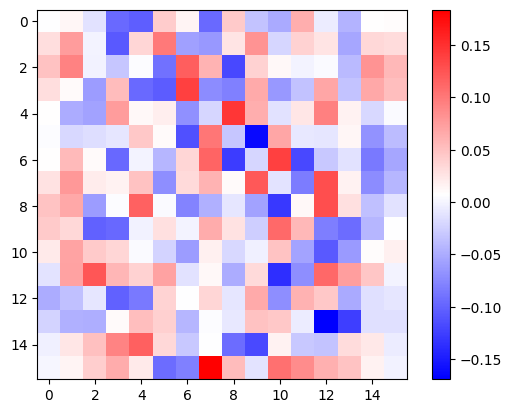

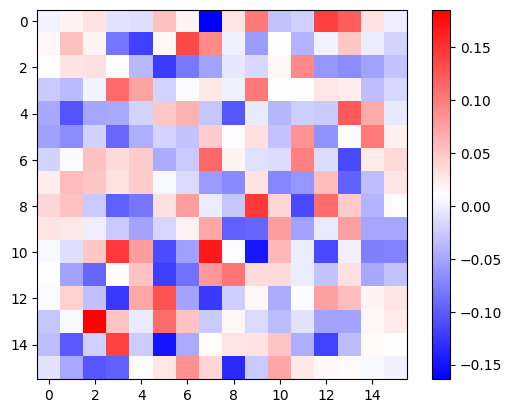

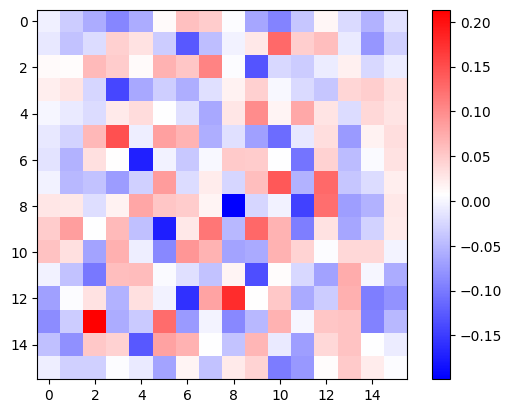

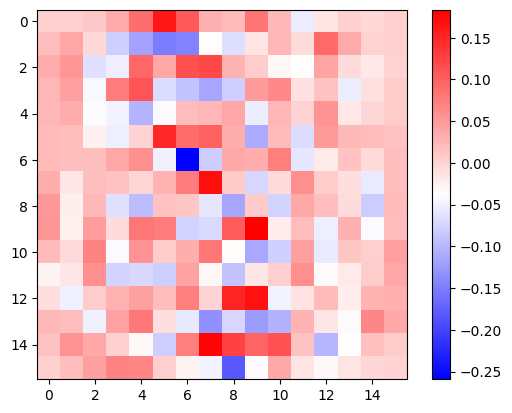

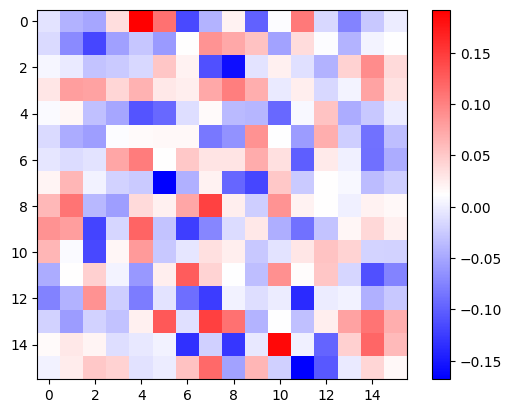

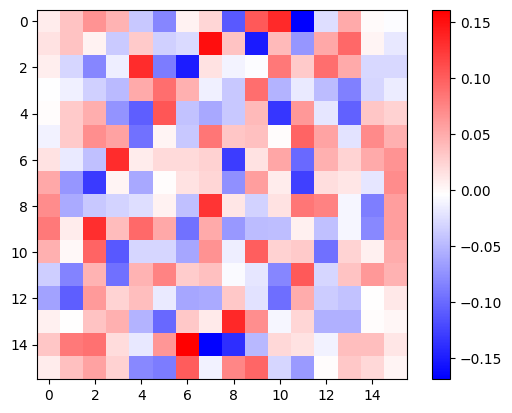

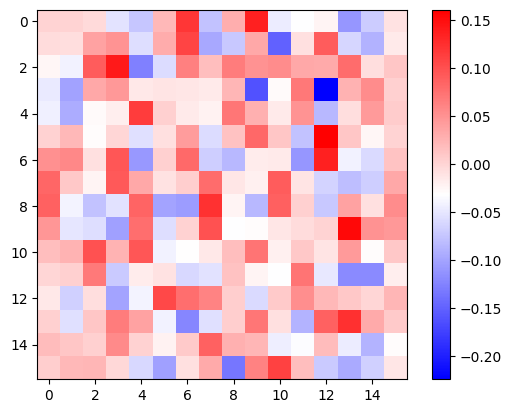

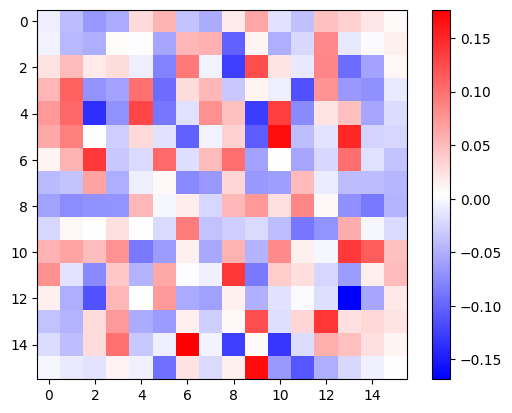

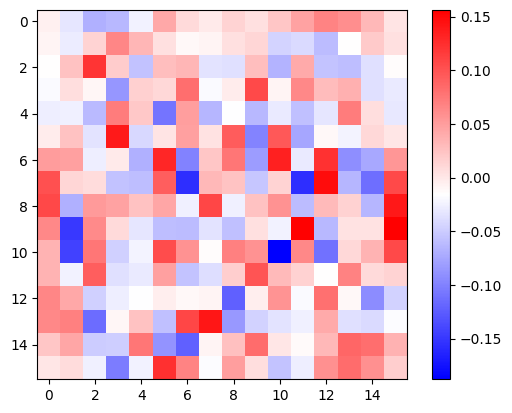

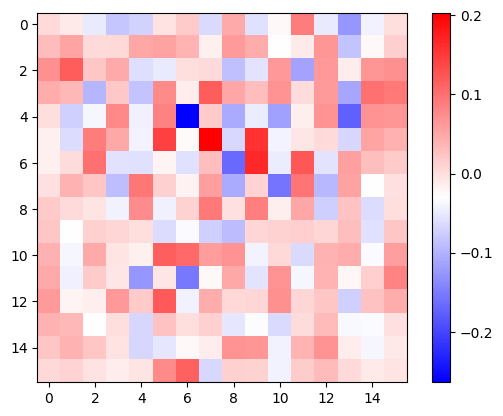

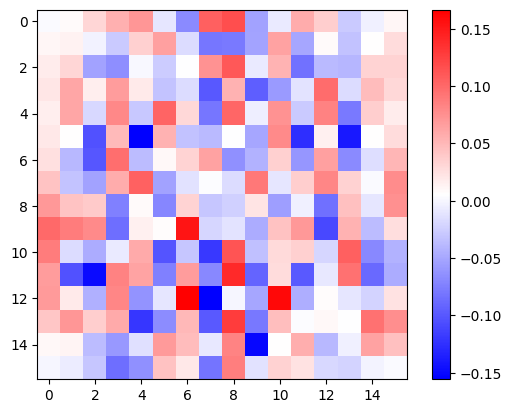

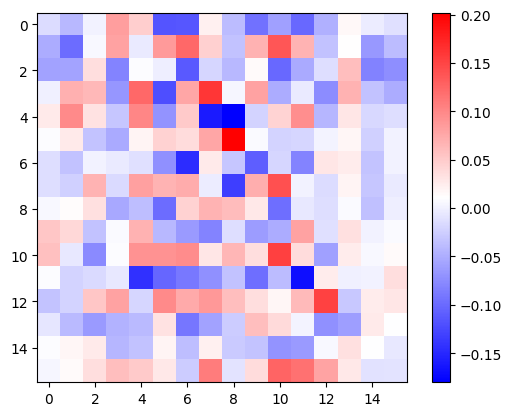

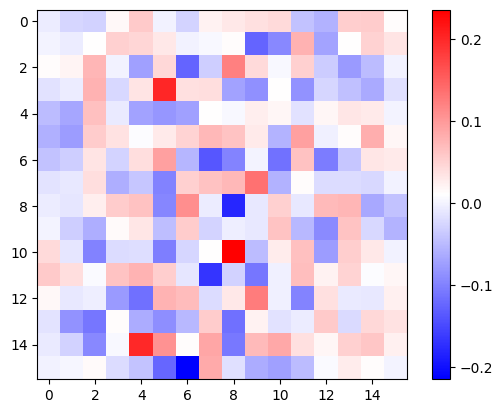

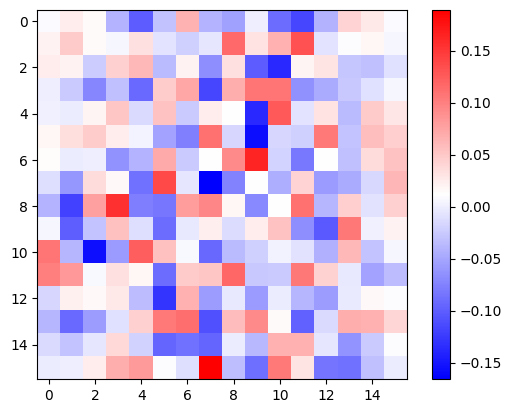

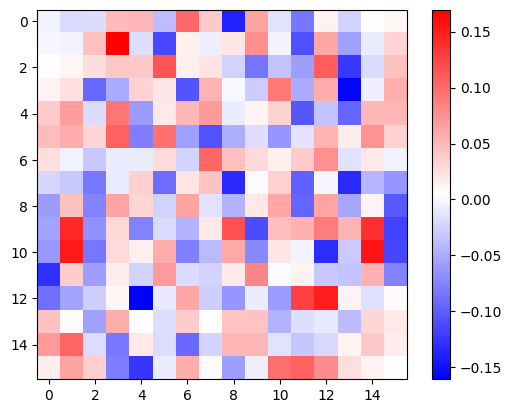

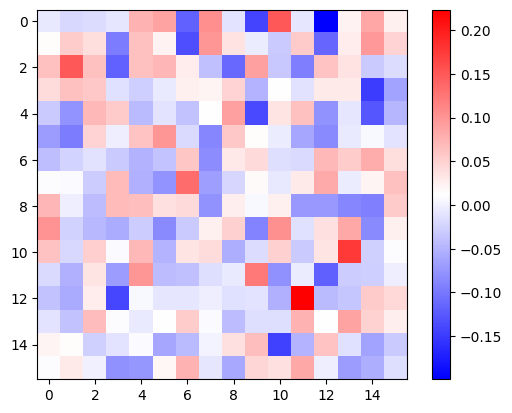

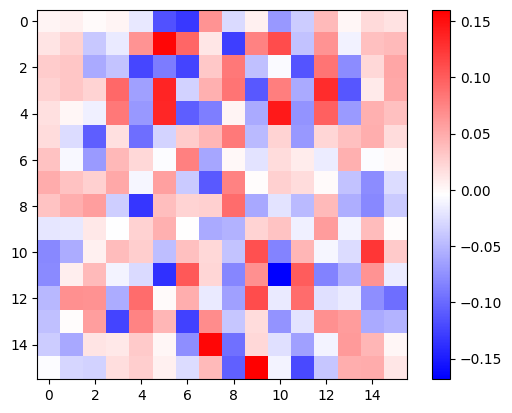

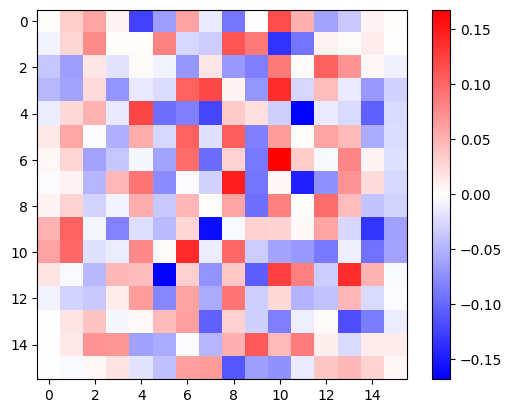

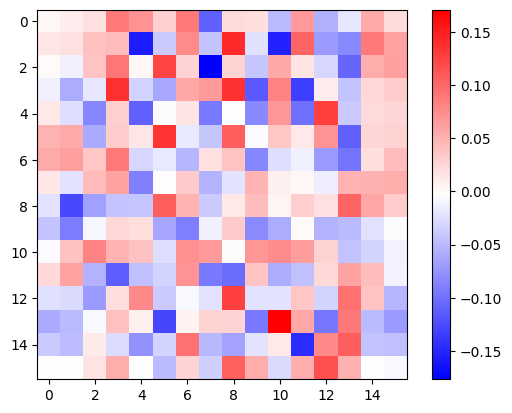

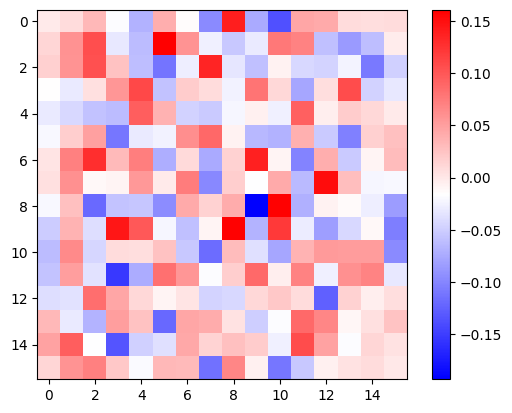

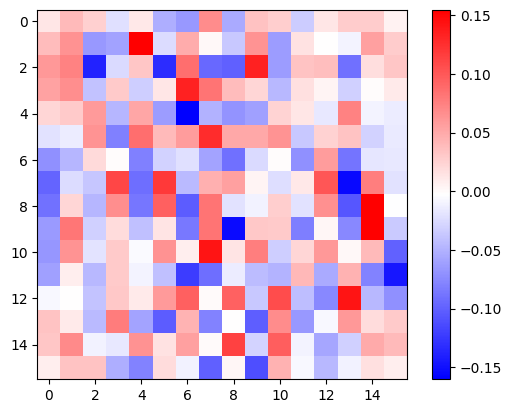

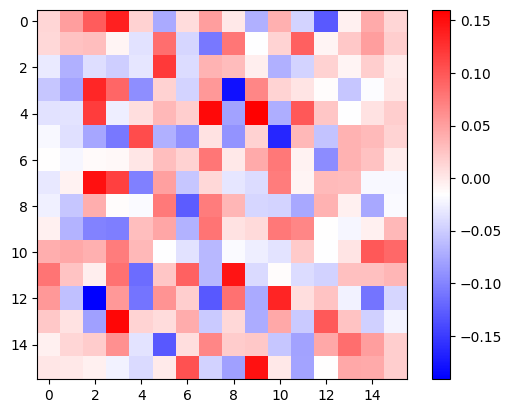

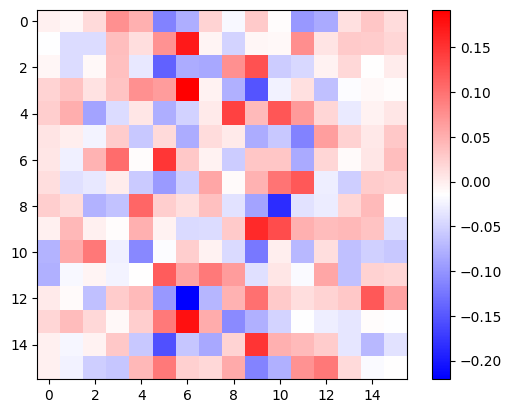

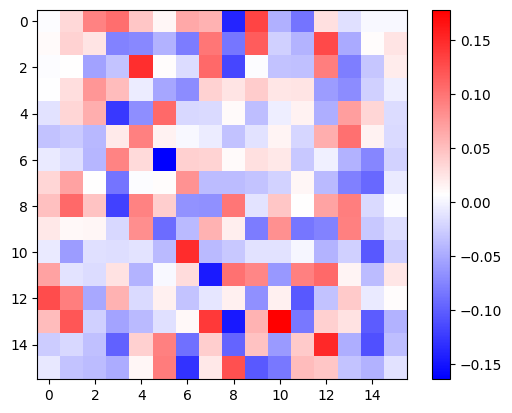

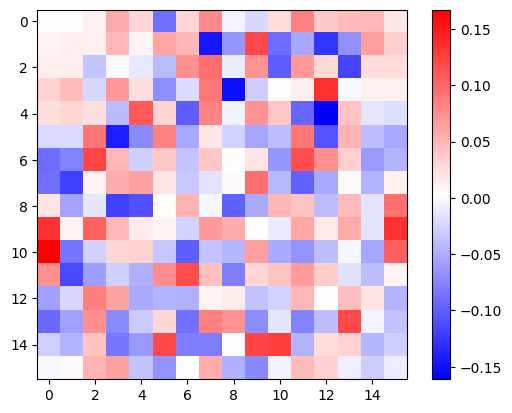

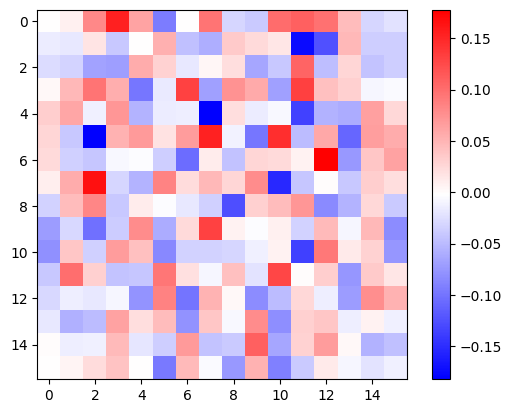

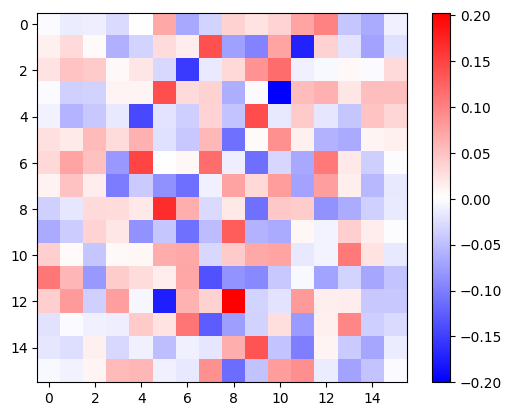

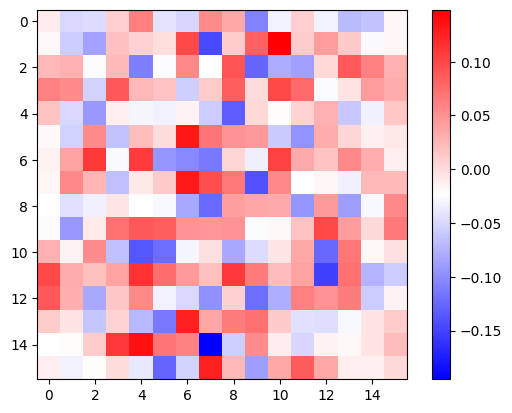

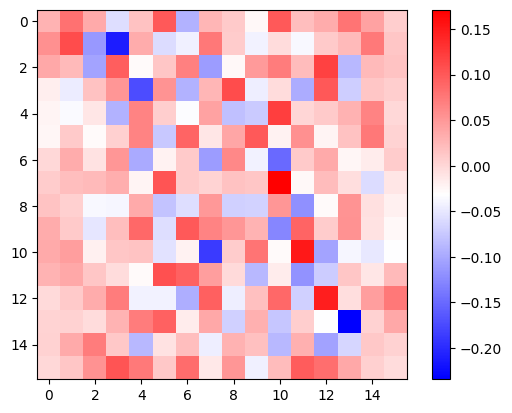

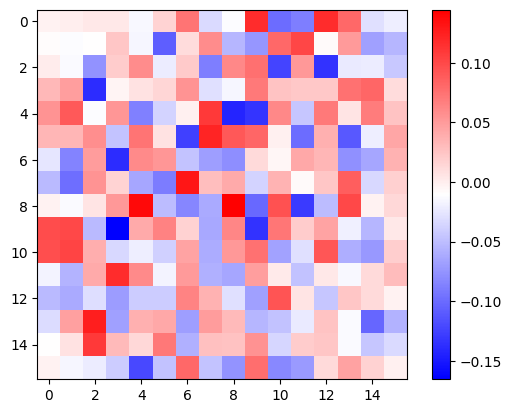

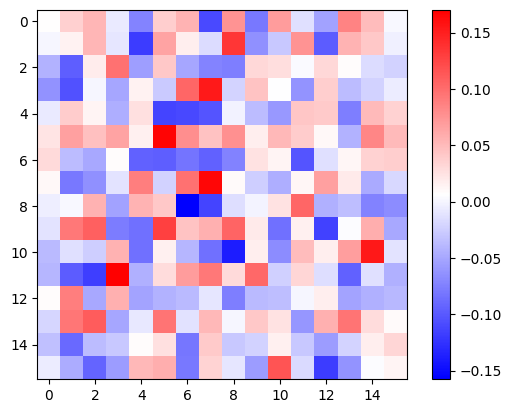

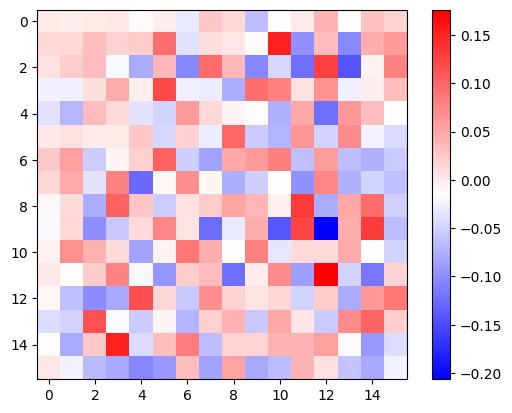

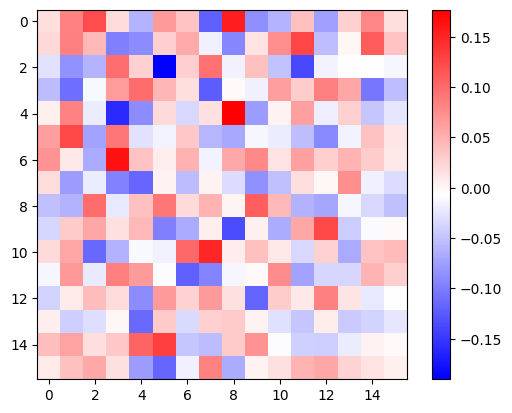

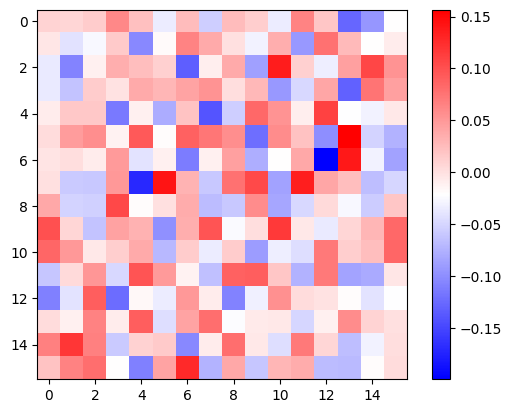

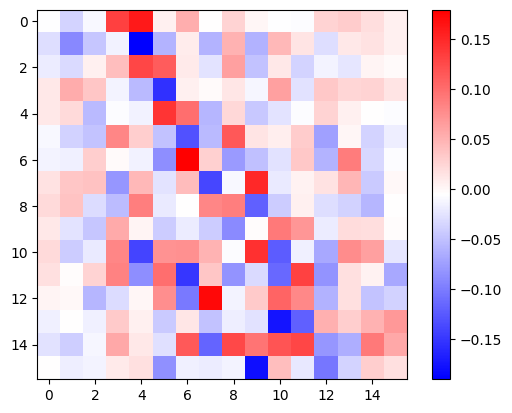

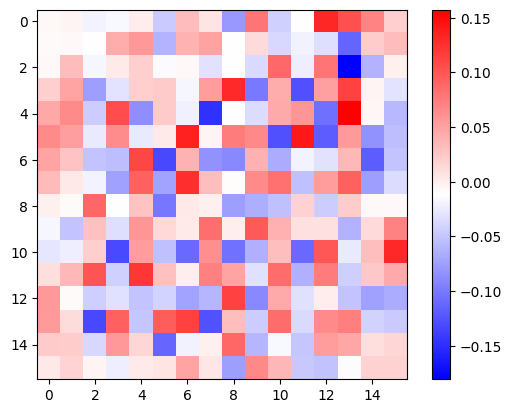

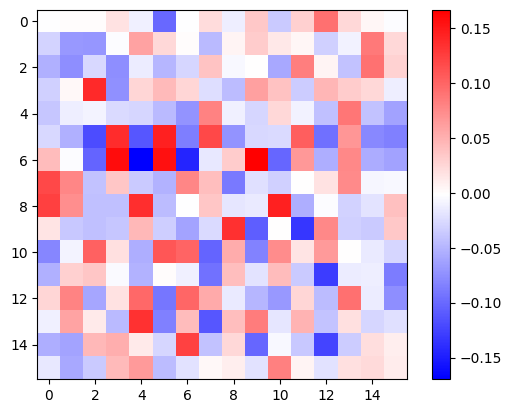

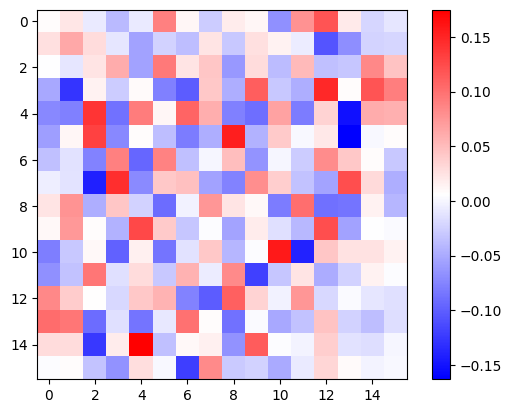

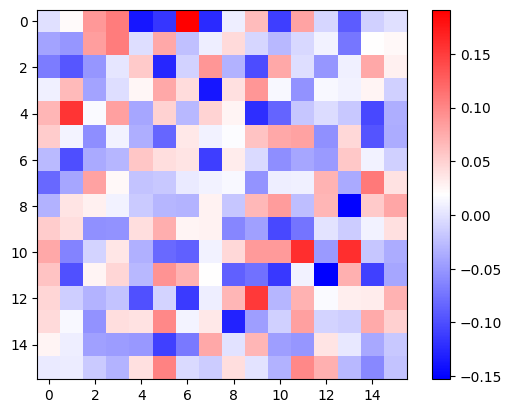

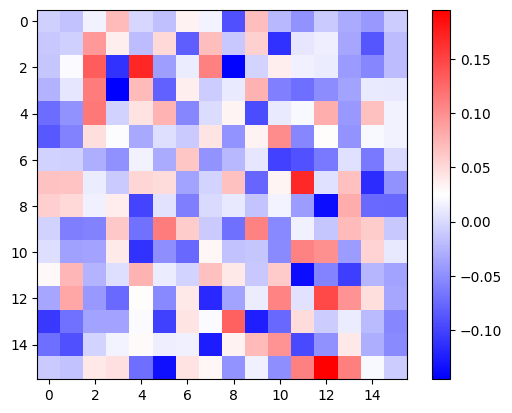

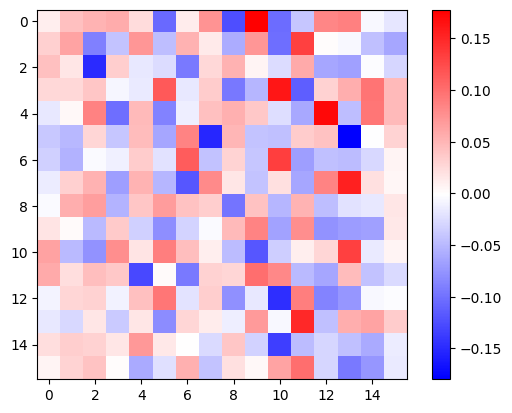

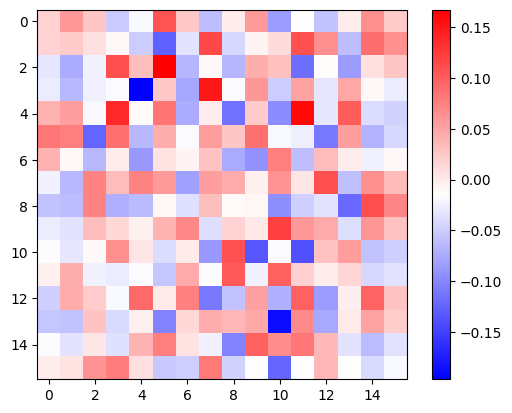

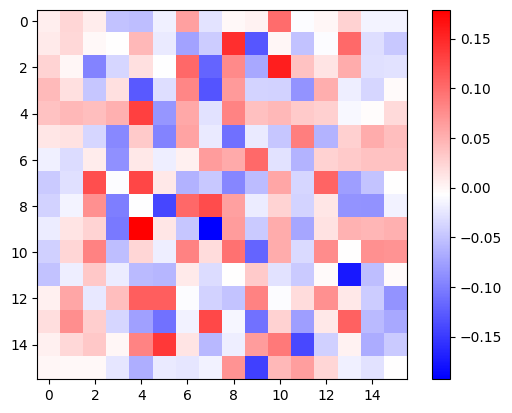

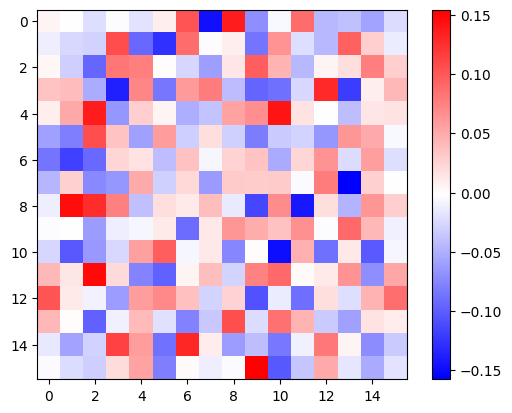

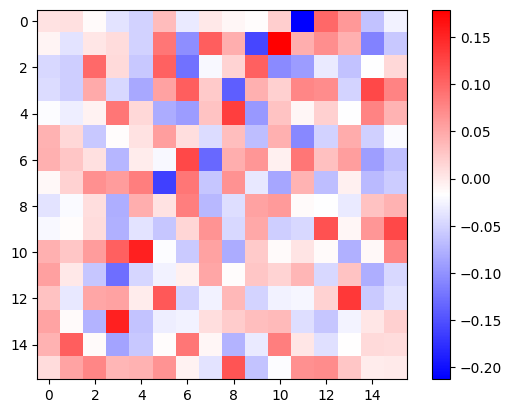

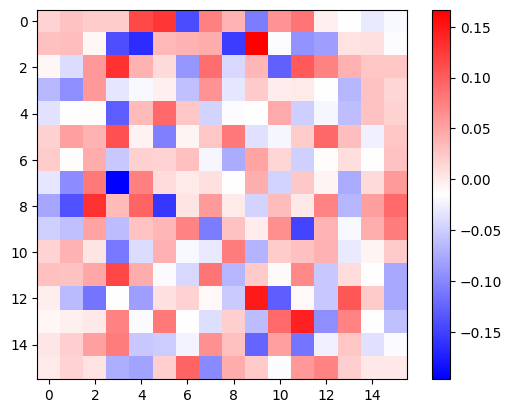

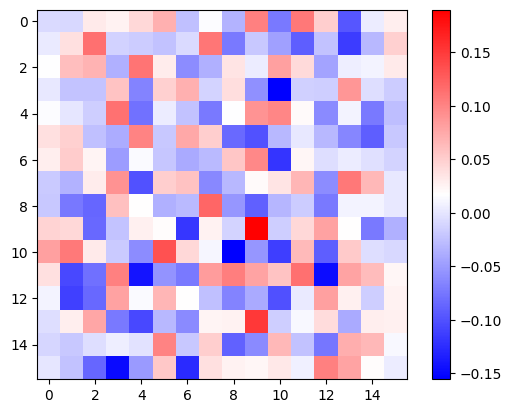

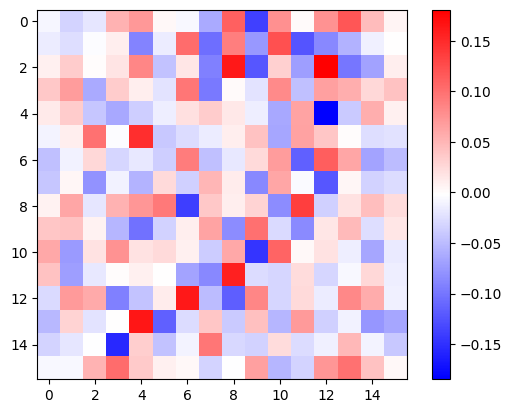

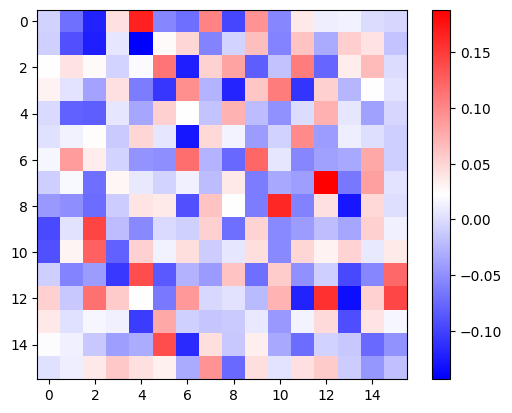

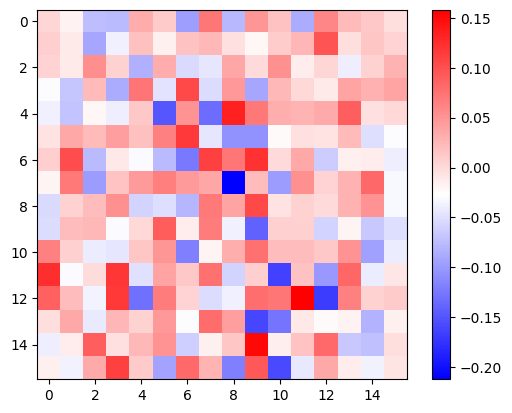

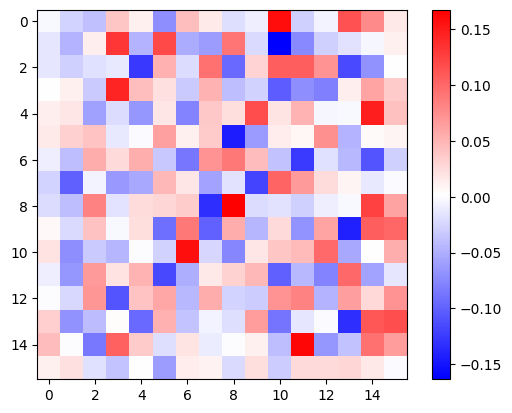

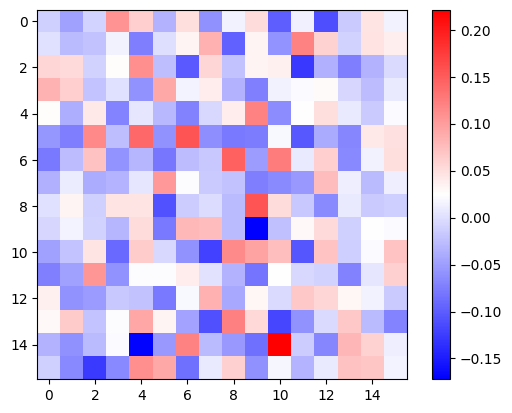

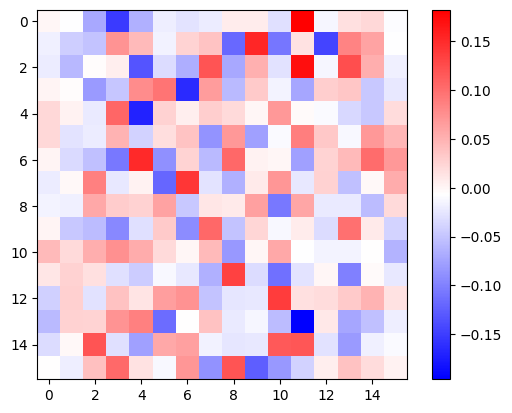

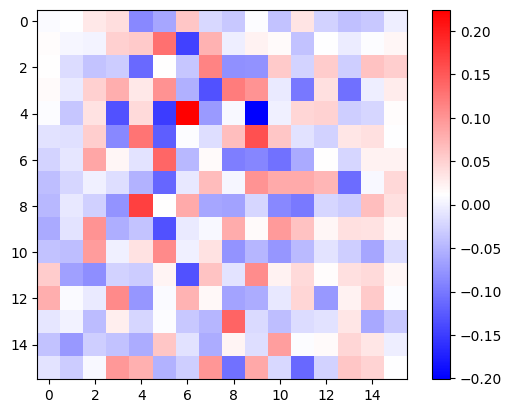

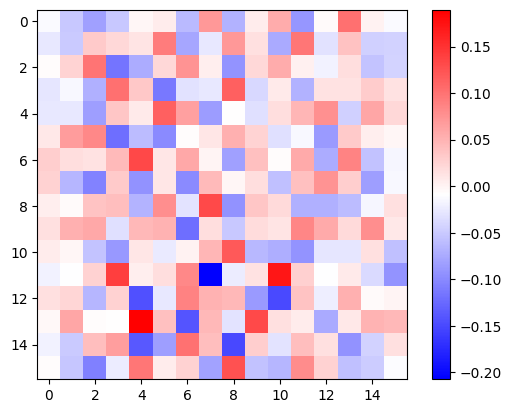

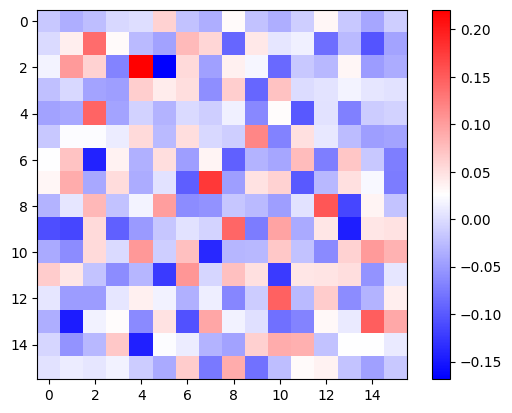

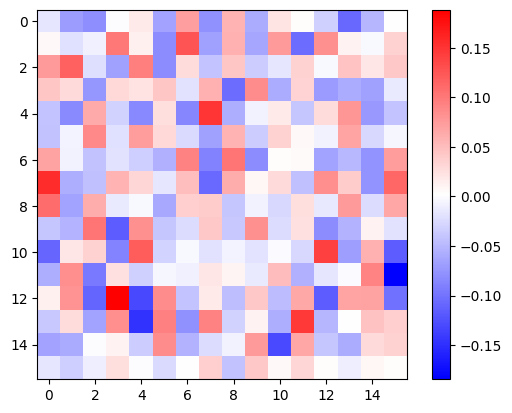

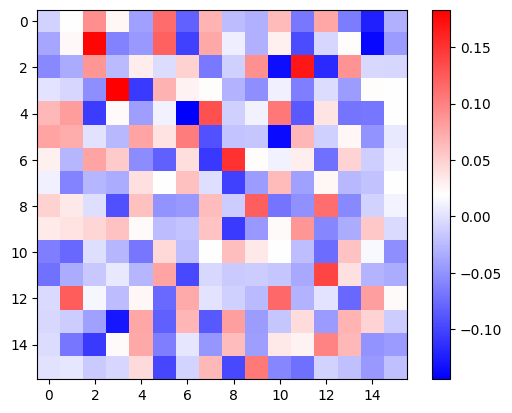

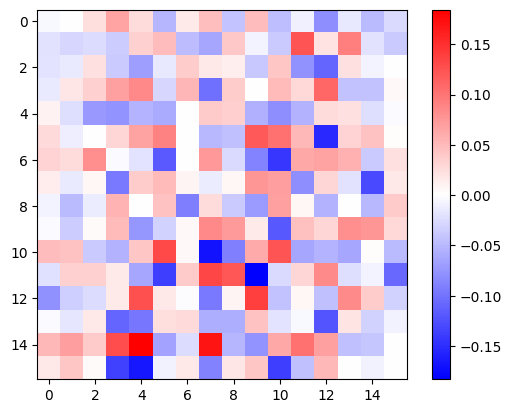

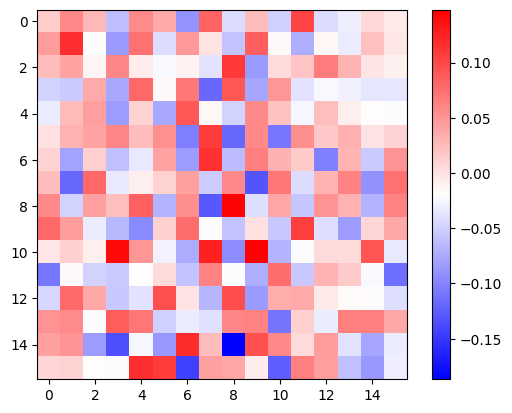

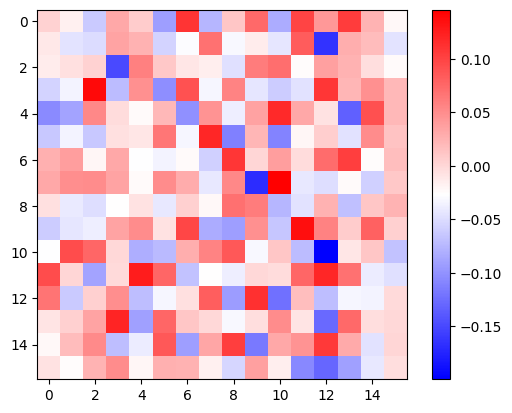

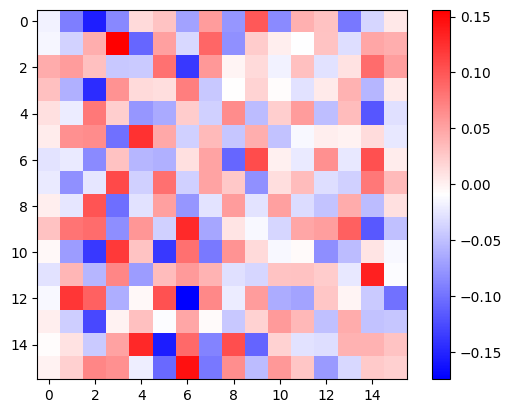

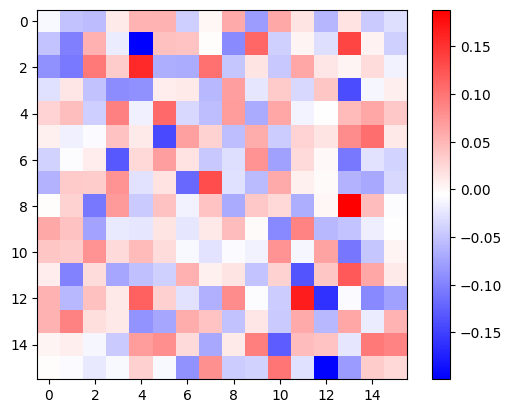

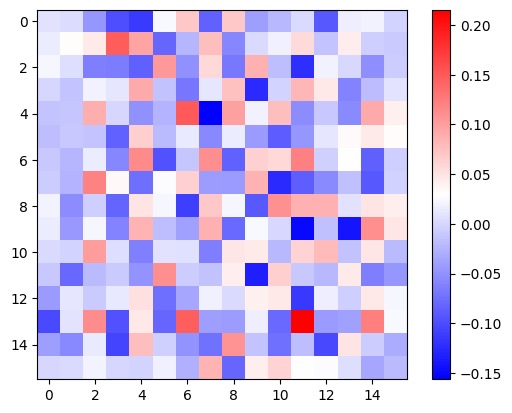

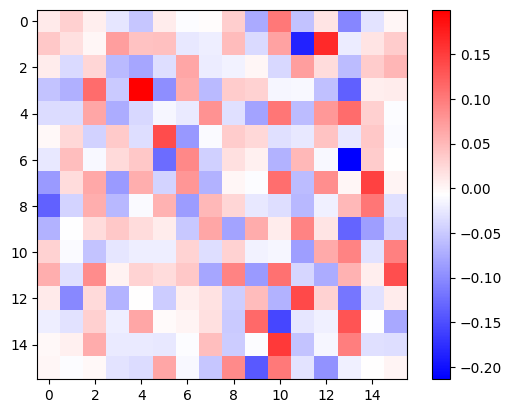

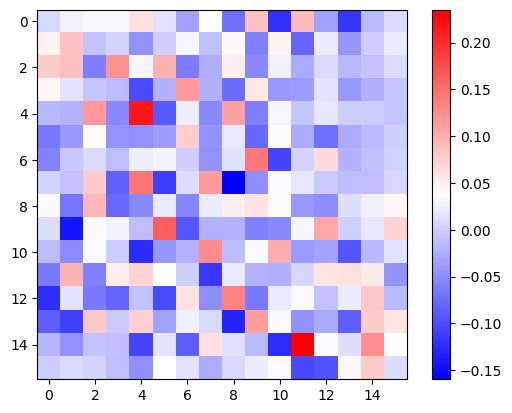

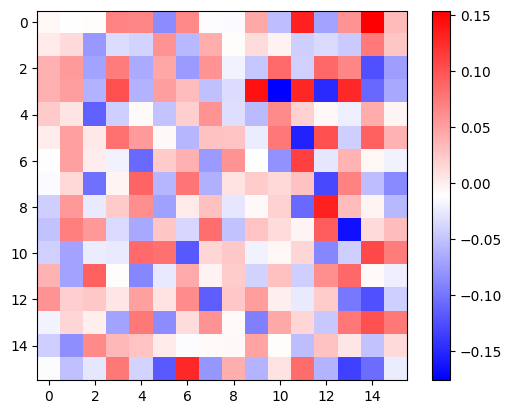

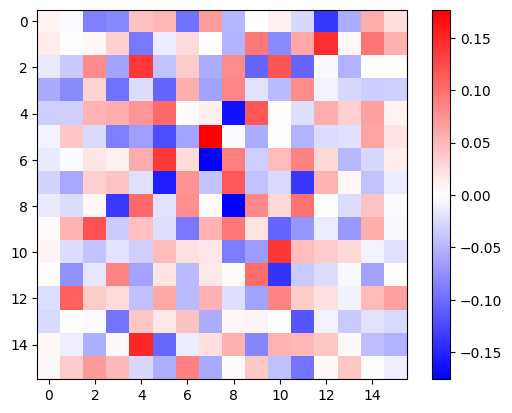

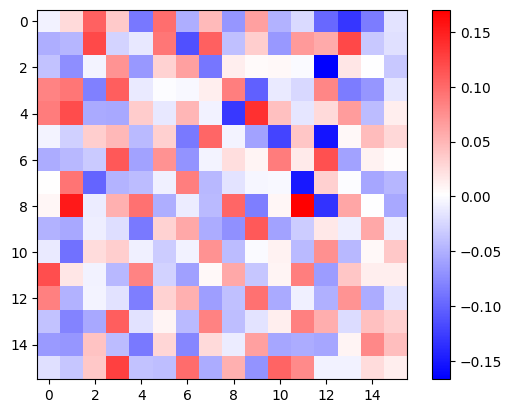

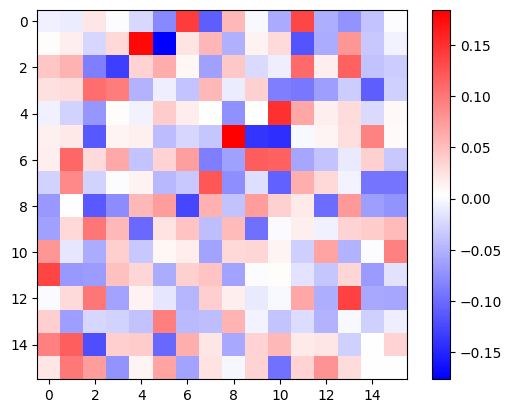

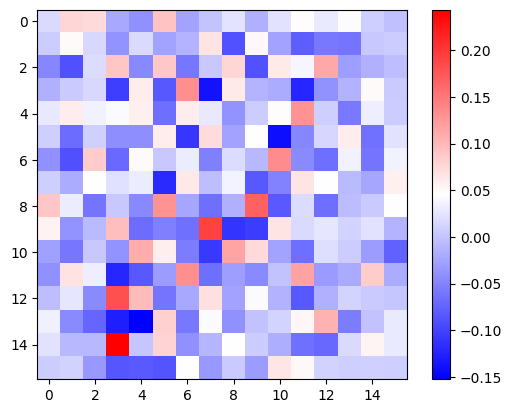

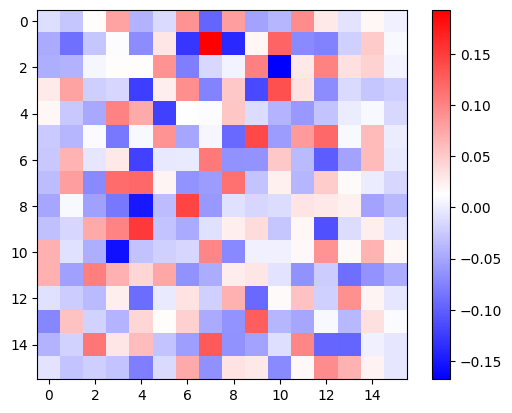

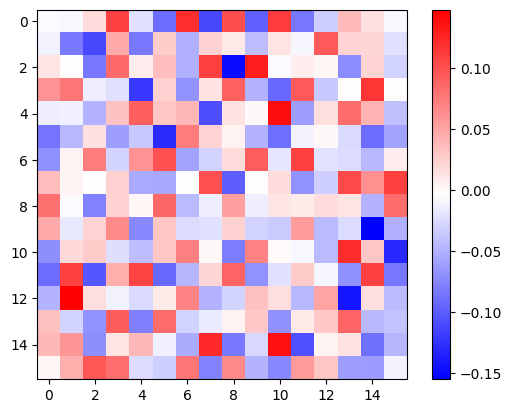

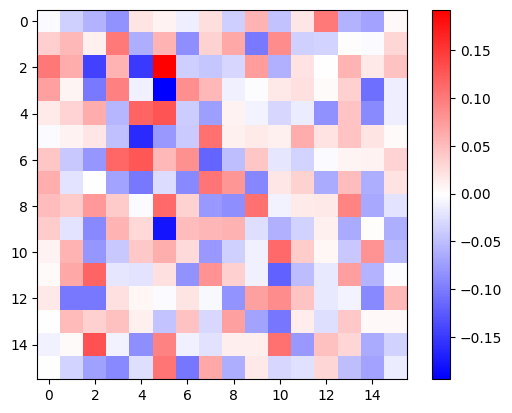

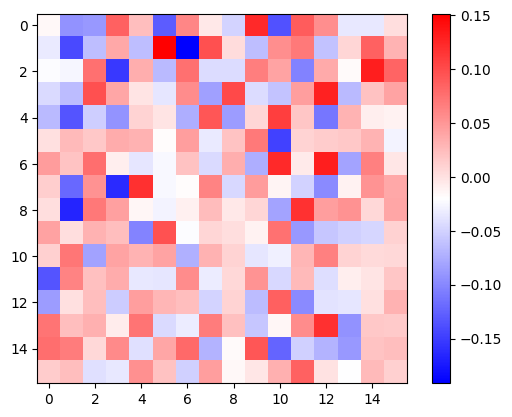

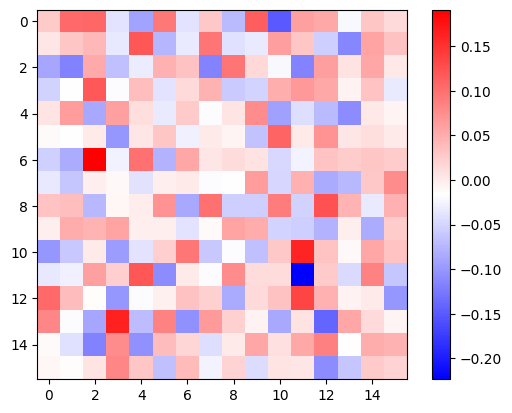

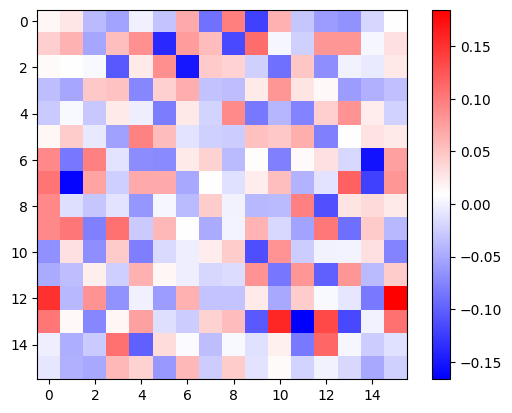

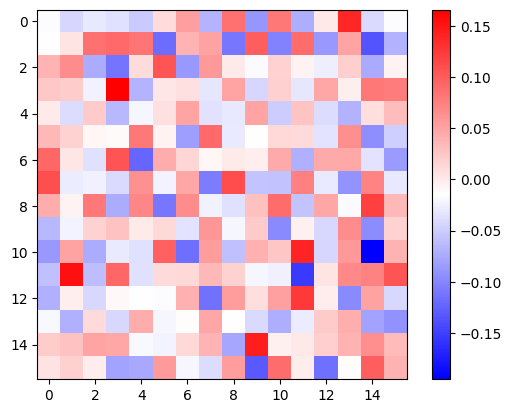

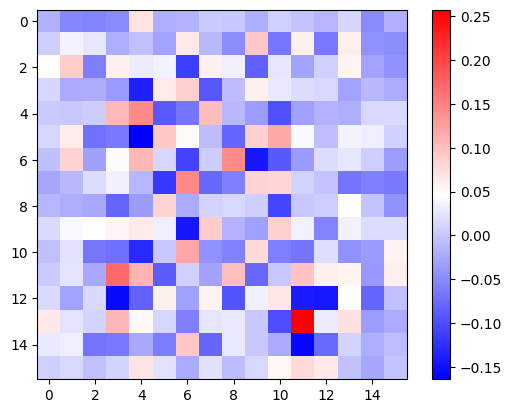

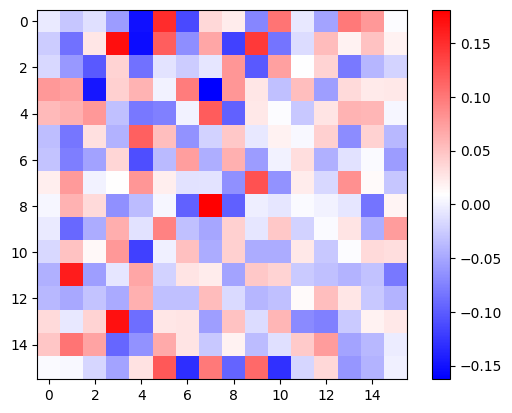

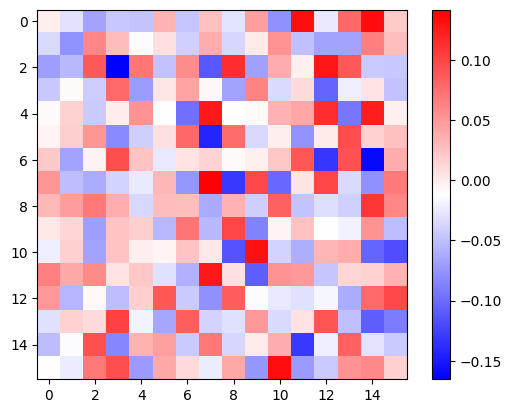

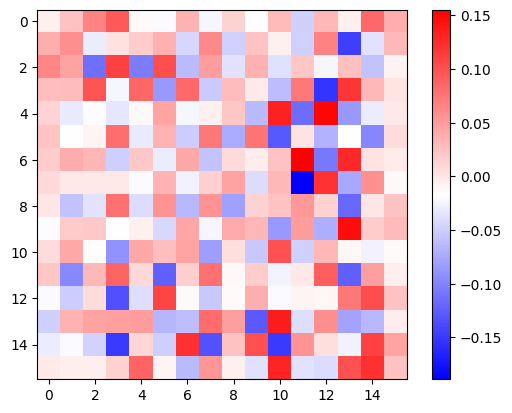

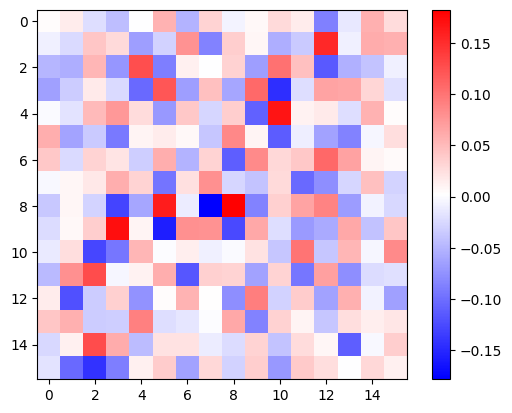

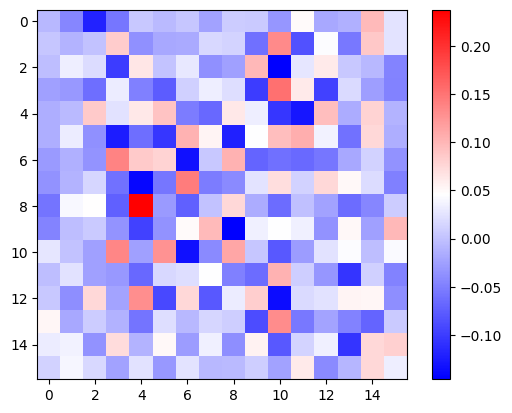

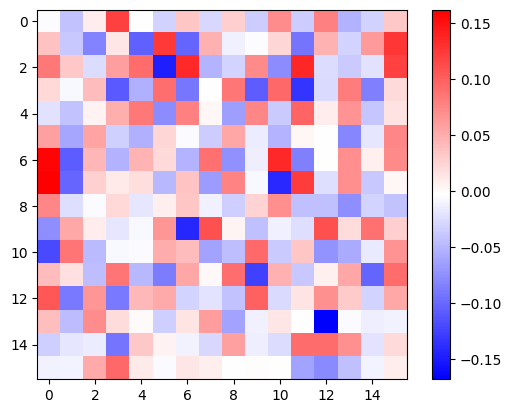

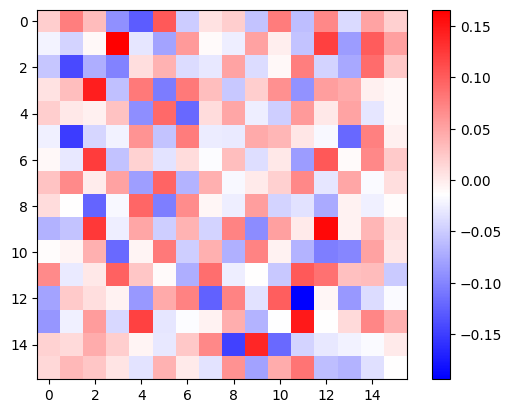

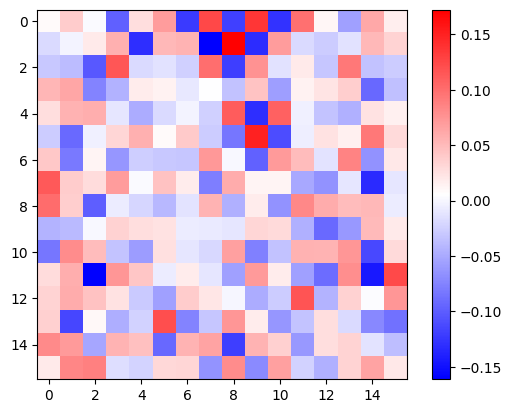

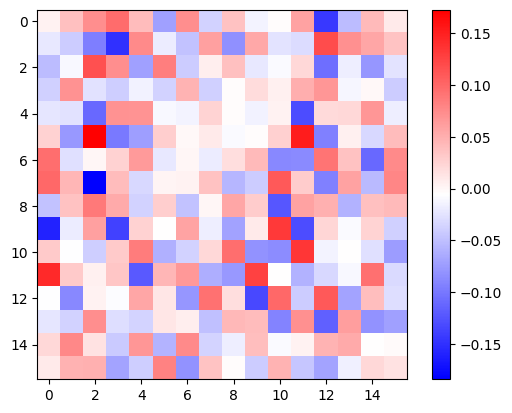

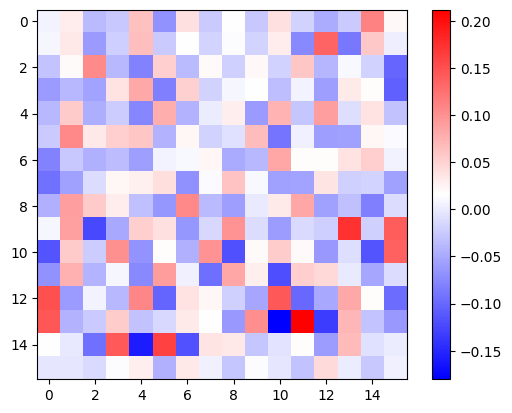

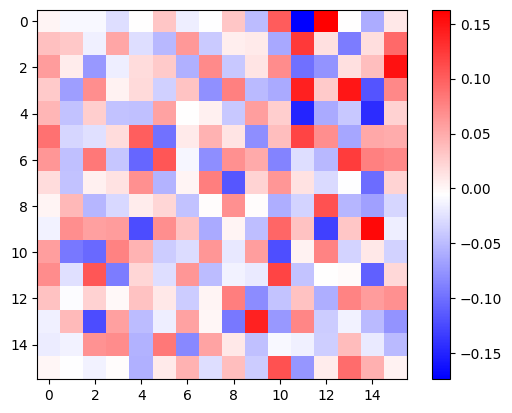

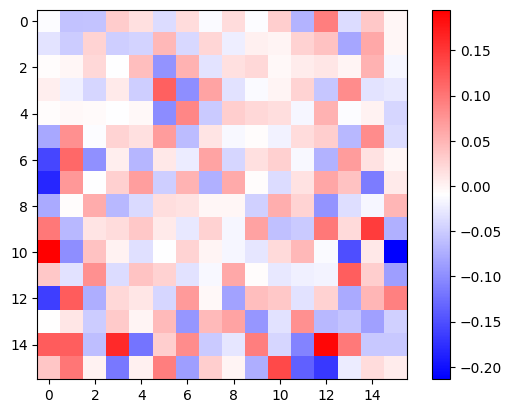

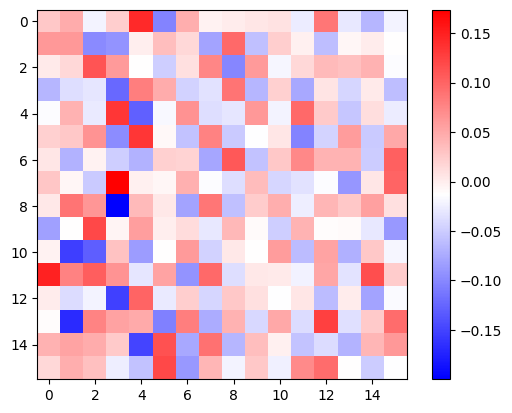

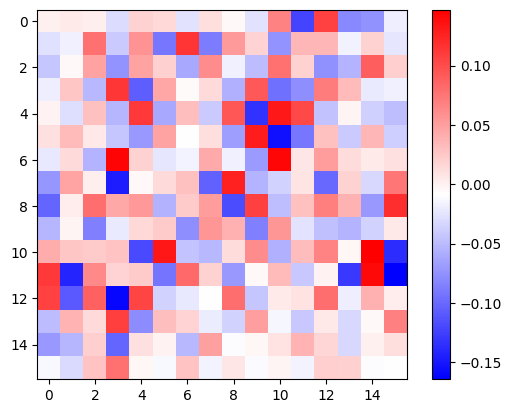

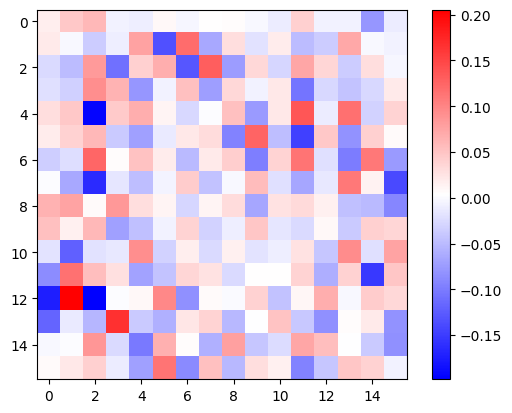

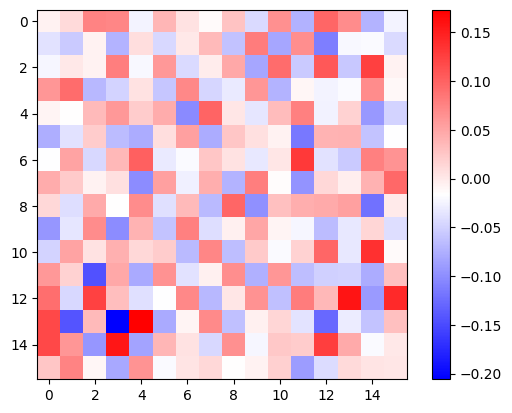

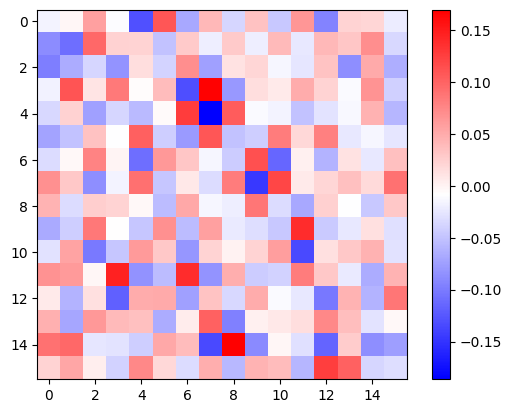

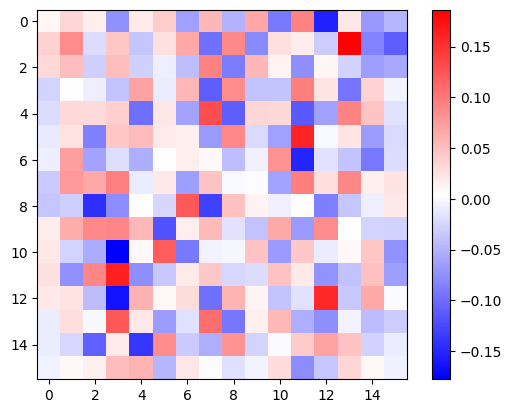

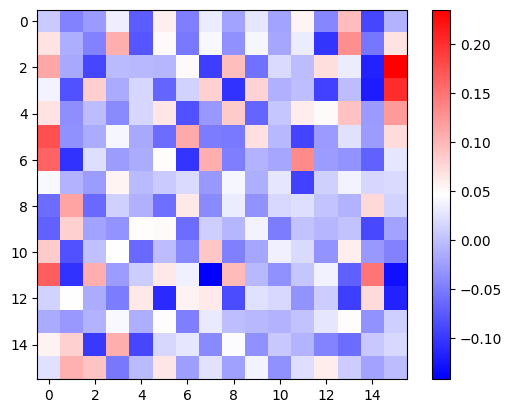

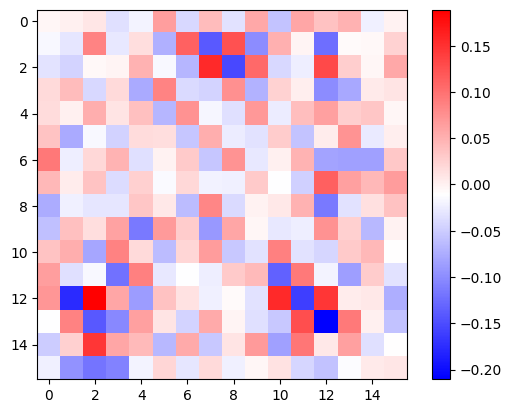

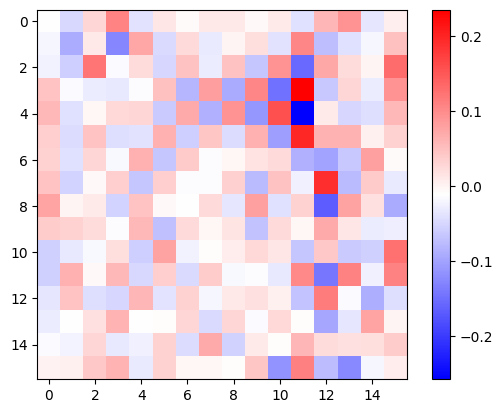

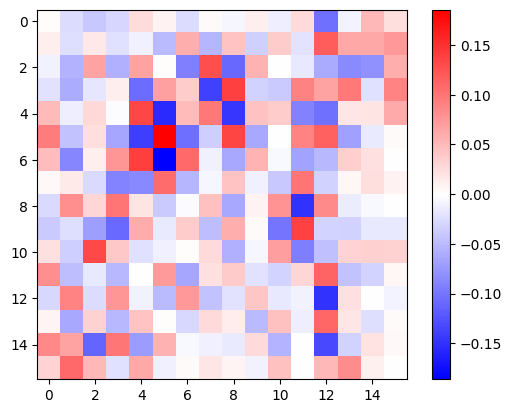

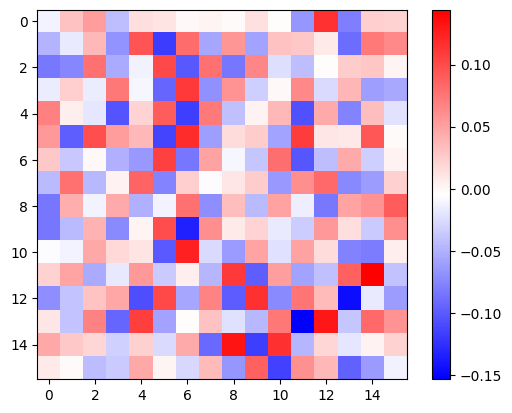

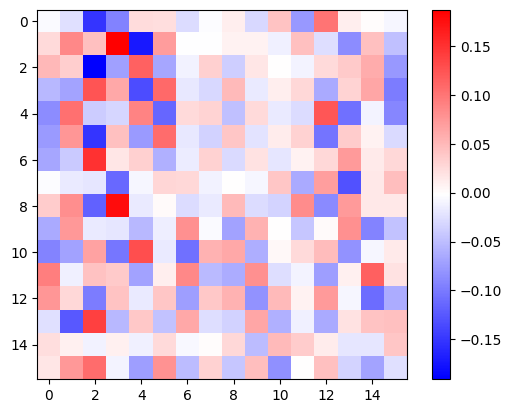

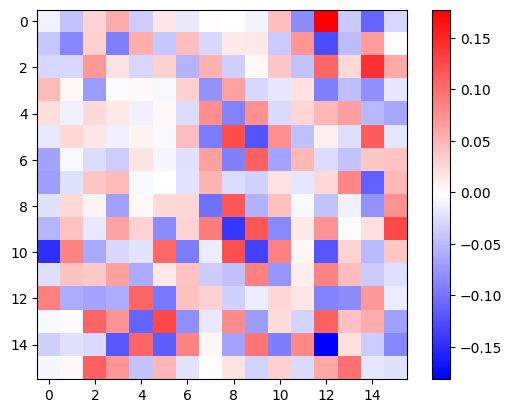

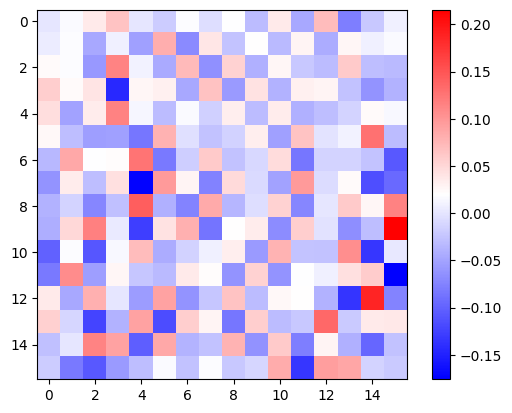

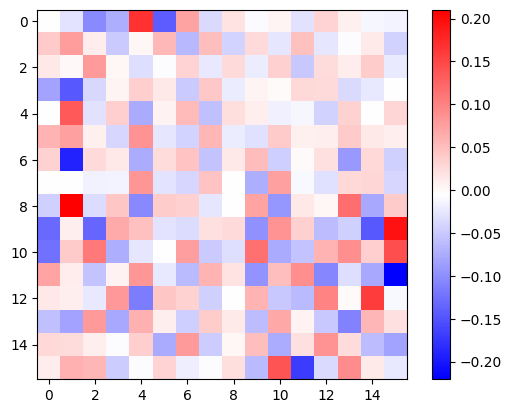

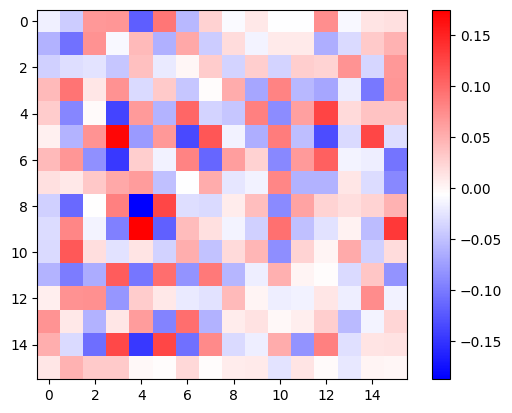

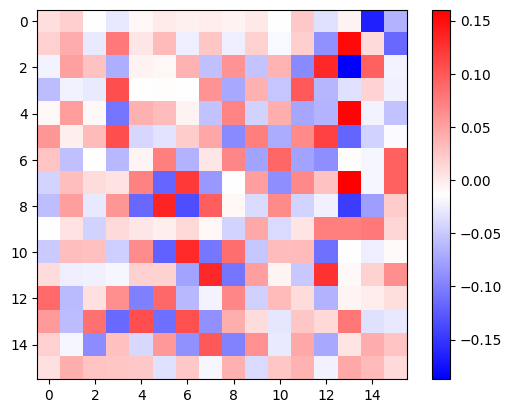

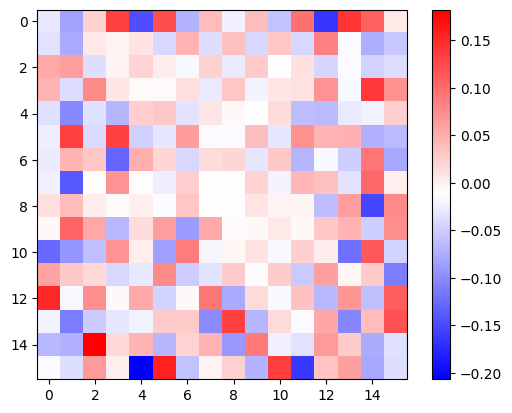

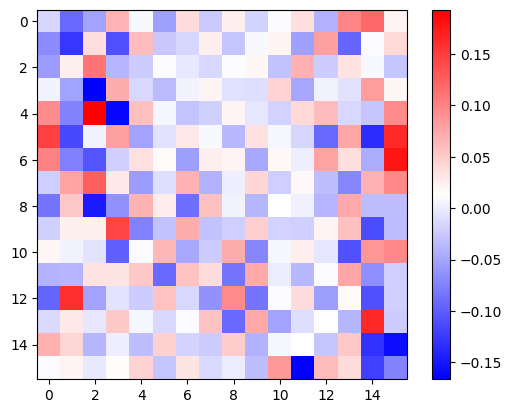

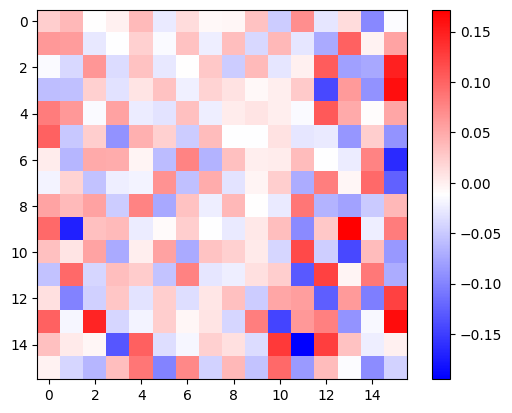

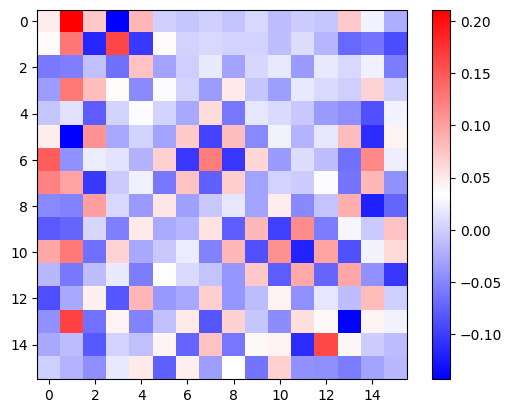

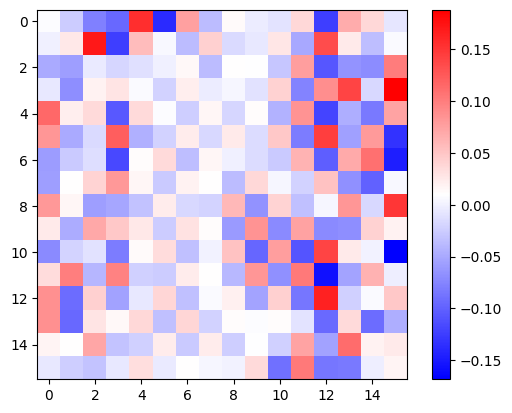

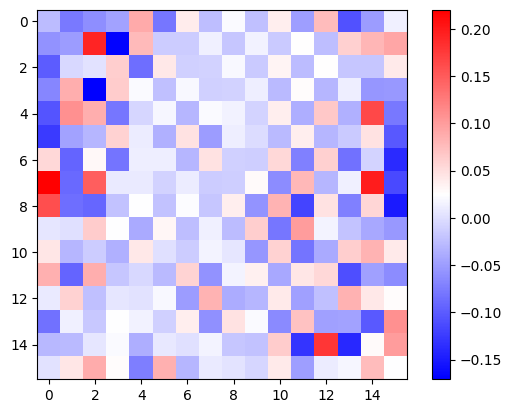

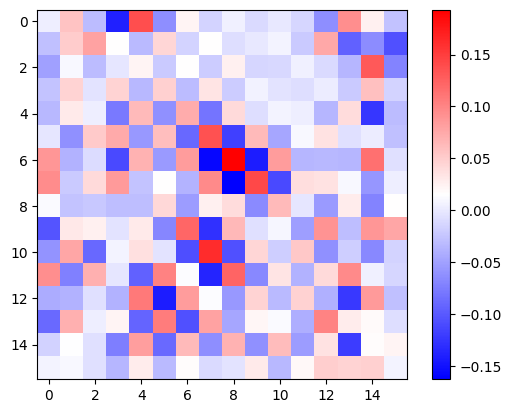

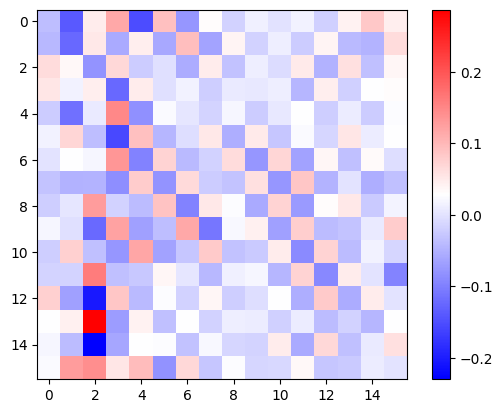

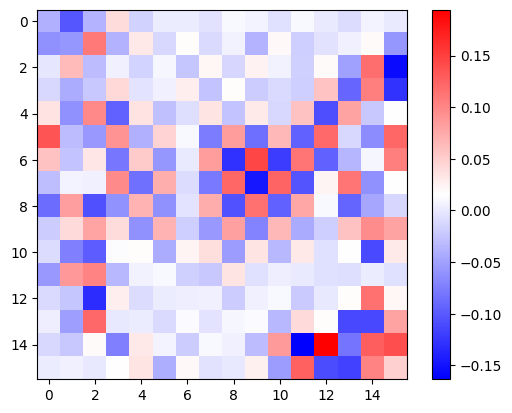

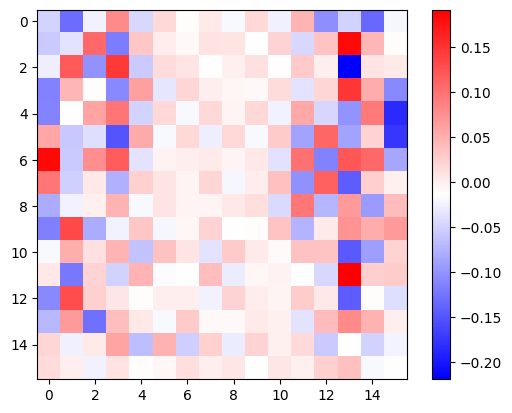

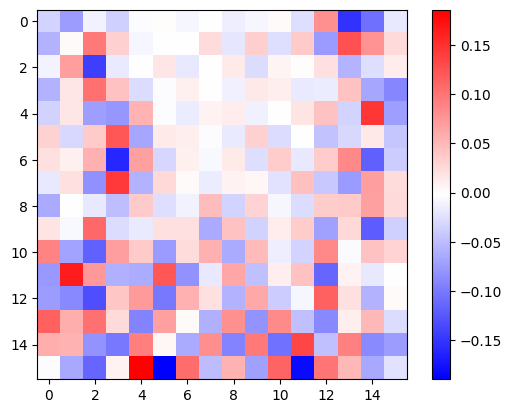

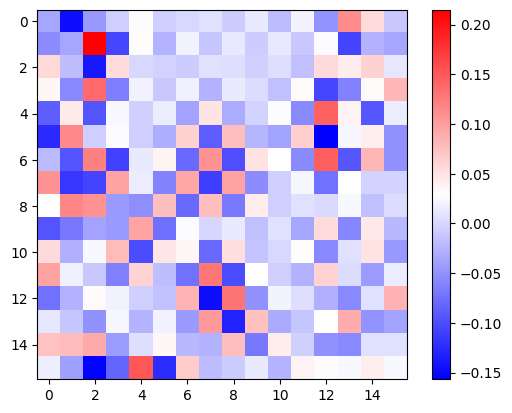

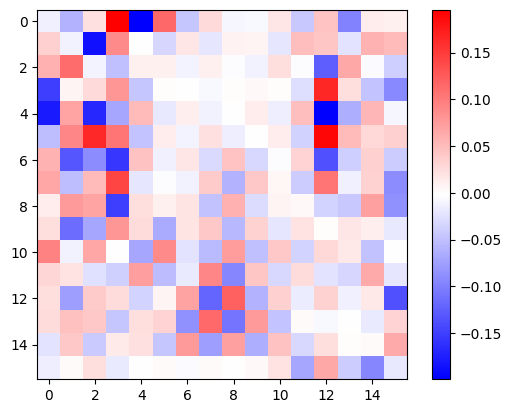

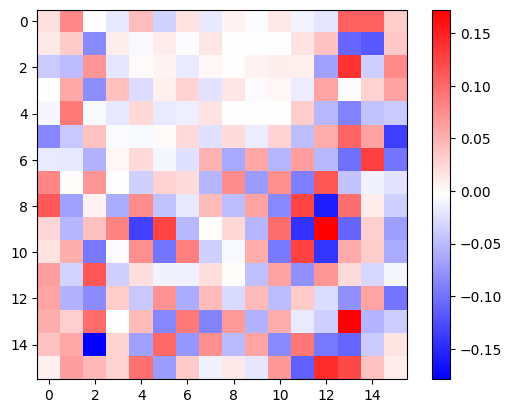

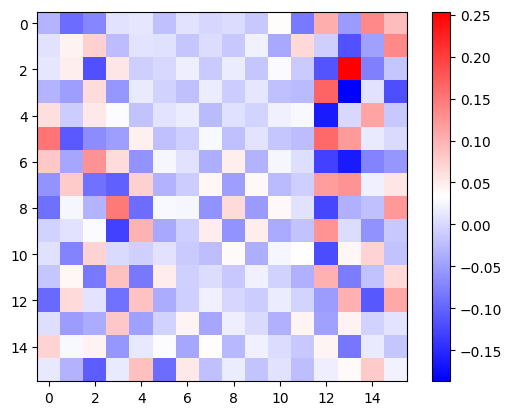

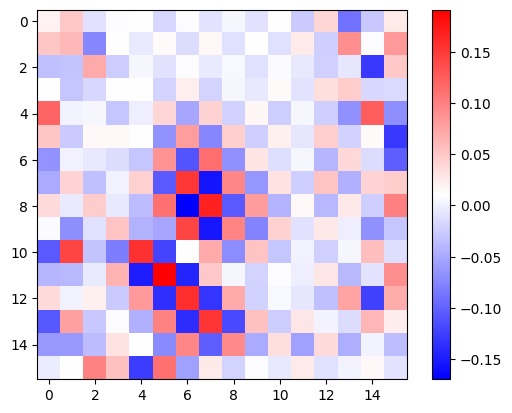

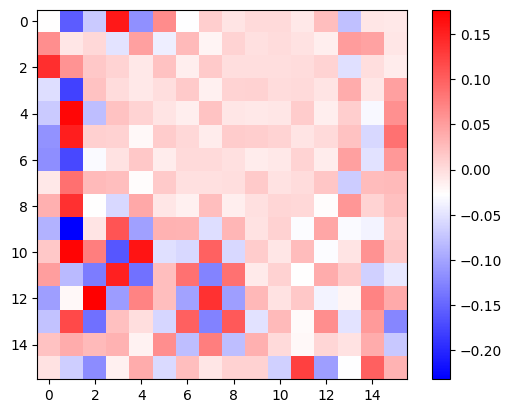

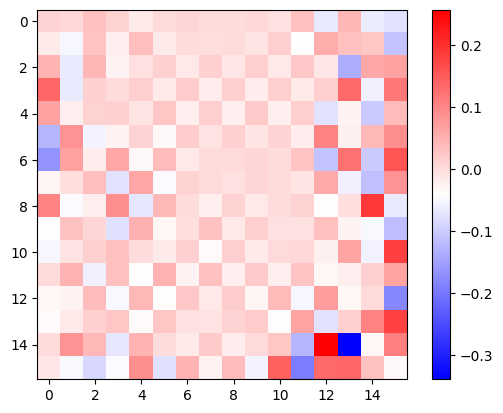

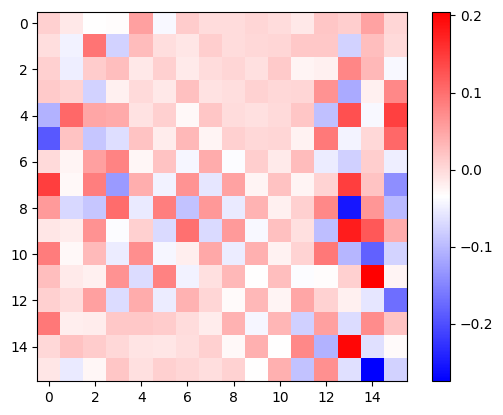

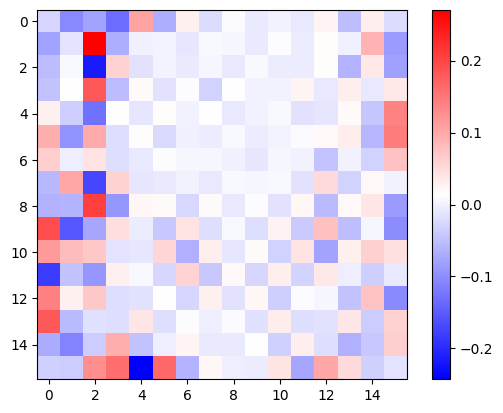

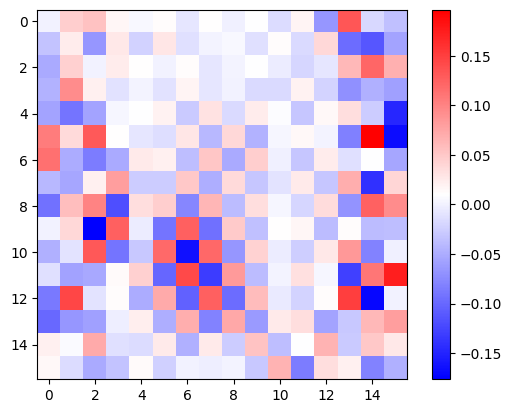

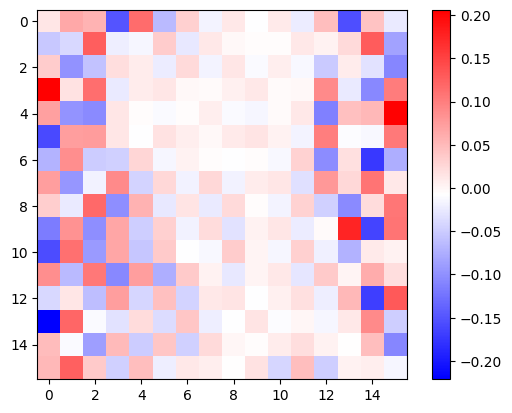

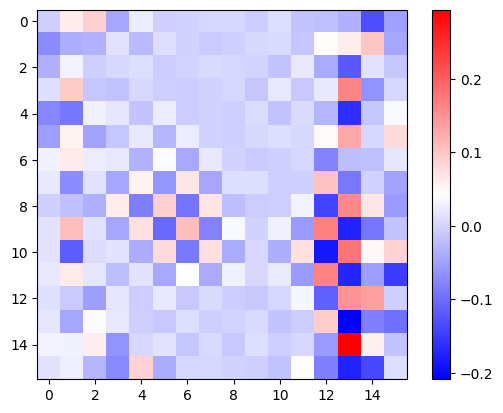

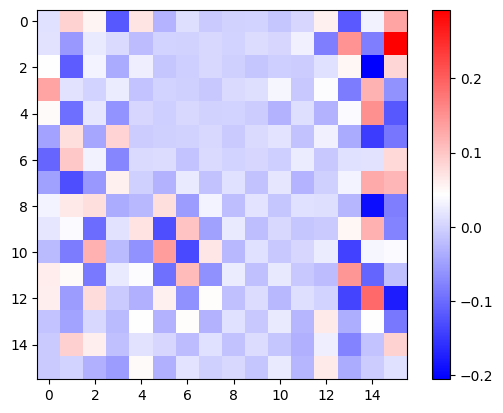

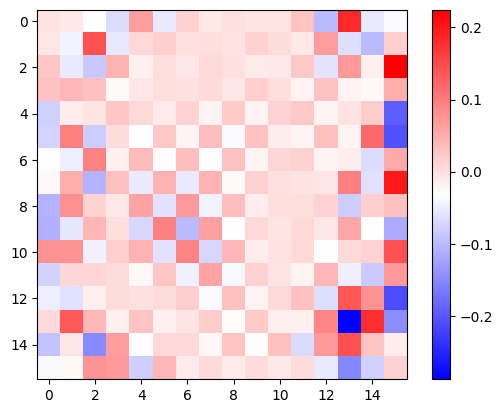

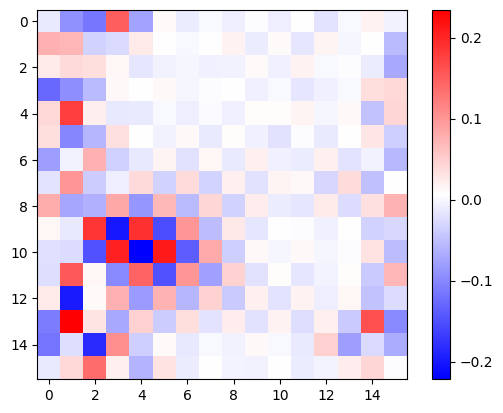

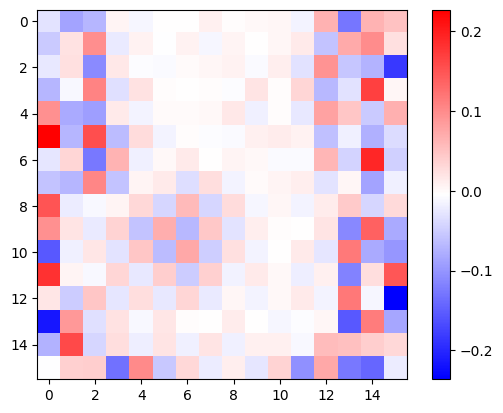

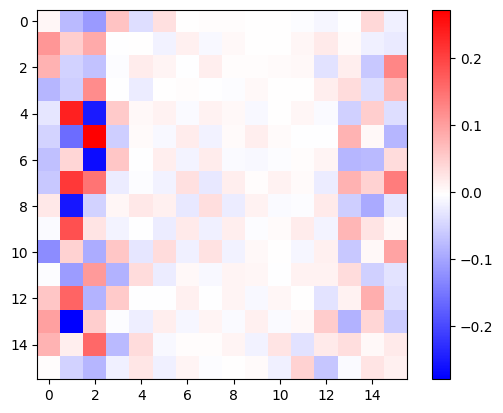

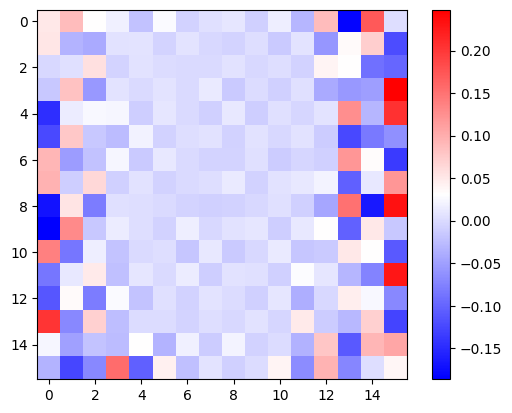

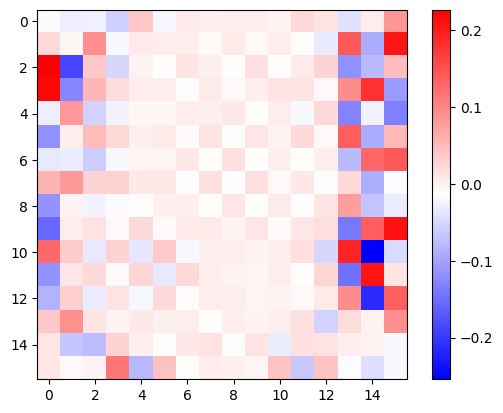

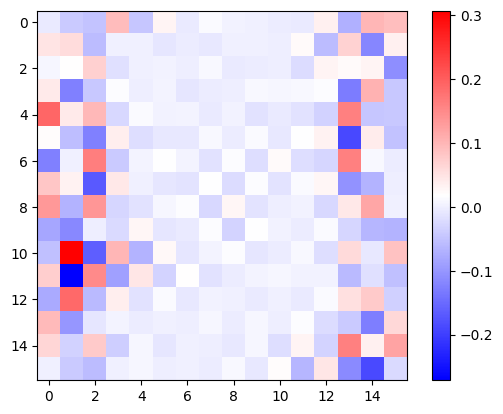

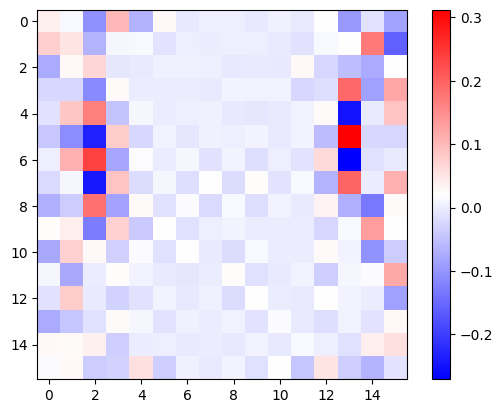

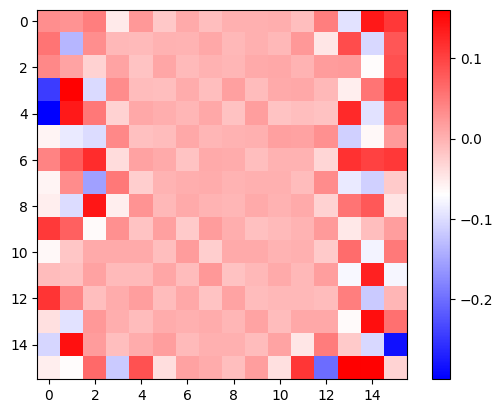

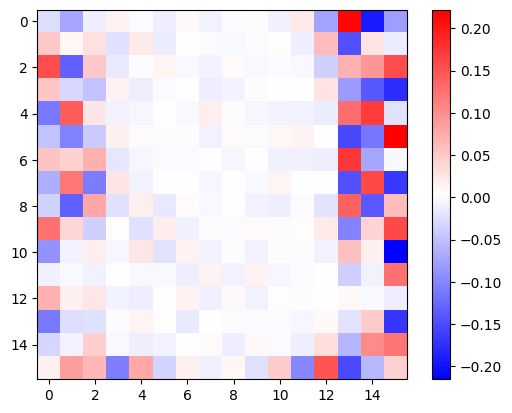

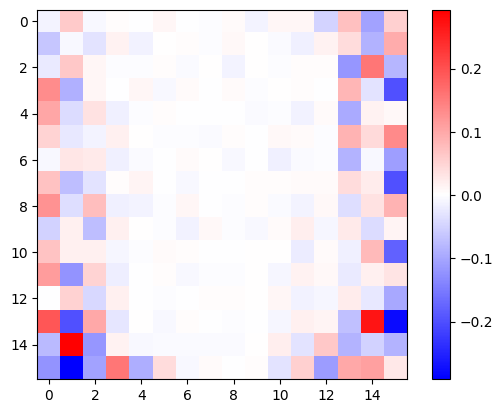

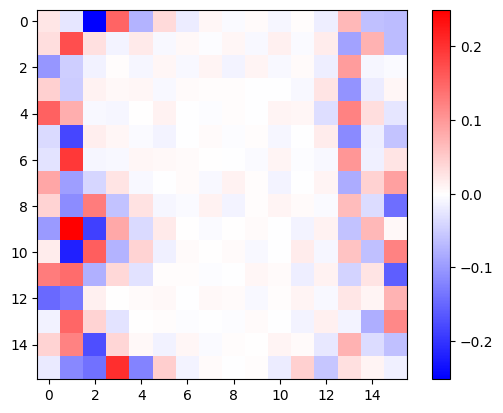

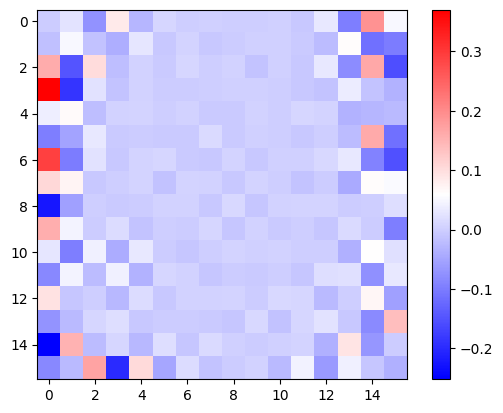

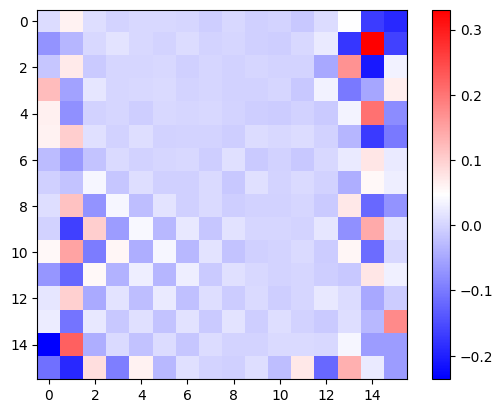

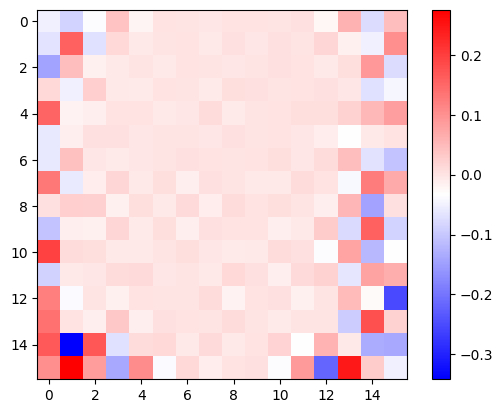

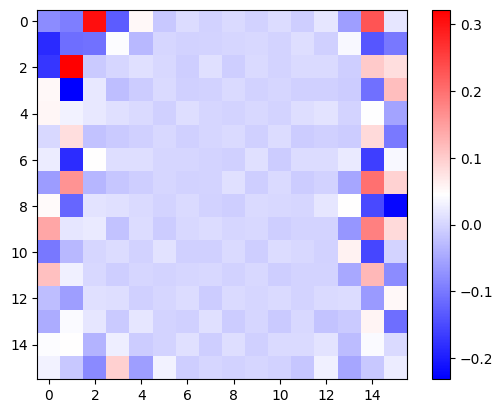

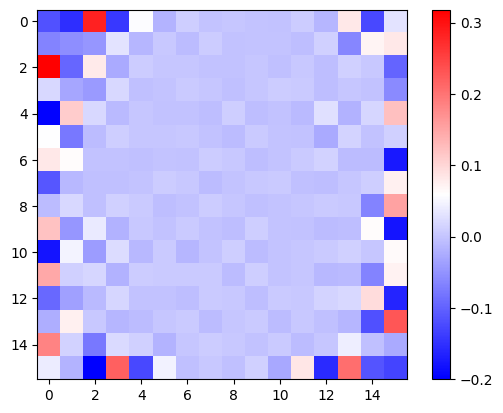

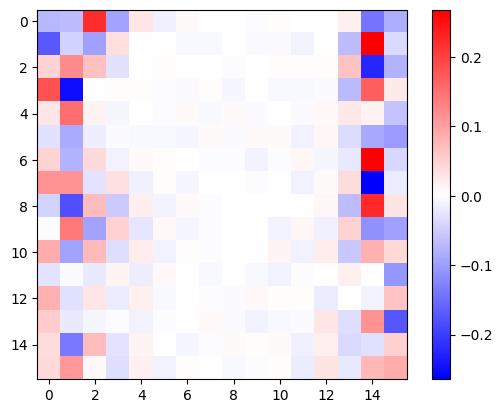

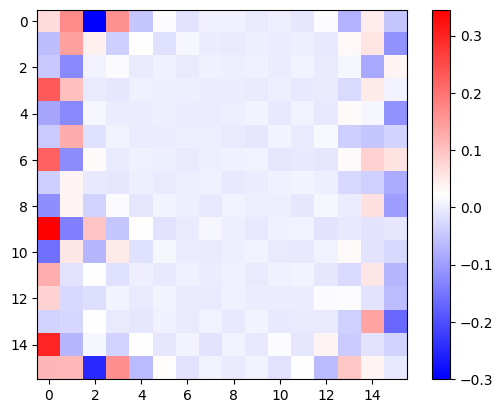

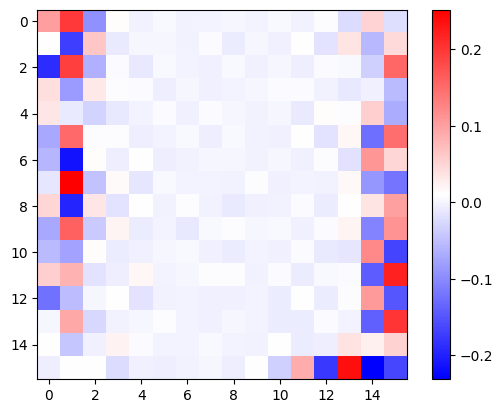

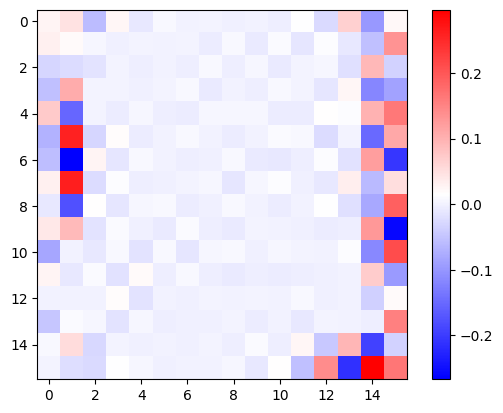

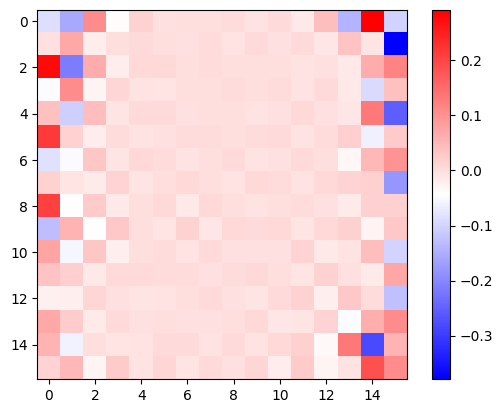

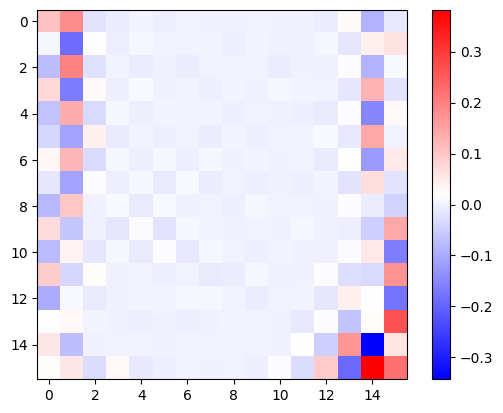

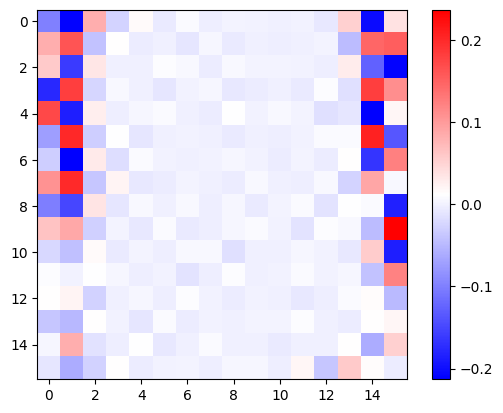

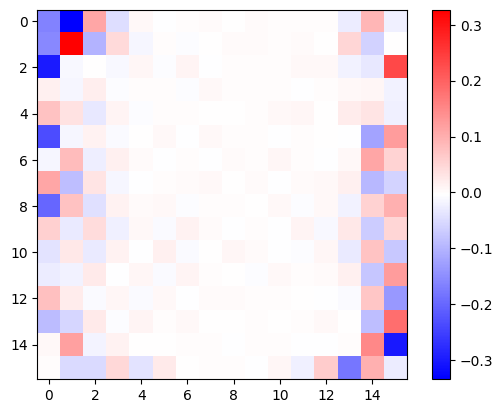

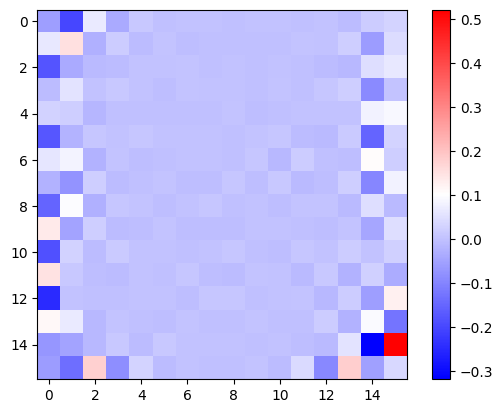

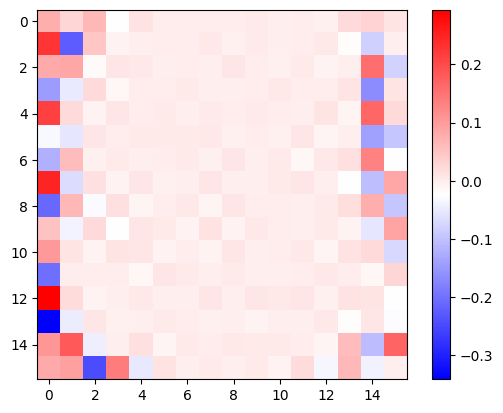

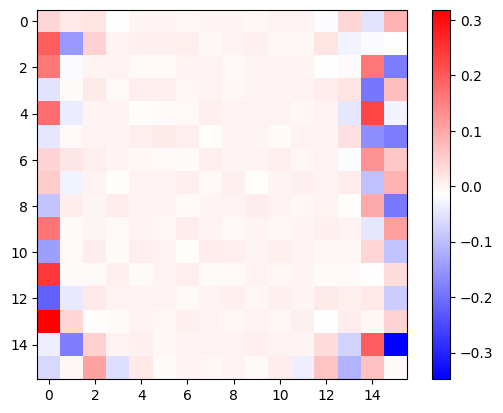

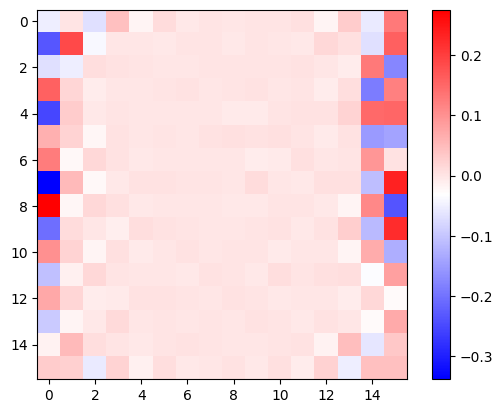

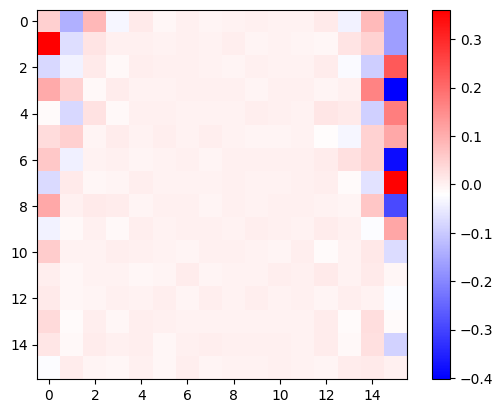

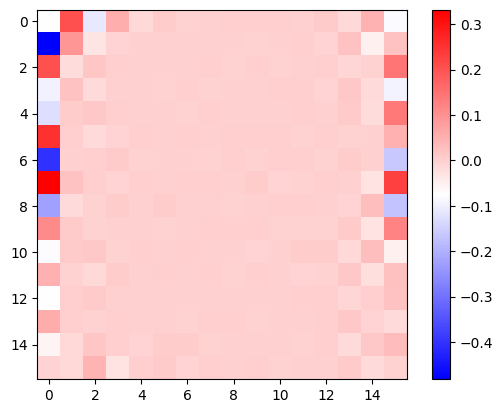

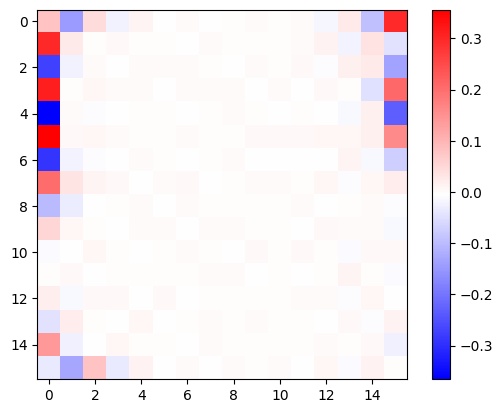

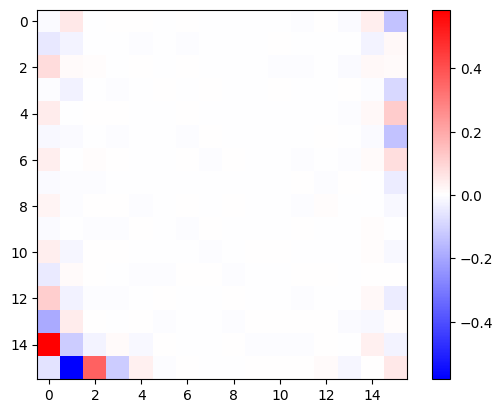

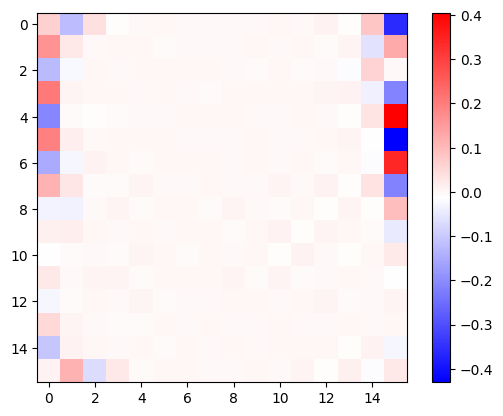

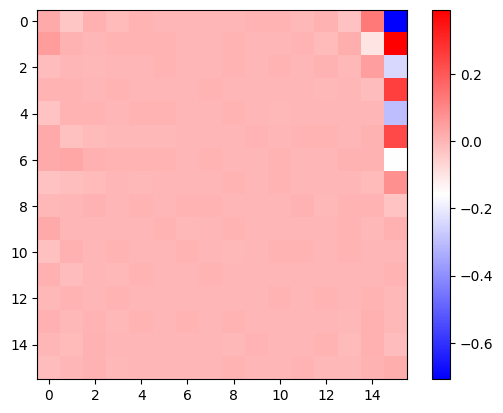

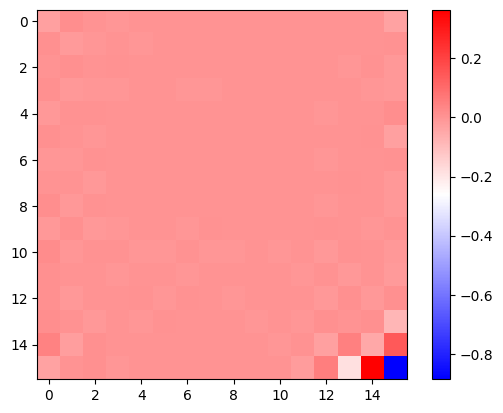

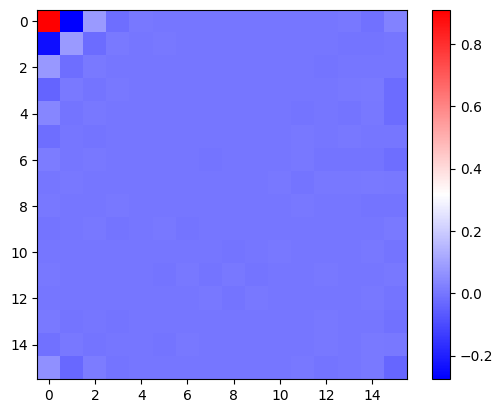

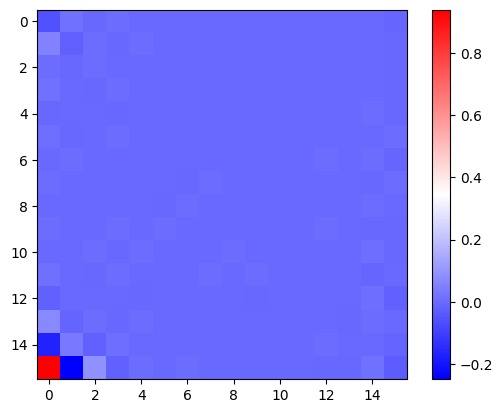

In [46]:
# Charger les données USPS
data = pkl.load(open('data/usps.pkl', 'rb'))  # Charger les données (mettre le bon chemin vers 'usps.pkl')
Xu = np.array(data['X_train'], dtype=float)
Yu = np.array(data['Y_train'], dtype=float)

# 1) Calcul des vecteurs propres et des valeurs propres
Cov_Xu = np.cov(Xu.T)  # Calculer la matrice de covariance des données d'entraînement
lam, V = np.linalg.eig(Cov_Xu)  # Calculer les valeurs propres et les vecteurs propres

# 2) Affichage des valeurs propres et des vecteurs propres
print("Valeurs propres :\n", lam)
print("Vecteurs propres :\n", V)

# 3) Tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres
# Trier les indices des valeurs propres par ordre décroissant
indices = np.argsort(lam)[::-1]
V_sorted = V[:, indices]  # Vecteurs propres triés
lam_sorted = lam[indices]  # Valeurs propres triées

# Sélectionner les deux premiers vecteurs propres
v1 = V_sorted[:, 0]
v2 = V_sorted[:, 1]

# **Correction ici :** Utiliser V_sorted pour accéder aux vecteurs propres
vp = V_sorted  # Vecteurs propres (ou les deux premiers ici)

# 4) Affichage des vecteurs propres sous forme d'images
for i in range(vp.shape[1]):
    plt.figure()
    plt.imshow(vp[:,i].reshape(16,16),cmap='bwr')
    plt.colorbar()
    #plt.savefig("out/vp_"+str(i)+".png",bbox_inches='tight', transparent=True,pad_inches=0)
    #plt.show()

## Vers un espace de représentation débruité

Que se passe-t-il si on classe les points dans cet espace?
En 2d, on voit qu'il n'y a pas assez de dimension... Mais on peut:

1. Etudier les valeurs de toutes les valeurs propres (triées) pour voir combien sont importantes
    - soit on trie et on affiche les valeurs
    - soit on trace un histogramme des valeurs
1. Choisir un nombre de vecteurs propres par rapport à l'expérience précédente... On se rend compte que ce n'est pas évident: peu de valeurs propres captent toute l'énergie. En tout état de cause, 20 valeurs propres semblent raisonnables
1. Projeter les données d'apprentissage et de test
1. Etudier le taux de bonne classification dans ce nouvel espace par rapport à l'espace d'origine

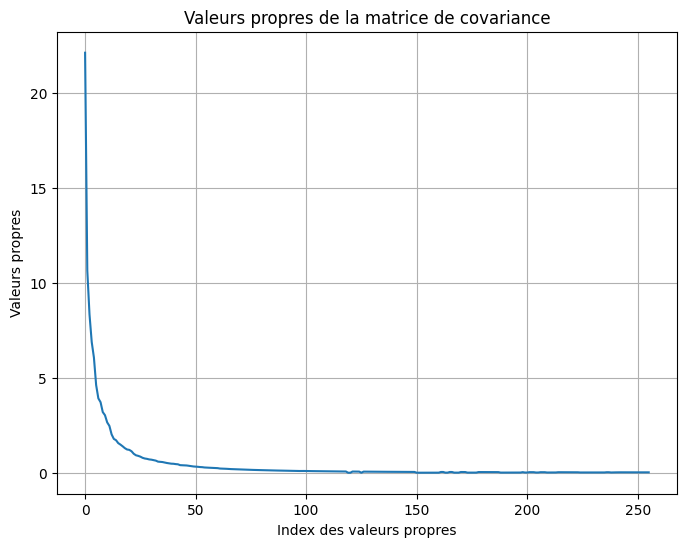

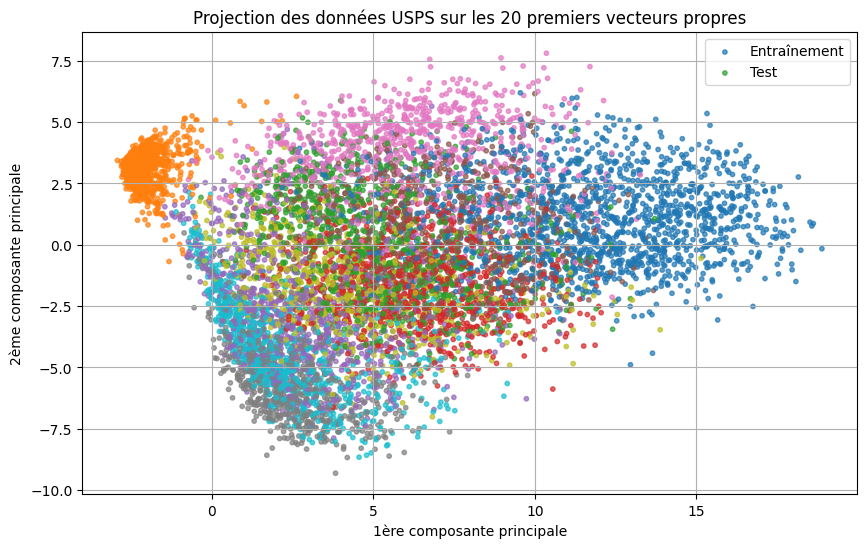

In [48]:
# Charger les données USPS
data = pkl.load(open('data/usps.pkl', 'rb'))  # Charger les données (mettre le bon chemin vers 'usps.pkl')
Xu = np.array(data['X_train'], dtype=float)
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float)
YTu = np.array(data['Y_test'], dtype=float)

# 1) Calcul des vecteurs propres et des valeurs propres
Cov_Xu = np.cov(Xu.T)  # Calculer la matrice de covariance des données d'entraînement
lam, V = np.linalg.eig(Cov_Xu)  # Calculer les valeurs propres et les vecteurs propres

# 2) Affichage des valeurs propres
plt.figure(figsize=(8, 6))
plt.plot(lam)  # Affichage des valeurs propres
plt.title("Valeurs propres de la matrice de covariance")
plt.xlabel("Index des valeurs propres")
plt.ylabel("Valeurs propres")
plt.grid(True)
plt.show()

# Alternative : Affichage d'un histogramme des valeurs propres
# plt.figure(figsize=(8, 6))
# plt.hist(lam, bins=20)
# plt.title("Histogramme des valeurs propres")
# plt.xlabel("Valeurs propres")
# plt.ylabel("Fréquence")
# plt.grid(True)
# plt.show()

# 3) Choisir les 20 premières valeurs propres
num_components = 20  # Nombre de dimensions à conserver
indices = np.argsort(lam)[::-1]  # Trier les indices des valeurs propres par ordre décroissant
V_sorted = V[:, indices]  # Vecteurs propres triés
lam_sorted = lam[indices]  # Valeurs propres triées

# Sélectionner les 20 premiers vecteurs propres
V_selected = V_sorted[:, :num_components]

# 4) Projection des données d'entraînement et de test sur les 20 premiers vecteurs propres
X_proj_train = np.dot(Xu, V_selected)  # Projection des données d'entraînement
X_proj_test = np.dot(XTu, V_selected)  # Projection des données de test

# 5) Étudier le taux de bonne classification
# Ici, vous pourriez appliquer un classifieur (par exemple, un perceptron ou un SVM) sur les données projetées
# Pour l'instant, affichons simplement les dimensions projetées des données d'entraînement et de test

plt.figure(figsize=(10, 6))

# Affichage des données d'entraînement projetées
plt.scatter(X_proj_train[:, 0], X_proj_train[:, 1], c=Yu, cmap='tab10', s=10, alpha=0.7, label="Entraînement")

# Affichage des données de test projetées
plt.scatter(X_proj_test[:, 0], X_proj_test[:, 1], c=YTu, cmap='tab10', s=10, alpha=0.7, label="Test")

# Ajouter un titre et des légendes
plt.title("Projection des données USPS sur les 20 premiers vecteurs propres")
plt.xlabel("1ère composante principale")
plt.ylabel("2ème composante principale")
plt.legend()
plt.grid(True)

# Affichage du plot
plt.show()

# Sauvegarder l'image si nécessaire
# plt.savefig("out/proj_usps_20_components.png", bbox_inches='tight', transparent=True, pad_inches=0)


In [49]:
# réduction à 20 dimensions
ndim = 20
Xr = Xu @ V[:,:ndim]
XTr = XTu @ V[:,:ndim]

In [50]:
import time    # pour évaluer les temps d'exécution

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Apprentissage d'un perceptron multiclasses

cl_reduit = classif.ClassifierPerceptron(ndim, 1e-3)
clmulti_reduit = classif.ClassifierMultiOAA(cl_reduit)

tic = time.time()  # On lance le chrono
clmulti_reduit.train(Xr, Yu)
toc = time.time()  # On arrête le chrono

perf_A = clmulti_reduit.accuracy(Xr, Yu)
perf_T = clmulti_reduit.accuracy(XTr, YTu)

print(f"Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")


Perfs : 0.8659, 0.8576, en 5.222 secondes
